In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("Sparkling.csv",parse_dates=True,index_col=0)
df = pd.DataFrame(df)

In [3]:
df

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

In [4]:
df.head(10)

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
1980-06-01       1377
1980-07-01       1966
1980-08-01       2453
1980-09-01       1984
1980-10-01       2596

In [5]:
df.tail(10)

Sparkling
YearMonth            
1994-10-01       3385
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [6]:
df.shape

(187, 1)

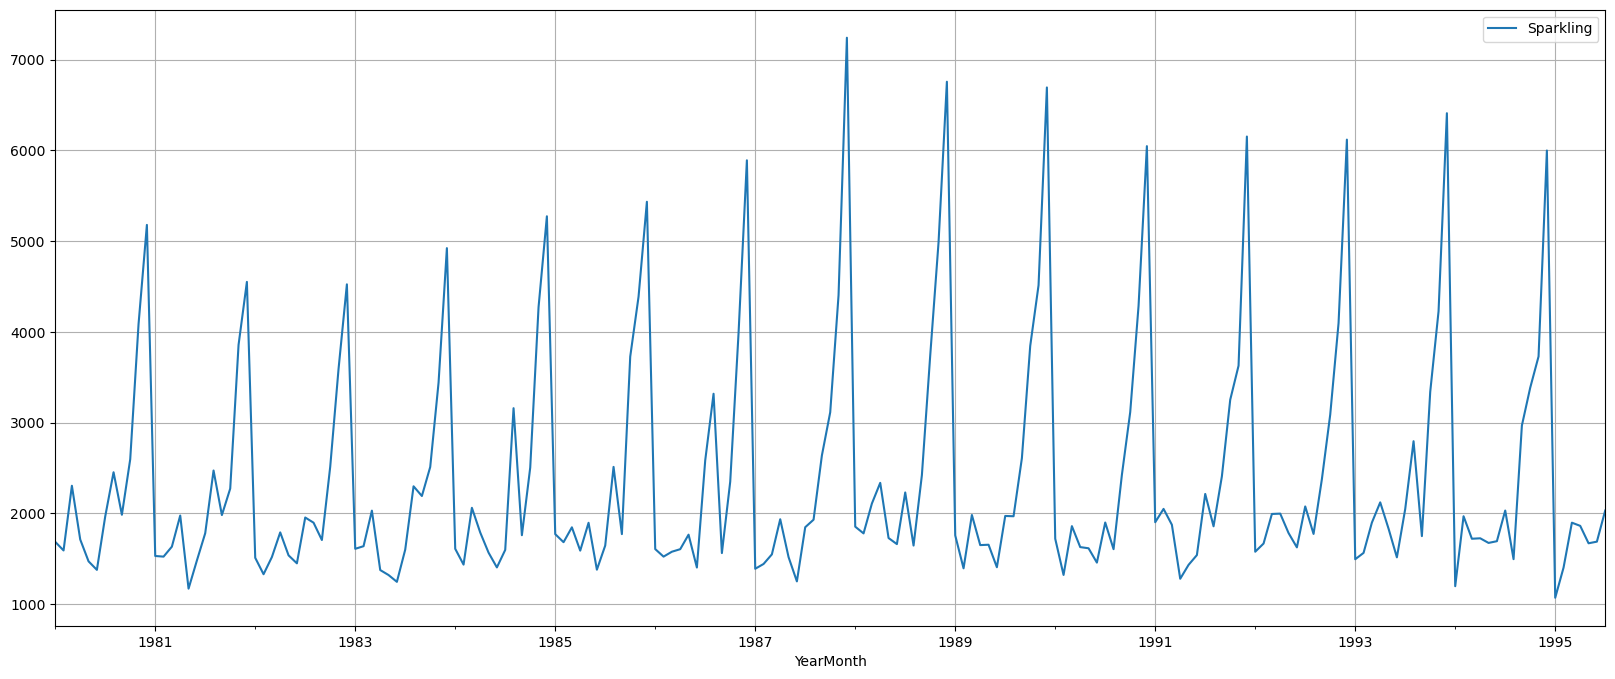

In [7]:
df.plot(figsize=(20,8))
plt.grid();

In [8]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [9]:
df.columns=['Sales', 'Year', 'Month']
df.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int32
 2   Month   187 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 4.4 KB


In [11]:
df.describe().T

count         mean          std     min     25%     50%     75%     max
Sales  187.0  2402.417112  1295.111540  1070.0  1605.0  1874.0  2549.0  7242.0
Year   187.0  1987.299465     4.514749  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.406417     3.450972     1.0     3.0     6.0     9.0    12.0

In [12]:
df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

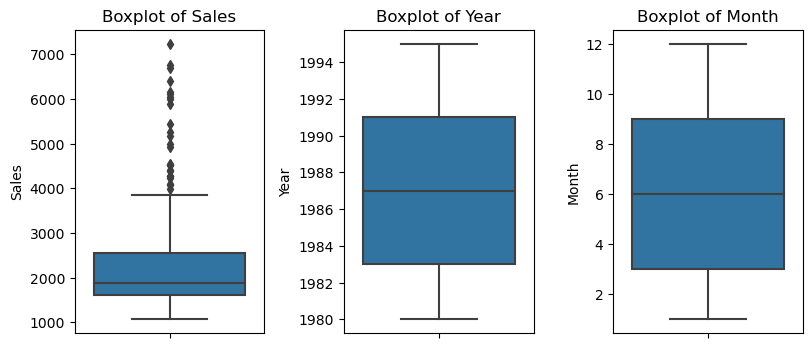

In [13]:
dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

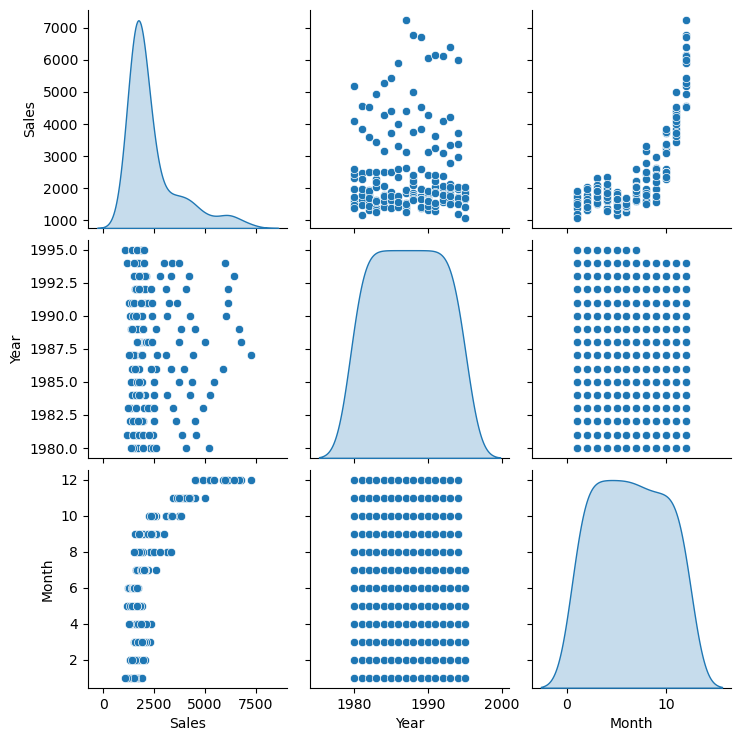

In [14]:
sns.pairplot(df, diag_kind='kde')  

<Axes: xlabel='Year', ylabel='Sales'>

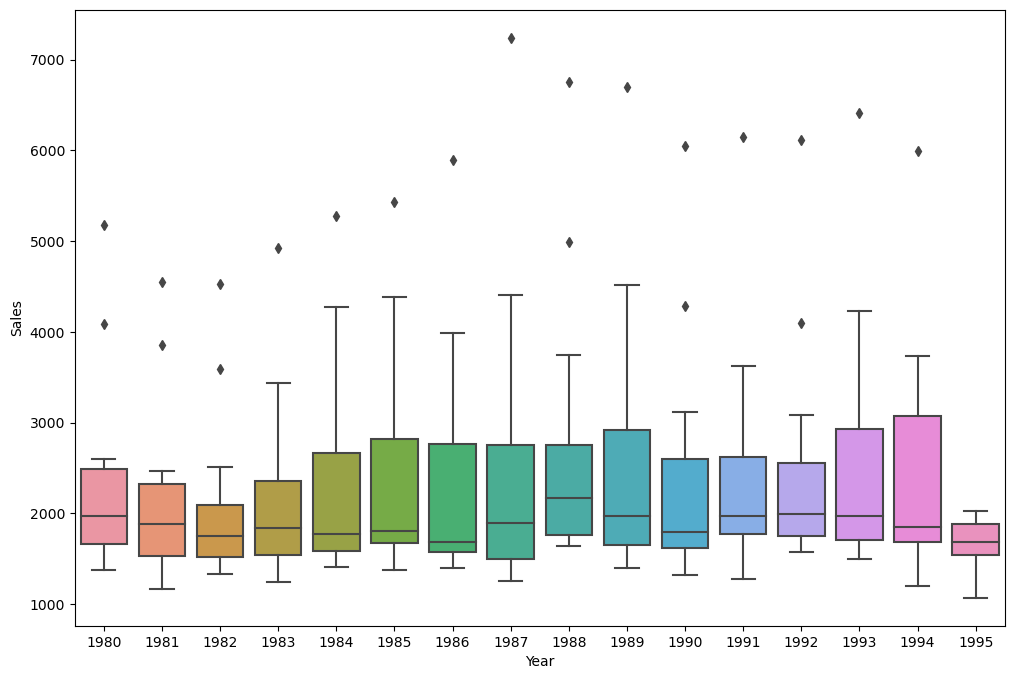

In [15]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

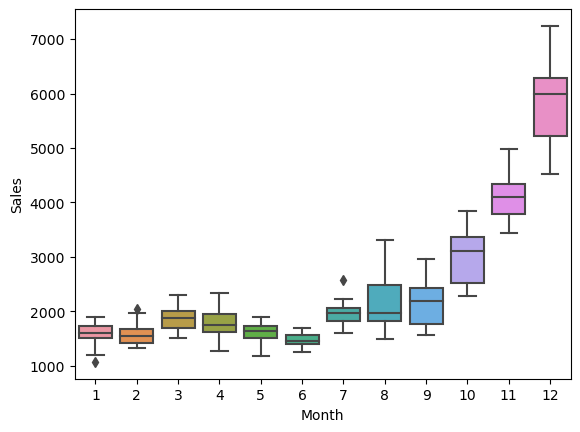

In [16]:
sns.boxplot(data= df, x='Month',y='Sales')

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = 'Month', index = 'Year')
monthly_sales_across_years

Month      1       2       3       4       5       6       7       8       9   \
Year                                                                            
1980   1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0  1984.0   
1981   1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0  1981.0   
1982   1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0  1706.0   
1983   1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0  2191.0   
1984   1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0  1759.0   
1985   1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0  1771.0   
1986   1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0  1562.0   
1987   1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0  2638.0   
1988   1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0  2421.0   
1989   1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0  2608.0   
1990   1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0  2424.0   
1991   1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0  2408.0   
1992   1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0  2377.0   
1993   1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0  1749.0   
1994   1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0  2968.0   
1995   1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN     NaN   

Month      10      11      12  
Year                           
1980   2596.0  4087.0  5179.0  
1981   2273.0  3857.0  4551.0  
1982   2514.0  3593.0  4524.0  
1983   2511.0  3440.0  4923.0  
1984   2504.0  4273.0  5274.0  
1985   3727.0  4388.0  5434.0  
1986   2349.0  3987.0  5891.0  
1987   3114.0  4405.0  7242.0  
1988   3740.0  4988.0  6757.0  
1989   3845.0  4514.0  6694.0  
1990   3116.0  4286.0  6047.0  
1991   3252.0  3627.0  6153.0  
1992   3088.0  4096.0  6119.0  
1993   3339.0  4227.0  6410.0  
1994   3385.0  3729.0  5999.0  
1995      NaN     NaN     NaN

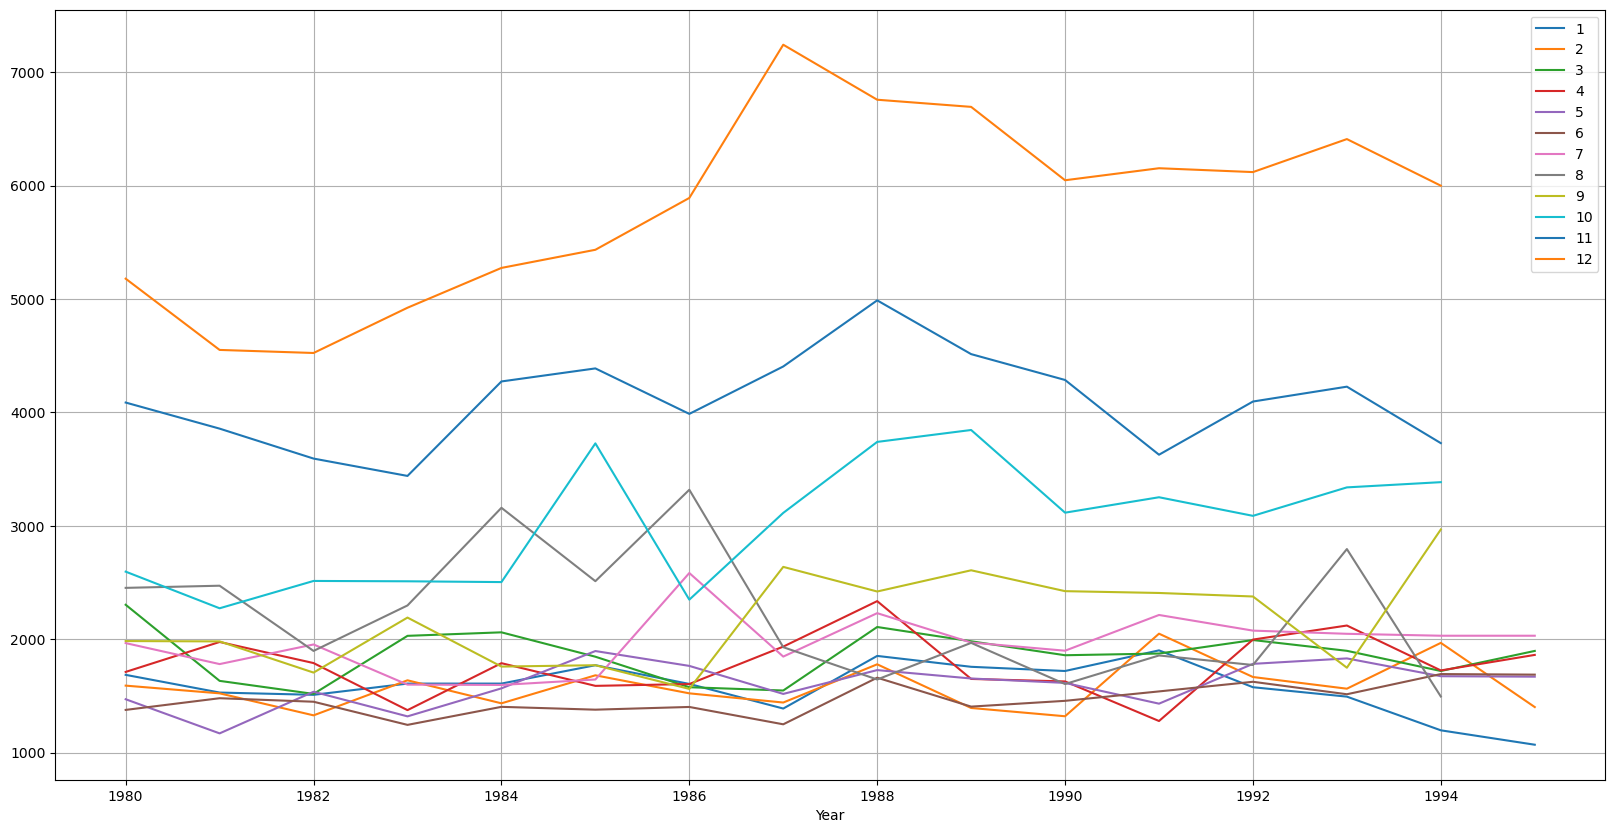

In [18]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [19]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sales', columns = 'Year', index = 'Month')
yearly_sales_across_months

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
1      1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
2      1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
3      2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
4      1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
5      1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
6      1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
7      1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
8      2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
9      1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
10     2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
11     4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
12     5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
1      1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2      1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3      1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4      1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5      1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6      1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7      1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8      1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9      2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10     3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11     4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12     6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

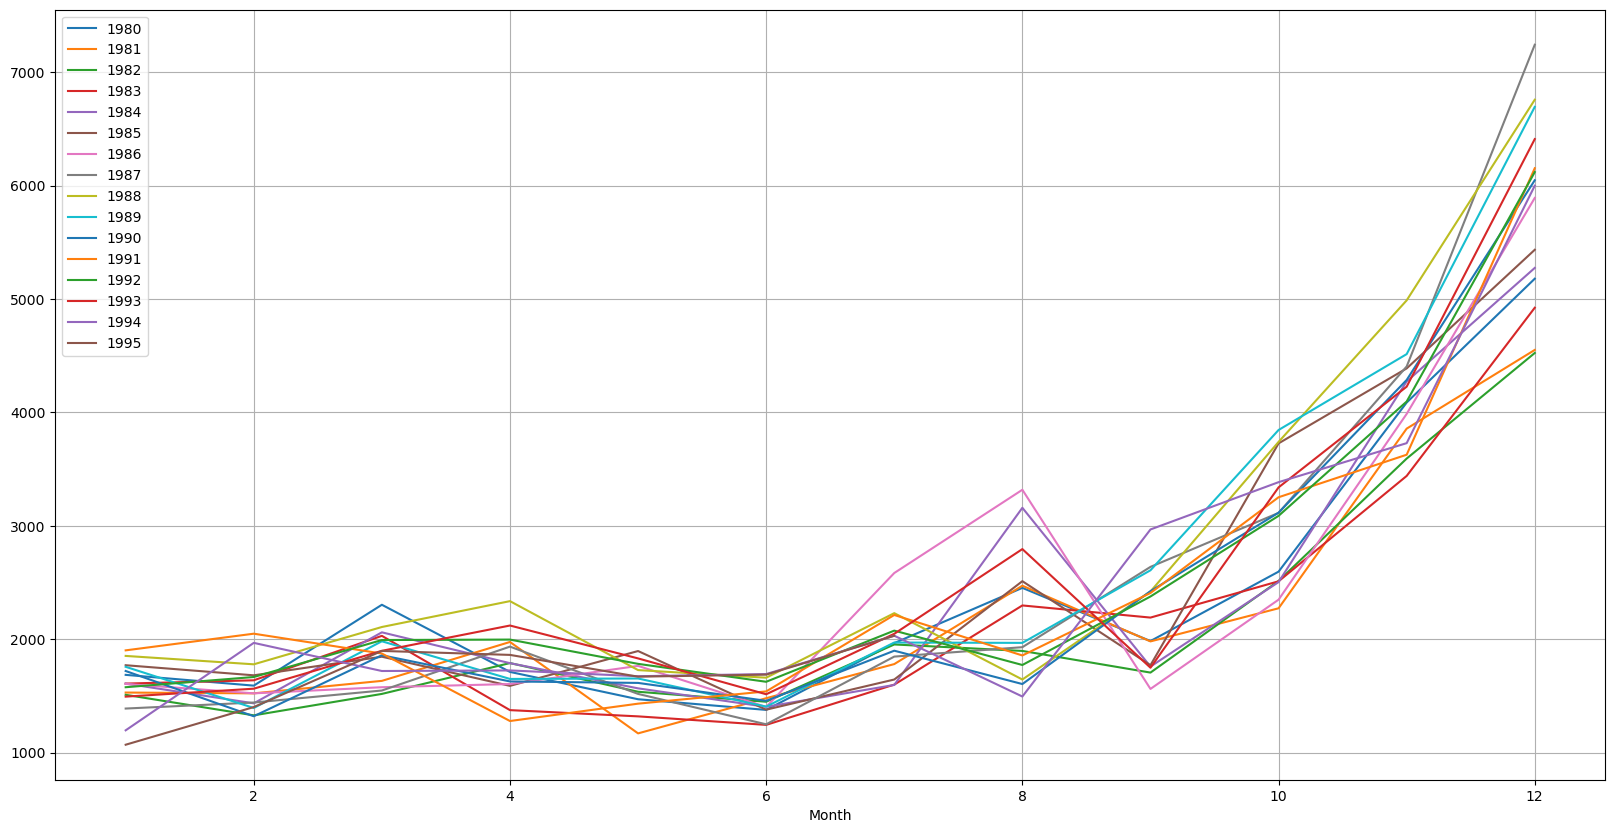

In [20]:
yearly_sales_across_months.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

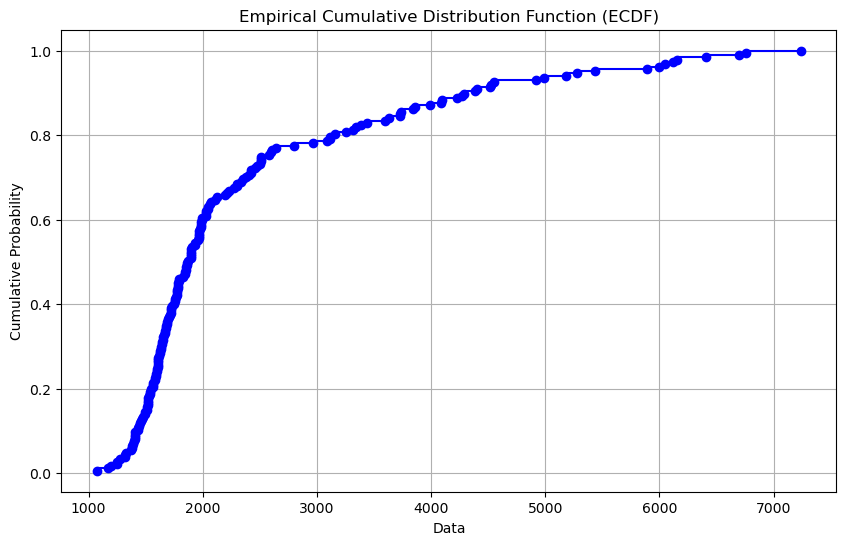

In [21]:
plt.figure(figsize = (10,6))
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['Sales'])

# Plot ECDF
plt.step(ecdf.x, ecdf.y, marker='o', linestyle='-', color='b')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

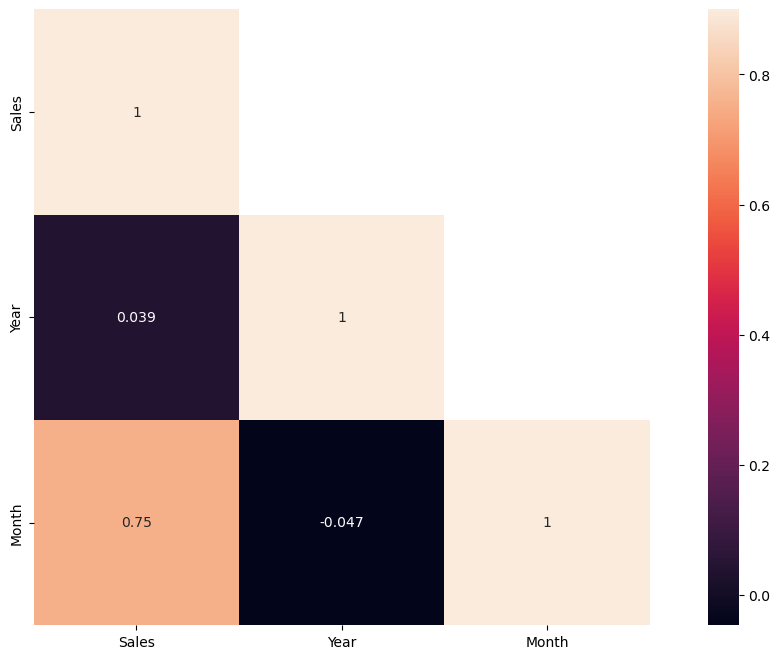

In [22]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

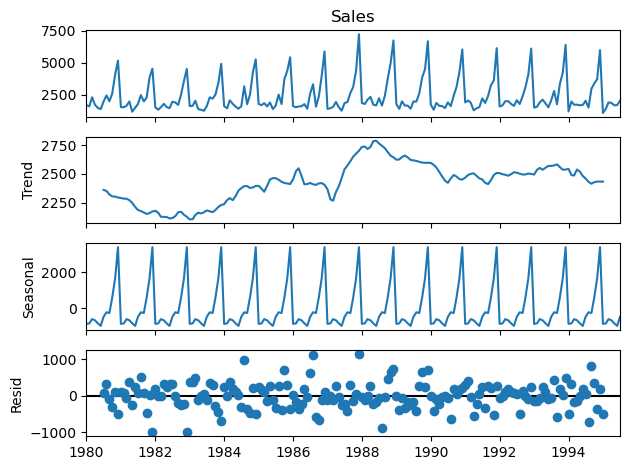

In [23]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


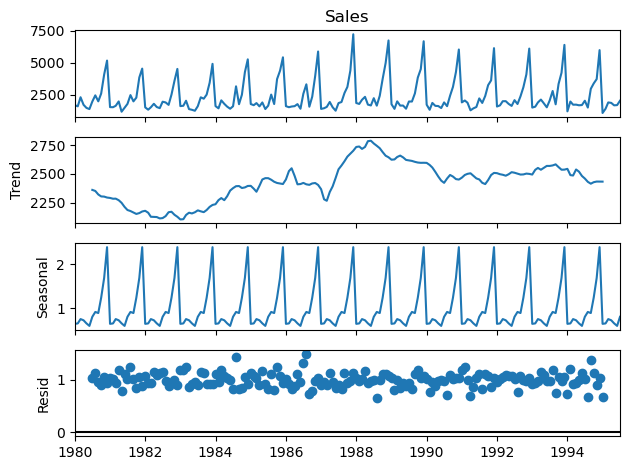

In [25]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [27]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [28]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-0

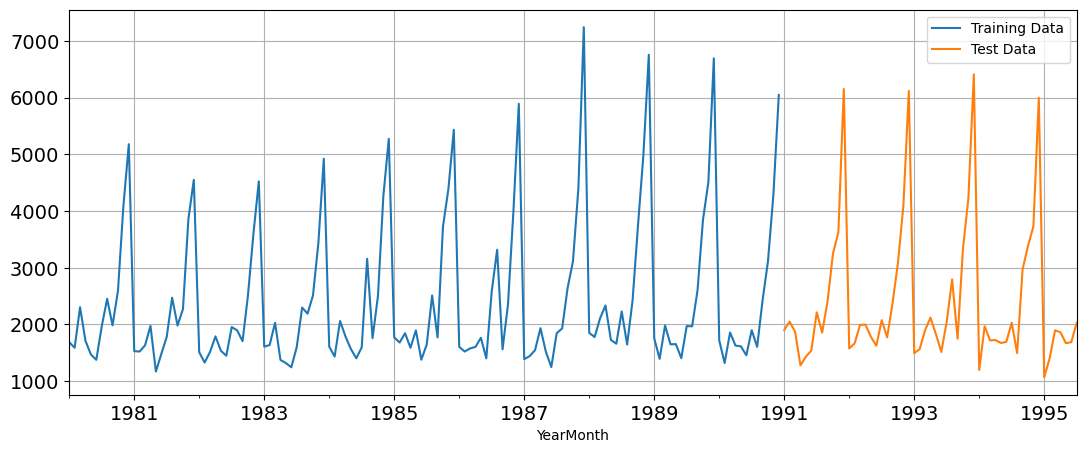

In [29]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [32]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

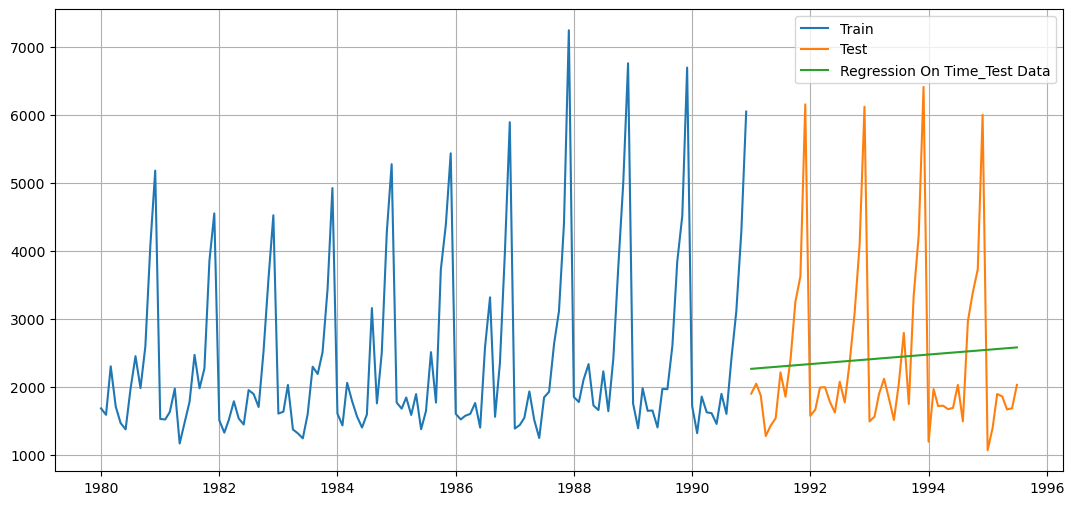

In [33]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [34]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1275.867052

 Model 2: Naive Approach: 

In [35]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [36]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

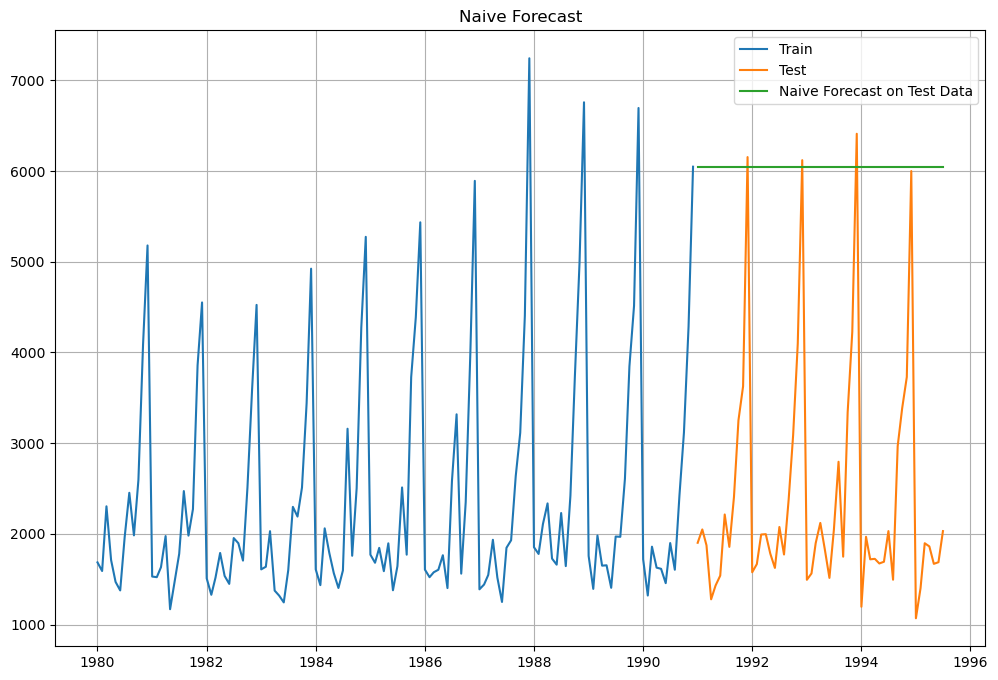

In [37]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [38]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  1275.867052
Naive Model        3864.279352

Method 3: Simple Average

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

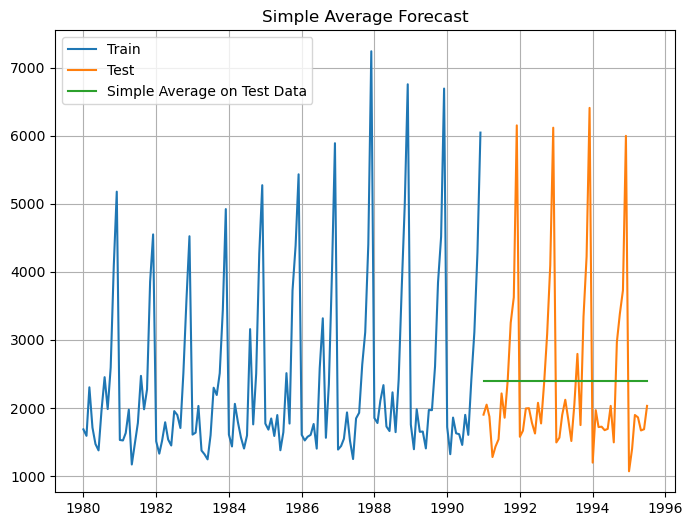

In [41]:
plt.figure(figsize=(8,6))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [42]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     1275.867052
Naive Model           3864.279352
Simple Average Model  1275.081804

 Moving Average(MA)

In [43]:
MovingAverage = df.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [44]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

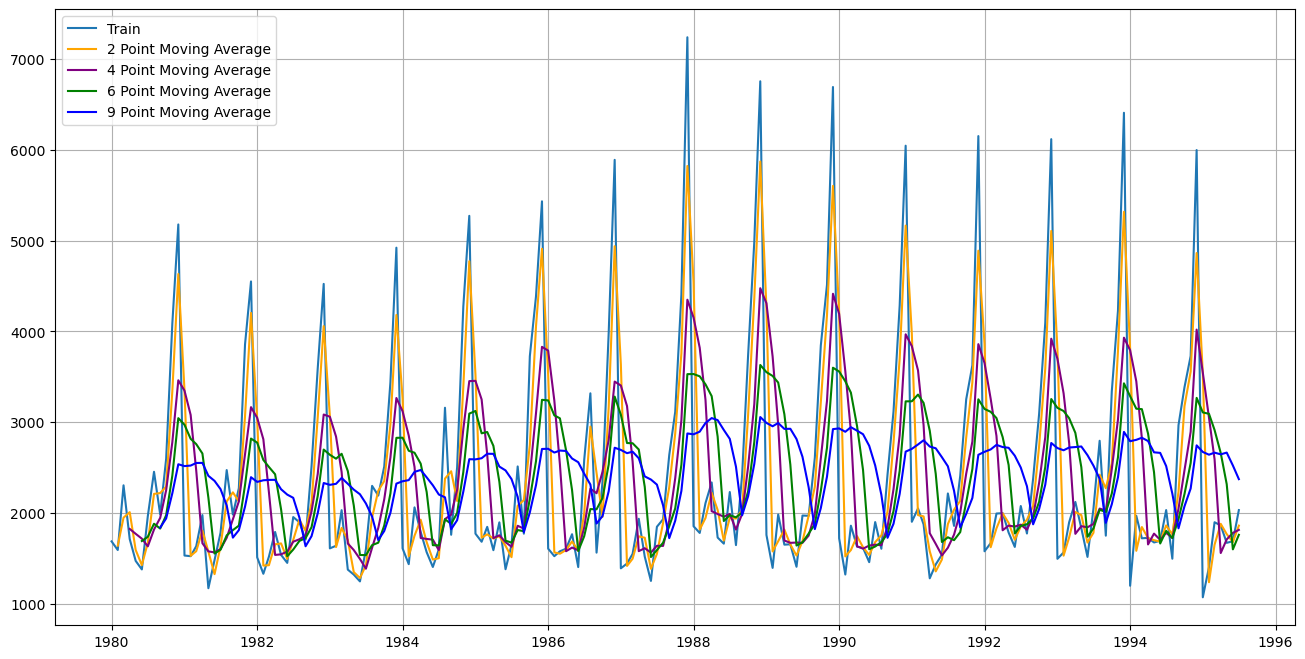

In [45]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average',color='orange')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average',color='purple')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average',color='green')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average',color='blue')

plt.legend(loc = 'best')
plt.grid();

In [46]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


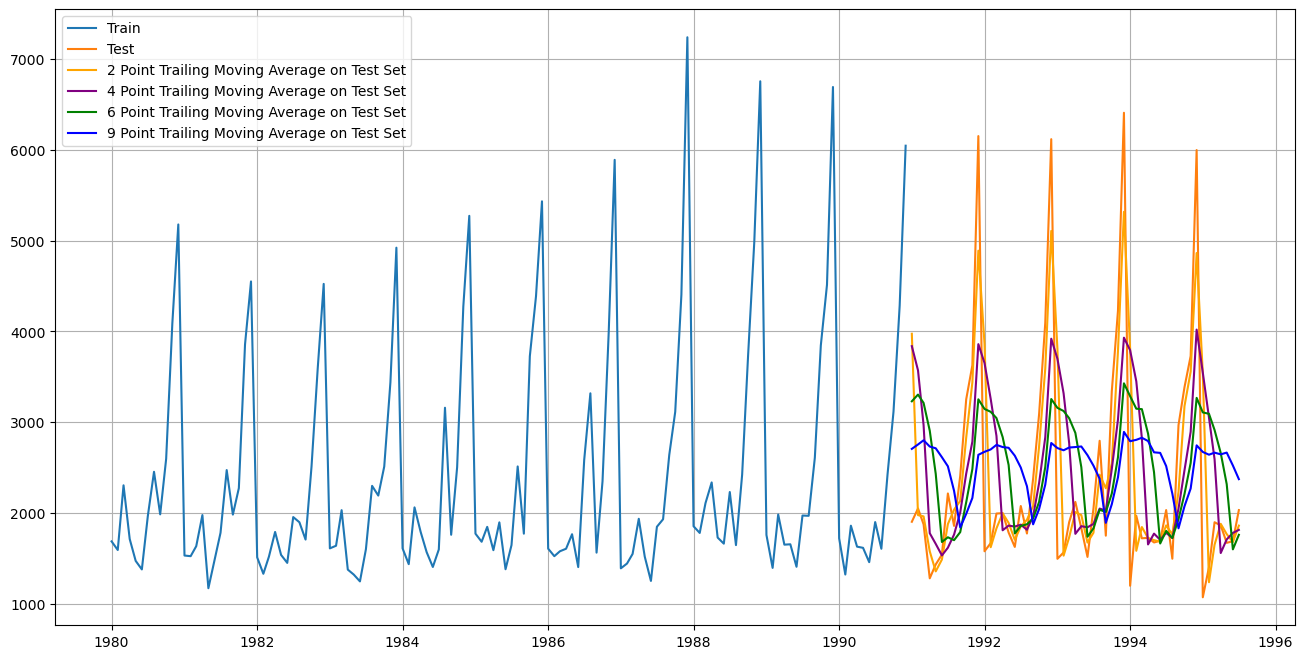

In [47]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='orange')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set',color='purple')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set',color='green')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set',color='blue')
plt.legend(loc = 'best')
plt.grid();

In [48]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [49]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            1275.867052
Naive Model                  3864.279352
Simple Average Model         1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

 Simple Exponential Smoothing

In [50]:
SES_train = train.copy()
SES_test = test.copy()

In [51]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
model_SES_autofit = model_SES.fit(optimized=True)

In [53]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [54]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [55]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2676.676366
1991-02-01   2049  1991      2  2676.676366
1991-03-01   1874  1991      3  2676.676366
1991-04-01   1279  1991      4  2676.676366
1991-05-01   1432  1991      5  2676.676366

In [56]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp._append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

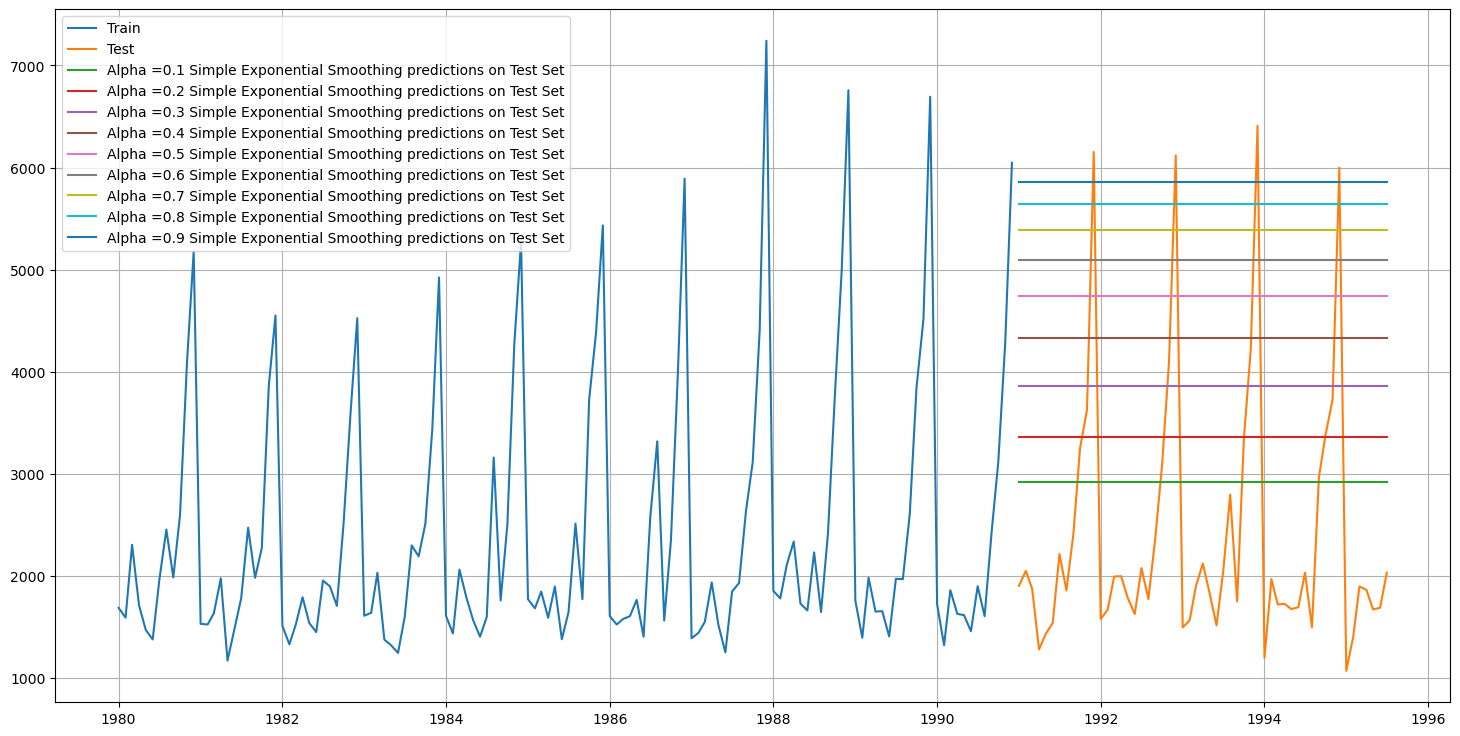

In [57]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [58]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [59]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     1275.867052
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Alpha=0.1,SimpleExponentialSmoothing  1375.393398

Double Exponential Smoothing (Holt's Model)

In [60]:
DES_train = train.copy()
DES_test = test.copy()

In [61]:
model_DES = Holt(DES_train['Sales'])

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5221.278699
1991-02-01   2049  1991      2  5127.886554
1991-03-01   1874  1991      3  5034.494409
1991-04-01   1279  1991      4  4941.102264
1991-05-01   1432  1991      5  4847.710119

In [64]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [65]:
# Assuming DES_test['predict'] is the column containing DES predictions
rmse_model_temp = metrics.mean_squared_error(DES_test['Sales'], DES_test['predict'], squared=False)
print("For Alpha = 0.6477, Beta = 0.0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" % (rmse_model_temp))

For Alpha = 0.6477, Beta = 0.0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [66]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

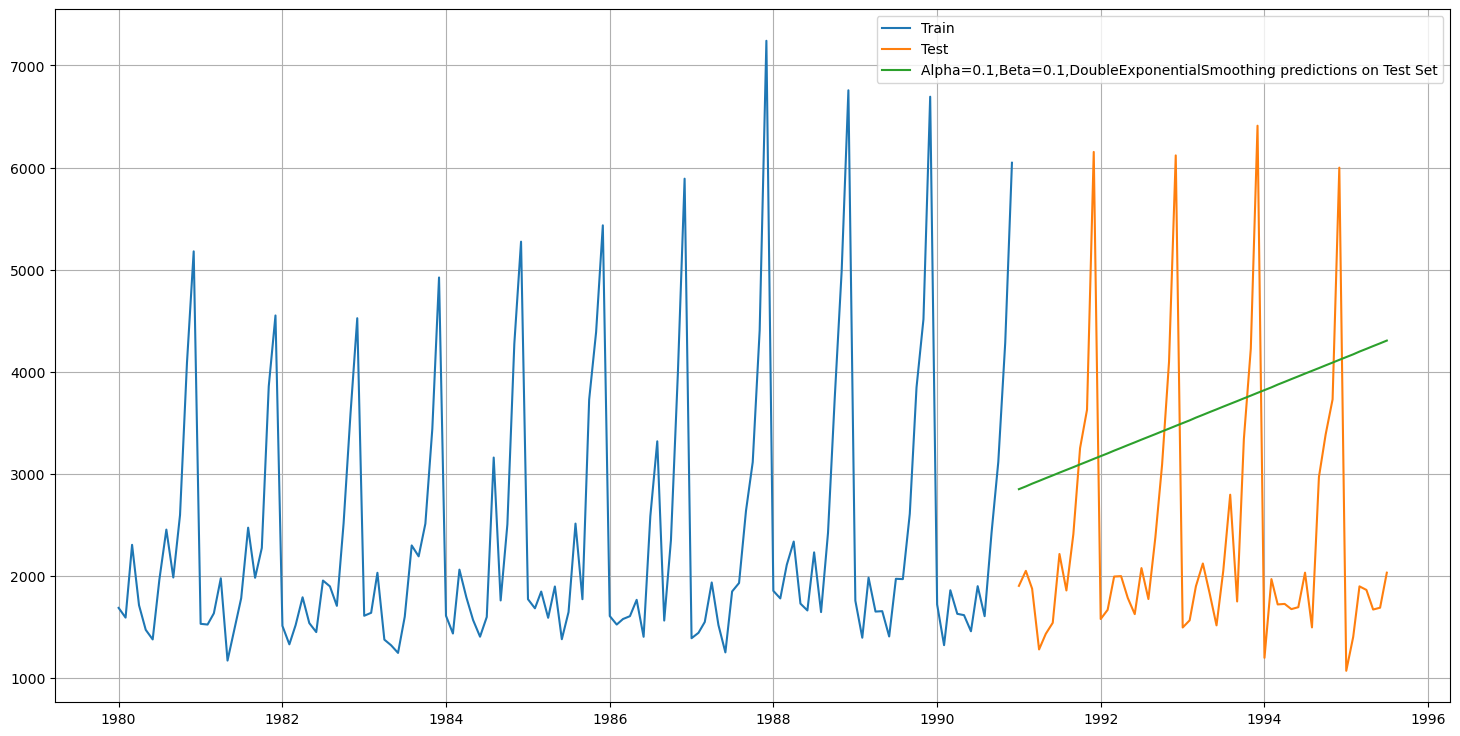

In [67]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [68]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [69]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670

Triple Exponential Smoothing (Holt - Winter's Model)

In [70]:
TES_train = train.copy()
TES_test = test.copy()

In [71]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [73]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [74]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [75]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107188540711412,
 'smoothing_trend': 0.049365309949742364,
 'smoothing_seasonal': 0.3621557605717753,
 'damping_trend': nan,
 'initial_level': 2356.541814724122,
 'initial_trend': 0.9987259871980313,
 'initial_seasons': array([0.73133608, 0.69868555, 0.90031567, 0.81016953, 0.66861198,
        0.66938193, 0.87905698, 1.11657177, 0.91556679, 1.18173667,
        1.84612803, 2.34747359]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11525926167295093,
 'smoothing_trend': 0.013289249637018248,
 'smoothing_seasonal': 0.4565935865353621,
 'damping_trend': nan,
 'initial_level': 2357.2388893517714,
 'initial_trend': 0.9994606442736722,
 'initial_seasons': array([-636.77003546, -723.38956008, -397.61934462, -473.71510371,
        -808.95039309, -815.85988383, -384.23255231,   73.66806555,
        -238.14788586,  272.17070913, 1542.70950197, 2591.09596332]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1490.574426
1991-02-01   2049  1991      2    1204.714325
1991-03-01   1874  1991      3    1688.941106
1991-04-01   1279  1991      4    1551.450810
1991-05-01   1432  1991      5    1461.440427

In [80]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1490.574426    1587.685845
1991-02-01   2049  1991      2    1204.714325    1356.590237
1991-03-01   1874  1991      3    1688.941106    1763.121866
1991-04-01   1279  1991      4    1551.450810    1656.379813
1991-05-01   1432  1991      5    1461.440427    1542.186697

In [81]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1490.574426    1587.685845    1591.454098
1991-02-01   2049  1991      2    1204.714325    1356.590237    1360.482080
1991-03-01   1874  1991      3    1688.941106    1763.121866    1767.997947
1991-04-01   1279  1991      4    1551.450810    1656.379813    1661.667528
1991-05-01   1432  1991      5    1461.440427    1542.186697    1547.440667

In [82]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1490.574426    1587.685845    1591.454098   
1991-02-01   2049  1991      2    1204.714325    1356.590237    1360.482080   
1991-03-01   1874  1991      3    1688.941106    1763.121866    1767.997947   
1991-04-01   1279  1991      4    1551.450810    1656.379813    1661.667528   
1991-05-01   1432  1991      5    1461.440427    1542.186697    1547.440667   

            predict_tm_sa  
YearMonth                  
1991-01-01    1484.431732  
1991-02-01    1200.192764  
1991-03-01    1683.864662  
1991-04-01    1547.844914  
1991-05-01    1457.652829

In [83]:
rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.626
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 403.706
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.393
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 379.646


In [84]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526

In [85]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [86]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [88]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [89]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [90]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1671.894991   
1991-02-01   2049  1991      2                     1535.938082   
1991-03-01   1874  1991      3                     1882.992874   
1991-04-01   1279  1991      4                     1798.243923   
1991-05-01   1432  1991      5                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1540.529588   
1991-02-01                     1354.094081   
1991-03-01                     1728.658127   
1991-04-01                     1638.281580   
1991-05-01                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.827405   
1991-02-01                                     1236.723426   
1991-03-01                                     1644.294990   
1991-04-01                                     1535.922824   
1991-05-01                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.947521                     1440.100315   
1991-02-01                     1163.127303                     1118.381068   
1991-03-01                     1605.772780                     1593.658780   
1991-04-01                     1469.062420                     1424.230588   
1991-05-01                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.456719   
1991-02-01                     1091.681321   
1991-03-01                     1593.602194   
1991-04-01                     1393.229741   
1991-05-01                     1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    1456.102126  ...   
1991-02-01                                    1075.381082  ...   
1991-03-01                                    1595.700721  ...   
1991-04-01                                    1370.975056  ...   
1991-05-01                                    1319.843928  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                   -5.868610e+20                     1681.548575   
1991-02-01                   -1.101754e+23                     2493.688129   
1991-03-01                   -4.674701e+24                     3209.508652   
1991-04-01                   -5.266723e+25                     3046.434803   
1991-05-01                   -1.636152e+26                     2755.658417   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                     1003.861817   
1991-02-01                     1469.309964   
1991-03-01                     2499.957287   
1991-04-01                     2171.122226   
1991-05-01                     1623.114204   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1011.116778   
1991-02-01                                     1145.238568   
1991-03-01                                     2962.569457   
1991-04-01                                     3050.550334   
1991-05-01                                     2612.626803   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

In [91]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
1301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
2245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
1211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
1200           0.3          0.1           0.1  388.220071  337.080969  ta_sm
1110           0.2          0.2           0.1  398.482510  340.186457  ta_sm

In [92]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302

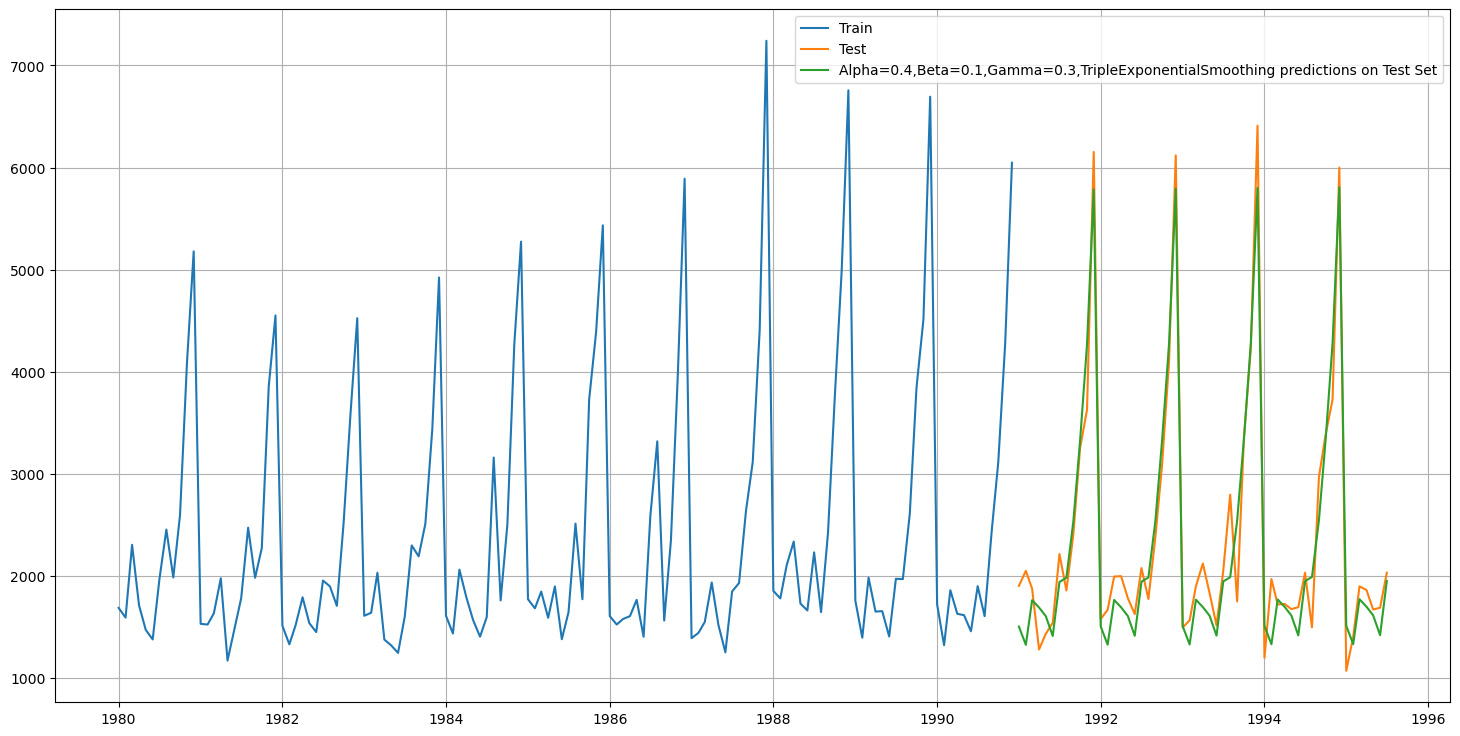

In [93]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

Stationarity

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
dftest = adfuller(df['Sales'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [96]:
from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(df['Sales'])

print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

# Check for stationarity at alpha = 0.05
if result_adf[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")


ADF Statistic: -1.3604974548123374
p-value: 0.6010608871634853
Critical Values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
The time series is likely non-stationary.


In [97]:
sales_ts=df['Sales']

Text(0, 0.5, 'Sales')

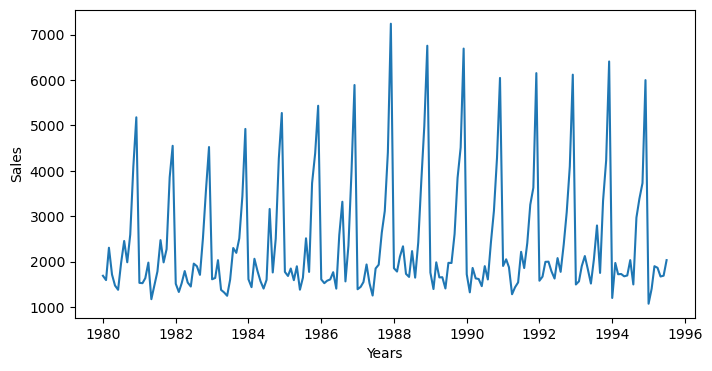

In [98]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

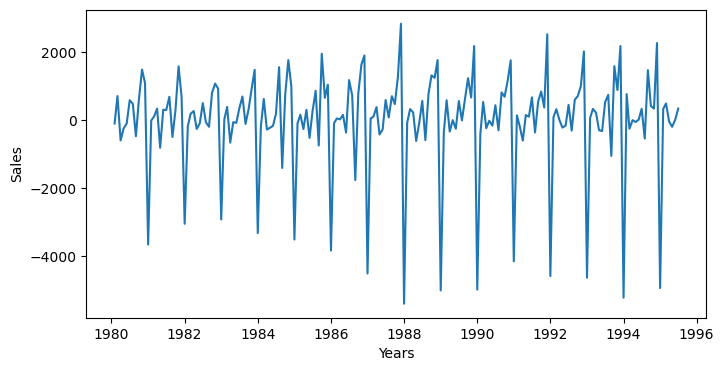

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales')

Text(0, 0.5, 'Log (Sales)')

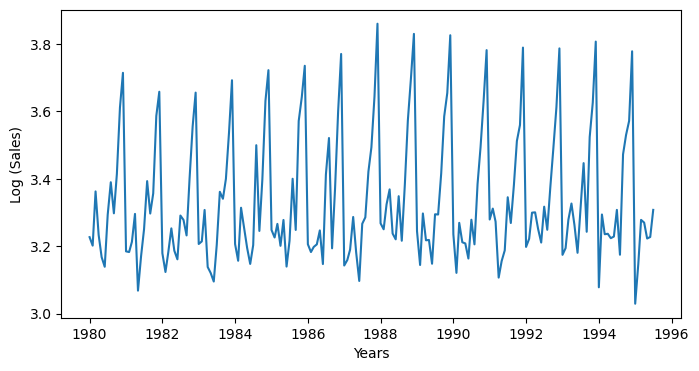

In [100]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Sales)')

Text(0, 0.5, 'Differenced Log (Sales)')

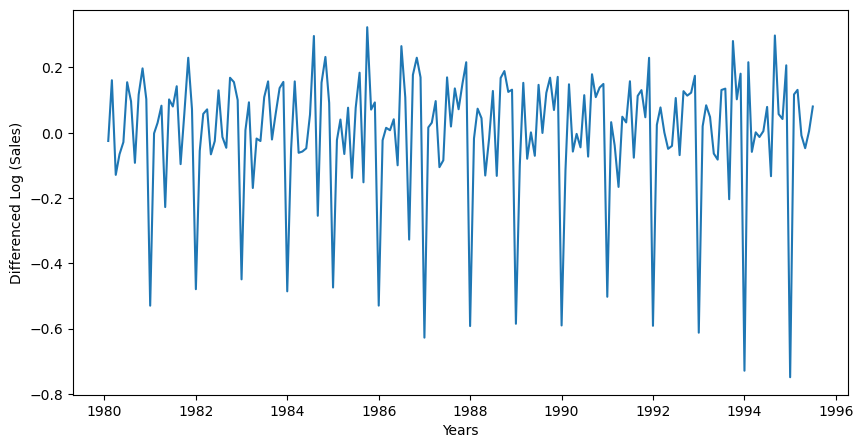

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sales)')

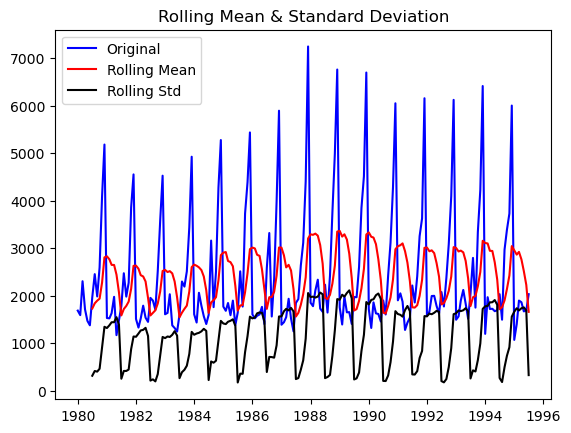

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [102]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

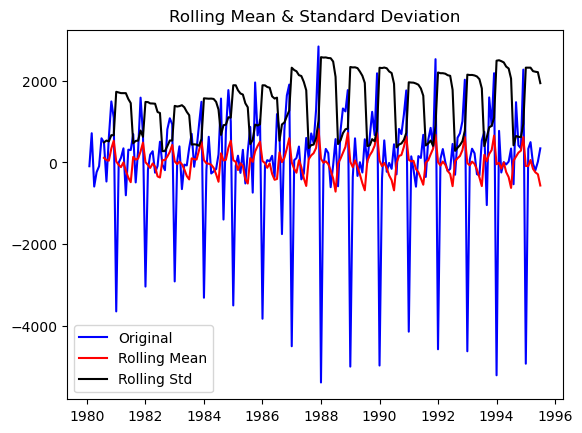

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [103]:
test_stationarity(df['Sales'].diff().dropna())

ARIMA

In [104]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [105]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [106]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.408323127195
ARIMA(0, 1, 3) - AIC:2233.994857753103
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004520257
ARIMA(1, 1, 3) - AIC:2235.6078155489827
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626257477
ARIMA(2, 1, 2) - AIC:2213.509212910968


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9447046181676
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4988286647826


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.778712719756
ARIMA(3, 1, 3) - AIC:2221.454407126953


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.454407
14  (3, 1, 2)  2230.778713
11  (2, 1, 3)  2232.944705
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.498829
7   (1, 1, 3)  2235.607816
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [108]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Fri, 19 Jan 2024   AIC                           2213.509
Time:                        15:17:33   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.784      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

In [109]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9827929808641


In [110]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.982793

SARIMA

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52034D+00    |proj g|=  1.10083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.712D-06   8.520D+00
  F =   8.5203019685086989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81282D+00    |proj g|=  2.60922D-01

At iterate    5    f=  6.74821D+00    |proj g|=  8.04010D-04

At iterate   10    f=  6.74805D+00    |proj g|=  6.95564D-03

At iterate   15    f=  6.72729D+00    |proj g|=  9.90806D-02

At iterate   20    f=  6.50692D+00    |proj g|=  2.72359D-02

At iterate   25    f=  6.50437D+00    |proj g|=  1.99286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.17523D+01    |proj g|=  3.20625D+05
  ys=-1.407E-02  -gs= 8.762E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     65      1     1     0   3.206D+05   1.175D+01
  F =   11.752347143784842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3110.6196459591984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94484D+00    |proj g|=  2.86769D-05

           * * *

Tit   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.83010D+00    |proj g|=  9.31733D-03

At iterate   15    f=  6.82959D+00    |proj g|=  1.24439D-01

At iterate   20    f=  6.82239D+00    |proj g|=  1.20231D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     43      1     0     0   2.374D-05   6.822D+00
  F =   6.8219338262840683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.15664D+00    |proj g|=  1.01122D-01

At iterate   10    f=  6.15610D+00    |proj g|=  3.04724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   3.211D-04   6.156D+00
  F =   6.1561017938606284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792058
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67037D+01    |proj g|=  2.29580D-03


 This problem is unconstrained.


  ys=-2.640E+01  -gs= 6.939E-01 BFGS update SKIPPED
  ys=-1.631E+02  -gs= 7.090E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.523E+01  -gs= 6.980E-01 BFGS update SKIPPED

At iterate    5    f=  1.38334D+01    |proj g|=  1.74284D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6    130      4     3     0   1.743D+04   1.383D+01
  F =   13.833448701704484     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3662.0304572499836
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22113D+00    |proj g|=  2.77509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate   15    f=  6.14370D+00    |proj g|=  2.05373D-03

At iterate   20    f=  6.14349D+00    |proj g|=  3.47800D-02

At iterate   25    f=  6.14069D+00    |proj g|=  4.56004D-02

At iterate   30    f=  6.14011D+00    |proj g|=  1.50444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.162D-06   6.140D+00
  F =   6.1401128992124061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920751
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.


  ys=-3.092E+01  -gs= 6.964E-01 BFGS update SKIPPED
  ys=-2.104E+02  -gs= 7.097E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     77      2     2     0   4.297D+03   1.546D+01
  F =   15.457802111403932     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4092.859757410638
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52825D+00    |proj g|=  2.54531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.



At iterate    5    f=  5.52773D+00    |proj g|=  2.97532D-02

At iterate   10    f=  5.52723D+00    |proj g|=  1.41468D-03

At iterate   15    f=  5.52722D+00    |proj g|=  2.05800D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   4.719D-05   5.527D+00
  F =   5.5272238835702954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262558
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.52983D+00    |proj g|=  3.23208D-02

At iterate   10    f=  5.52682D+00    |proj g|=  2.67914D-03

At iterate   15    f=  5.52674D+00    |proj g|=  1.30495D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   8.945D-05   5.527D+00
  F =   5.5267403522971001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.


  ys=-6.537E+01  -gs= 7.045E-01 BFGS update SKIPPED
  ys=-1.626E+01  -gs= 7.112E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     89      2     2     0   2.535D+04   1.324D+01
  F =   13.240197746090812     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3509.4122049679745
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43494D+00    |proj g|=  4.51382D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate    5    f=  6.60887D+00    |proj g|=  3.95890D-03

At iterate   10    f=  6.60872D+00    |proj g|=  3.96863D-04
  ys=-1.806E-02  -gs= 3.972E-04 BFGS update SKIPPED

At iterate   15    f=  6.59831D+00    |proj g|=  7.88726D-03

At iterate   20    f=  6.59746D+00    |proj g|=  2.57416D-02

At iterate   25    f=  6.49450D+00    |proj g|=  3.06849D-01

At iterate   30    f=  6.41806D+00    |proj g|=  3.77398D-02

At iterate   35    f=  6.41420D+00    |proj g|=  3.89234D-03

At iterate   40    f=  6.38160D+00    |proj g|=  7.91629D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     69      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80025D+01    |proj g|=  5.16660D-04
  ys=-1.141E+02  -gs= 5.794E+01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.33353D+01    |proj g|=  1.06179D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     57      1     1     0   1.062D+06   1.334D+01
  F =   13.335286170482071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3530.5155490072666
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39606D+00    |proj g|=  1.95100D-02

At iterate    5    f=  7.39343D+00    |proj g|=  5.78513D-04

At iterate   1

 This problem is unconstrained.



At iterate   25    f=  6.61162D+00    |proj g|=  6.81981D-01

At iterate   30    f=  6.55340D+00    |proj g|=  6.89609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     51      1     0     0   8.107D-06   6.553D+00
  F =   6.5533724218931662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193797958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53402D+00    |proj g|=  1.77413D-01



 This problem is unconstrained.


At iterate    5    f=  6.51779D+00    |proj g|=  2.13209D-02

At iterate   10    f=  6.51210D+00    |proj g|=  1.67353D-03

At iterate   15    f=  6.51207D+00    |proj g|=  6.77501D-04

At iterate   20    f=  6.51091D+00    |proj g|=  2.73467D-02

At iterate   25    f=  6.46410D+00    |proj g|=  1.46076D-01

At iterate   30    f=  5.93517D+00    |proj g|=  7.28847D-01

At iterate   35    f=  5.91324D+00    |proj g|=  3.98435D-02

At iterate   40    f=  5.90967D+00    |proj g|=  3.66786D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     61      1     0     0   1.527D-05   5.910D+00
  F =   5.909662554544

 This problem is unconstrained.


  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.273E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5    116      3     2     0   1.825D+05   1.239D+01
  F =   12.390508849414907     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3283.0943362455355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64553D+00    |proj g|=  2.79384D-02

At iterate    5    f=  6.63558D+00    |proj g|=  7.64597D-03

At iterate   10    f=  6.63551D+00    |proj g|=  1.48500D-03

At iterate   1

 This problem is unconstrained.


At iterate    5    f=  6.63401D+00    |proj g|=  3.17357D-03

At iterate   10    f=  6.63397D+00    |proj g|=  2.30371D-03

At iterate   15    f=  6.63363D+00    |proj g|=  2.55737D-02

At iterate   20    f=  6.57192D+00    |proj g|=  2.65871D-01

At iterate   25    f=  6.29211D+00    |proj g|=  8.83222D-02

At iterate   30    f=  6.04430D+00    |proj g|=  1.70938D-01

At iterate   35    f=  6.01985D+00    |proj g|=  3.96300D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  6.01979D+00    |proj g|=  6.95186D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     91      2     0     0   6.952D-05   6.020D+00
  F =   6.0197898044436791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245083731314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52995D+00    |proj g|=  9.53154D-02

At iterate    5    f=  6.51434D+00    |proj g|=  2.13880D-02

At iterate   1

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64894D+01    |proj g|=  5.17647D-04
  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.273E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5    116      3     2     0   1.807D+05   1.143D+01
  F =   11.434419108121745     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3032.6866445441406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90038D+00    |proj g|=  2.69575D-02

At iterate    5    f=  5.89108D+00    |proj g|=  3.05866D-03

At iterate   10    f=  5.89097D+00    |proj g|=  4.76818D-04

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.89090D+00    |proj g|=  4.03698D-03

At iterate   10    f=  5.89082D+00    |proj g|=  4.77144D-04

At iterate   15    f=  5.89021D+00    |proj g|=  3.68454D-03

At iterate   20    f=  5.85888D+00    |proj g|=  6.53626D-02

At iterate   25    f=  5.52253D+00    |proj g|=  2.40634D+00

At iterate   30    f=  5.38528D+00    |proj g|=  4.74767D-01

At iterate   35    f=  5.37252D+00    |proj g|=  1.24307D-01

At iterate   40    f=  5.36781D+00    |proj g|=  5.22479D-02

At iterate   45    f=  5.36699D+00    |proj g|=  1.35377D-02

At iterate   50    f=  5.36694D+00    |proj g|=  9.87523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.89995D+00    |proj g|=  3.71337D-02

At iterate   10    f=  5.89064D+00    |proj g|=  5.88275D-04

At iterate   15    f=  5.89062D+00    |proj g|=  1.77084D-03

At iterate   20    f=  5.89048D+00    |proj g|=  3.98444D-03

At iterate   25    f=  5.88654D+00    |proj g|=  4.65522D-02

At iterate   30    f=  5.66907D+00    |proj g|=  2.18849D-01

At iterate   35    f=  5.43010D+00    |proj g|=  3.12486D-01

At iterate   40    f=  5.36217D+00    |proj g|=  5.21597D-02

At iterate   45    f=  5.36208D+00    |proj g|=  8.40129D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     56   

 This problem is unconstrained.


  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.273E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5    116      3     2     0   1.786D+05   1.188D+01
  F =   11.884718878678111     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3153.565783971021
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32942D+00    |proj g|=  1.05574D-01

At iterate    5    f=  8.26303D+00    |proj g|=  1.68046D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.30236D+00    |proj g|=  8.84268D-04

At iterate   15    f=  7.30176D+00    |proj g|=  1.86516D-02

At iterate   20    f=  7.24806D+00    |proj g|=  2.10277D-01

At iterate   25    f=  7.12109D+00    |proj g|=  1.90530D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     41      1     0     0   7.626D-06   7.121D+00
  F =   7.1208818209089779     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007199702


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59897D+00    |proj g|=  2.74808D-01

At iterate    5    f=  6.51398D+00    |proj g|=  3.13285D-02

At iterate   10    f=  6.51091D+00    |proj g|=  8.81403D-04

At iterate   15    f=  6.51089D+00    |proj g|=  1.95195D-03

At iterate   20    f=  6.50753D+00    |proj g|=  2.77617D-02

At iterate   25    f=  6.29952D+00    |proj g|=  2.37660D-01

At iterate   30    f=  6.25418D+00    |proj g|=  7.50857D-02

At iterate   35    f=  6.24954D+00    |proj g|=  5.78783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


  ys=-5.742E+08  -gs= 1.517E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     31      2     1     0   1.964D+06   8.147D+00
  F =   8.1473062019406282     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2162.888837312326
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38220D+00    |proj g|=  2.99241D-02

At iterate    5    f=  7.37844D+00    |proj g|=  5.91790D-04

At iterate   10    f=  7.37826D+00    |proj g|=  5.77768D-03

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  7.18032D+00    |proj g|=  1.01371D-02

At iterate   10    f=  7.17962D+00    |proj g|=  7.78818D-04

At iterate   15    f=  7.17956D+00    |proj g|=  1.00833D-02

At iterate   20    f=  7.17214D+00    |proj g|=  1.09509D-01

At iterate   25    f=  6.93762D+00    |proj g|=  3.82251D-01

At iterate   30    f=  6.54301D+00    |proj g|=  1.75398D-01

At iterate   35    f=  6.49346D+00    |proj g|=  4.05141D-02

At iterate   40    f=  6.49306D+00    |proj g|=  2.81037D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   2.810D-05   6.493D+00
  F =   6.49305873931

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45932D+00    |proj g|=  1.79142D-01

At iterate    5    f=  6.44205D+00    |proj g|=  1.44127D-02

At iterate   10    f=  6.44039D+00    |proj g|=  1.20117D-03

At iterate   15    f=  6.44035D+00    |proj g|=  2.87319D-03

At iterate   20    f=  6.43760D+00    |proj g|=  3.37020D-02

At iterate   25    f=  6.27972D+00    |proj g|=  1.52579D-01

At iterate   30    f=  5.94015D+00    |proj g|=  1.39535D+00

At iterate   35    f=  5.85684D+00    |proj g|=  1.11685D-01

At iterate   40    f=  5.85288D+00    |proj g|=  5.08526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71570D+01    |proj g|=  5.18918D-04
  ys=-2.341E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-1.164E+02  -gs= 6.928E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     86      2     2     0   2.505D+04   1.470D+01
  F =   14.696967813937693     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3893.999502879551
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63133D+00    |proj g|=  2.97755D-02


 This problem is unconstrained.



At iterate    5    f=  6.62522D+00    |proj g|=  8.04445D-03

At iterate   10    f=  6.62481D+00    |proj g|=  7.74502D-04

At iterate   15    f=  6.62467D+00    |proj g|=  8.10509D-03

At iterate   20    f=  6.61039D+00    |proj g|=  9.92766D-02

At iterate   25    f=  6.28017D+00    |proj g|=  4.03141D-01

At iterate   30    f=  6.04354D+00    |proj g|=  1.92380D-01

At iterate   35    f=  6.03775D+00    |proj g|=  6.91989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   7.758D-07   6.038D+00
  F =   6.0377480206377303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.62428D+00    |proj g|=  7.76003D-03

At iterate   10    f=  6.62380D+00    |proj g|=  7.91779D-04

At iterate   15    f=  6.62374D+00    |proj g|=  2.62799D-03

At iterate   20    f=  6.62124D+00    |proj g|=  4.62265D-02

At iterate   25    f=  6.54720D+00    |proj g|=  1.50289D-01

At iterate   30    f=  6.10249D+00    |proj g|=  4.68117D-01

At iterate   35    f=  6.01789D+00    |proj g|=  6.41696D-02

At iterate   40    f=  6.01721D+00    |proj g|=  8.46917D-04

At iterate   45    f=  6.01721D+00    |proj g|=  3.27459D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     59   

 This problem is unconstrained.



At iterate    5    f=  6.43958D+00    |proj g|=  1.67010D-02

At iterate   10    f=  6.43760D+00    |proj g|=  2.35412D-03

At iterate   15    f=  6.43756D+00    |proj g|=  1.49203D-03

At iterate   20    f=  6.43750D+00    |proj g|=  1.65008D-03

At iterate   25    f=  6.43627D+00    |proj g|=  8.99003D-03

At iterate   30    f=  6.35094D+00    |proj g|=  2.46035D-01

At iterate   35    f=  6.04178D+00    |proj g|=  4.04905D-01

At iterate   40    f=  5.89153D+00    |proj g|=  1.76792D-01

At iterate   45    f=  5.85278D+00    |proj g|=  1.63535D-02

At iterate   50    f=  5.84711D+00    |proj g|=  2.96307D-02

At iterate   55    f=  5.84550D+00    |proj g|=  2.67797D-02

At iterate   60    f=  5.84517D+00    |proj g|=  6.81212D-03

At iterate   65    f=  5.84516D+00    |proj g|=  8.36295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


  ys=-2.342E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-1.186E+02  -gs= 6.929E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.25968D+01    |proj g|=  1.35642D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6    105      2     2     0   1.356D+04   1.260D+01
  F =   12.596847342792023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3341.567698497094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88816D+00    |proj g|=  2.67229D-02

At iterate    5    f=  5.88223D+00    |proj g|=  3.03610D-03

At iterate   10    f=  5.88201D+00    |proj g|=  2.94608D-03

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  5.88222D+00    |proj g|=  7.06731D-03

At iterate   10    f=  5.88200D+00    |proj g|=  1.35941D-03

At iterate   15    f=  5.88195D+00    |proj g|=  2.16960D-03

At iterate   20    f=  5.88182D+00    |proj g|=  3.00750D-03

At iterate   25    f=  5.86024D+00    |proj g|=  4.13289D-02

At iterate   30    f=  5.52967D+00    |proj g|=  4.86115D-01

At iterate   35    f=  5.39747D+00    |proj g|=  3.83280D-02

At iterate   40    f=  5.36475D+00    |proj g|=  1.13589D-01

At iterate   45    f=  5.36303D+00    |proj g|=  1.78478D-02

At iterate   50    f=  5.36267D+00    |proj g|=  3.68652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.88732D+00    |proj g|=  3.22763D-02

At iterate   10    f=  5.88191D+00    |proj g|=  3.87412D-03

At iterate   15    f=  5.88183D+00    |proj g|=  1.09018D-03

At iterate   20    f=  5.88178D+00    |proj g|=  1.42741D-03

At iterate   25    f=  5.87904D+00    |proj g|=  1.10212D-02

At iterate   30    f=  5.82070D+00    |proj g|=  7.66471D-02

At iterate   35    f=  5.59134D+00    |proj g|=  3.71749D-01

At iterate   40    f=  5.38015D+00    |proj g|=  1.06063D-01

At iterate   45    f=  5.37015D+00    |proj g|=  1.07697D-01

At iterate   50    f=  5.35959D+00    |proj g|=  5.90096D-02

At iterate   55    f=  5.35867D+00    |proj g|=  4.32067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-2.341E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-1.160E+02  -gs= 6.928E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     86      2     2     0   2.497D+04   1.416D+01
  F =   14.163583005265993     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3757.185913390222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21117D+00    |proj g|=  1.86120D-01

At iterate    5    f=  8.18715D+00    |proj g|=  3.42436D-04

At iterate   10    f=  8.18714D+00    |proj g|=  3.35741D-03

At iterate   15

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.21184D+00    |proj g|=  2.06608D-02

At iterate   10    f=  7.21140D+00    |proj g|=  4.15582D-04

At iterate   15    f=  7.21138D+00    |proj g|=  5.50181D-03

At iterate   20    f=  7.20822D+00    |proj g|=  4.70014D-02

At iterate   25    f=  7.08341D+00    |proj g|=  2.47468D-01

At iterate   30    f=  7.06058D+00    |proj g|=  5.92562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   8.214D-05   7.061D+00
  F =   7.0605192044482310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770699743

 This problem is unconstrained.



At iterate    5    f=  6.42432D+00    |proj g|=  4.60879D-02

At iterate   10    f=  6.41985D+00    |proj g|=  5.14646D-03

At iterate   15    f=  6.41970D+00    |proj g|=  1.38618D-03

At iterate   20    f=  6.41954D+00    |proj g|=  1.25013D-02

At iterate   25    f=  6.33280D+00    |proj g|=  2.23284D-01

At iterate   30    f=  6.27029D+00    |proj g|=  1.33577D-01

At iterate   35    f=  6.18055D+00    |proj g|=  4.41278D-02

At iterate   40    f=  6.17916D+00    |proj g|=  2.73672D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   2.852D-05   6.179D+00
  F =   6.17915669077

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     62      2     0     0   2.710D+06   9.146D-01
  F =  0.91459680771467244     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:255.45355723667353
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34019D+00    |proj g|=  1.96882D-02

At iterate    5    f=  7.33716D+00    |proj g|=  6.15452D-04

At iterate   10    f=  7.33682D+00    |proj g|=  5.18513D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  7.07674D+00    |proj g|=  1.77139D-02

At iterate   10    f=  7.07613D+00    |proj g|=  6.15484D-04

At iterate   15    f=  7.07608D+00    |proj g|=  1.34169D-03

At iterate   20    f=  7.07545D+00    |proj g|=  1.62997D-02

At iterate   25    f=  7.05405D+00    |proj g|=  9.97896D-02

At iterate   30    f=  6.79521D+00    |proj g|=  2.10675D-01

At iterate   35    f=  6.47064D+00    |proj g|=  8.65909D-02

At iterate   40    f=  6.43434D+00    |proj g|=  6.27988D-02

At iterate   45    f=  6.43425D+00    |proj g|=  5.86781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     64   

 This problem is unconstrained.



At iterate    5    f=  6.34411D+00    |proj g|=  1.66922D-02

At iterate   10    f=  6.34133D+00    |proj g|=  1.43848D-03

At iterate   15    f=  6.34125D+00    |proj g|=  2.94638D-03

At iterate   20    f=  6.33798D+00    |proj g|=  3.31656D-02

At iterate   25    f=  6.23855D+00    |proj g|=  1.95025D-01

At iterate   30    f=  5.80480D+00    |proj g|=  9.08640D-02

At iterate   35    f=  5.79091D+00    |proj g|=  2.39170D-02

At iterate   40    f=  5.79069D+00    |proj g|=  4.10228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     52      1     0     0   4.981D-04   5.791D+00
  F =   5.79068901582

 This problem is unconstrained.


  ys=-2.083E+01  -gs= 6.680E-01 BFGS update SKIPPED
  ys=-2.543E+01  -gs= 6.717E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.37260D+01    |proj g|=  6.04307D+04
  ys=-1.935E+01  -gs= 6.651E-01 BFGS update SKIPPED
  ys=-1.567E+00  -gs= 4.210E-01 BFGS update SKIPPED
  ys=-2.843E-02  -gs= 5.062E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8    153      3     5     0   4.457D+05   9.502D+00
  F =   9.5016971387545084     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2524.44804463119
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59495D+00    |proj g|=  3.12074D-02

At iterate    5    f=  6.58643D+00    |proj g|=  5.67590D-04

At iterate   10    f=  6.58637D+00    |proj g|=  3.03105D-03

At iterate   15 

 This problem is unconstrained.



At iterate    5    f=  6.58541D+00    |proj g|=  4.22783D-03

At iterate   10    f=  6.58519D+00    |proj g|=  5.70072D-04

At iterate   15    f=  6.58491D+00    |proj g|=  4.48819D-03

At iterate   20    f=  6.57961D+00    |proj g|=  1.67804D-02

At iterate   25    f=  6.54593D+00    |proj g|=  8.00847D-02

At iterate   30    f=  6.23682D+00    |proj g|=  1.32564D+00

At iterate   35    f=  6.05339D+00    |proj g|=  2.20316D-01

At iterate   40    f=  6.01481D+00    |proj g|=  7.10663D-02

At iterate   45    f=  6.01163D+00    |proj g|=  4.70354D-03

At iterate   50    f=  6.01162D+00    |proj g|=  7.05398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.34126D+00    |proj g|=  1.59975D-02

At iterate   10    f=  6.33878D+00    |proj g|=  6.80181D-04

At iterate   15    f=  6.33874D+00    |proj g|=  5.48712D-04

At iterate   20    f=  6.33845D+00    |proj g|=  4.97725D-03

At iterate   25    f=  6.32944D+00    |proj g|=  3.30422D-02

At iterate   30    f=  6.28542D+00    |proj g|=  1.03346D-01

At iterate   35    f=  5.99636D+00    |proj g|=  4.14017D-01

At iterate   40    f=  5.80878D+00    |proj g|=  1.49918D-01

At iterate   45    f=  5.79604D+00    |proj g|=  3.89356D-02

At iterate   50    f=  5.78778D+00    |proj g|=  1.61043D-02

At iterate   55    f=  5.78508D+00    |proj g|=  1.65347D-02

At iterate   60    f=  5.78437D+00    |proj g|=  5.80155D-03

At iterate   65    f=  5.78428D+00    |proj g|=  4.29442D-03

At iterate   70    f=  5.78428D+00    |proj g|=  3.67117D-04

At iterate   75    f=  5.78428D+00    |proj g|=  7.47263D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


  ys=-2.083E+01  -gs= 6.680E-01 BFGS update SKIPPED
  ys=-2.543E+01  -gs= 6.717E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.27649D+01    |proj g|=  6.10108D+04
  ys=-1.966E+01  -gs= 6.654E-01 BFGS update SKIPPED
  ys=-1.852E+00  -gs= 4.235E-01 BFGS update SKIPPED
  ys=-1.082E-02  -gs= 3.489E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8    152      3     5     0   4.295D+05   8.712D+00
  F =   8.7119470814287787     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2317.9540294971976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85687D+00    |proj g|=  3.27240D-02


 This problem is unconstrained.



At iterate    5    f=  5.84847D+00    |proj g|=  1.13183D-02

At iterate   10    f=  5.84819D+00    |proj g|=  8.88322D-04

At iterate   15    f=  5.84816D+00    |proj g|=  1.84897D-03

At iterate   20    f=  5.84780D+00    |proj g|=  1.21411D-02

At iterate   25    f=  5.83472D+00    |proj g|=  4.43866D-02

At iterate   30    f=  5.54713D+00    |proj g|=  4.52913D-01

At iterate   35    f=  5.36655D+00    |proj g|=  8.12738D-02

At iterate   40    f=  5.36232D+00    |proj g|=  8.91211D-04

At iterate   45    f=  5.36232D+00    |proj g|=  1.32743D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     67   

 This problem is unconstrained.



At iterate    5    f=  5.84821D+00    |proj g|=  3.56044D-03

At iterate   10    f=  5.84801D+00    |proj g|=  6.68659D-04

At iterate   15    f=  5.84775D+00    |proj g|=  5.93145D-03

At iterate   20    f=  5.81606D+00    |proj g|=  8.66182D-02

At iterate   25    f=  5.64167D+00    |proj g|=  1.60724D-01

At iterate   30    f=  5.41698D+00    |proj g|=  2.43485D-01

At iterate   35    f=  5.39835D+00    |proj g|=  1.05963D-02

At iterate   40    f=  5.39828D+00    |proj g|=  5.27099D-04

At iterate   45    f=  5.39827D+00    |proj g|=  9.97959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87244D+00    |proj g|=  9.43878D-02

At iterate    5    f=  5.85434D+00    |proj g|=  3.34038D-02

At iterate   10    f=  5.84785D+00    |proj g|=  1.88618D-03

At iterate   15    f=  5.84780D+00    |proj g|=  6.38584D-04

At iterate   20    f=  5.84776D+00    |proj g|=  1.17027D-03

At iterate   25    f=  5.84744D+00    |proj g|=  3.68299D-03

At iterate   30    f=  5.84513D+00    |proj g|=  7.58093D-03

At iterate   35    f=  5.75880D+00    |proj g|=  3.34070D-01

At iterate   40    f=  5.58215D+00    |proj g|=  1.56715D-01

At iterate   45    f=  5.43262D+00    |proj g|=  1.05245D+00

At iterate   50    f=  5.37642D+00    |proj g|=  1.53998D-01

At iterate   55    f=  5.35632D+00    |proj g|=  2.46051D-02

At iterate   60    f=  5.35518D+00    |proj g|=  6.71019D-03

At iterate   65    f=  5.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62959D+01    |proj g|=  5.40478D-04
  ys=-2.083E+01  -gs= 6.680E-01 BFGS update SKIPPED
  ys=-2.543E+01  -gs= 6.717E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.31765D+01    |proj g|=  6.15601D+04
  ys=-1.992E+01  -gs= 6.657E-01 BFGS update SKIPPED
  ys=-3.201E+00  -gs= 4.265E-01 BFGS update SKIPPED
  ys=-1.184E-04  -gs= 4.821E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8    153      3     5     0   5.364D+05   8.065D+00
  F =   8.0646819601268493     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2149.076037473488
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50878D+00    |proj g|=  4.97788D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49500D+00    |proj g|=  1.27302D-01

At iterate    5    f=  7.48838D+00    |proj g|=  3.52320D-04

At iterate   10    f=  7.48820D+00    |proj g|=  1.00153D-02

At iterate   15    f=  7.46845D+00    |proj g|=  1.25627D-01

At iterate   20    f=  7.38088D+00    |proj g|=  6.09405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   9.280D-07   7.380D+00
  F =   7.3802796742062551     

CONVERG

 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.072E-01 BFGS update SKIPPED
  ys=-3.979E+01  -gs= 6.998E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37712D+01    |proj g|=  1.04794D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     64      2     2     0   1.048D+05   1.377D+01
  F =   13.771194168245209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3645.595260416735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34029D+00    |proj g|=  2.47178D-02

At iterate    5    f=  7.33802D+00    |proj g|=  1.80520D-03

At iterate   10

 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359267735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60192D+00    |proj g|=  1.77759D-01

At iterate    5    f=  6.58825D+00    |proj g|=  1.00812D-02

At iterate   10    f=  6.58747D+00    |proj g|=  5.13887D-04


 This problem is unconstrained.



At iterate   15    f=  6.58716D+00    |proj g|=  1.76190D-02

At iterate   20    f=  6.54471D+00    |proj g|=  1.11544D-01

At iterate   25    f=  6.14684D+00    |proj g|=  7.61841D-01

At iterate   30    f=  6.08520D+00    |proj g|=  3.58174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   3.315D-05   6.085D+00
  F =   6.0851872750098730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894406026065
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-1.099E+01  -gs= 6.919E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     81      3     2     0   1.086D+05   1.319D+01
  F =   13.193177948895881     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3494.9989785085127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59028D+00    |proj g|=  2.31631D-02

At iterate    5    f=  6.58776D+00    |proj g|=  5.12113D-04

At iterate   10    f=  6.58715D+00    |proj g|=  6.55280D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.58597D+00    |proj g|=  7.32489D-04

At iterate   10    f=  6.58593D+00    |proj g|=  8.87245D-04

At iterate   15    f=  6.58565D+00    |proj g|=  2.13880D-02

At iterate   20    f=  6.54803D+00    |proj g|=  9.73974D-02

At iterate   25    f=  6.13537D+00    |proj g|=  8.74329D-01

At iterate   30    f=  6.09378D+00    |proj g|=  3.45668D-02

At iterate   35    f=  6.08764D+00    |proj g|=  1.16384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   6.570D-05   6.088D+00
  F =   6.0876348985172539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  6.58458D+00    |proj g|=  4.21260D-03

At iterate   20    f=  6.58429D+00    |proj g|=  5.43403D-03

At iterate   25    f=  6.54333D+00    |proj g|=  1.04731D-01

At iterate   30    f=  6.17973D+00    |proj g|=  2.73743D-01

At iterate   35    f=  6.08919D+00    |proj g|=  5.83060D-02

At iterate   40    f=  6.07782D+00    |proj g|=  1.05870D-02

At iterate   45    f=  6.07781D+00    |proj g|=  4.08075D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     54      1     0     0   4.081D-05   6.078D+00
  F =   6.0778076012962474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-1.019E+01  -gs= 6.930E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     81      3     2     0   1.011D+05   1.227D+01
  F =   12.271821748161569     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3253.7609415146544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84469D+00    |proj g|=  2.22947D-02

At iterate    5    f=  5.84176D+00    |proj g|=  4.54453D-04

At iterate   10    f=  5.84124D+00    |proj g|=  6.12163D-03

At iterate   1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84459D+00    |proj g|=  2.25863D-02

At iterate    5    f=  5.84164D+00    |proj g|=  4.54637D-04

At iterate   10    f=  5.84152D+00    |proj g|=  1.30892D-03

At iterate   15    f=  5.83592D+00    |proj g|=  1.20202D-02

At iterate   20    f=  5.52292D+00    |proj g|=  1.56273D-01

At iterate   25    f=  5.41764D+00    |proj g|=  1.33926D-02

At iterate   30    f=  5.41732D+00    |proj g|=  1.54741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.84537D+00    |proj g|=  2.92031D-02

At iterate   10    f=  5.84173D+00    |proj g|=  4.67855D-03

At iterate   15    f=  5.84158D+00    |proj g|=  1.08745D-03

At iterate   20    f=  5.84154D+00    |proj g|=  4.54755D-04

At iterate   25    f=  5.84137D+00    |proj g|=  1.09678D-02

At iterate   30    f=  5.83039D+00    |proj g|=  8.54007D-02

At iterate   35    f=  5.80202D+00    |proj g|=  1.51678D-01

At iterate   40    f=  5.61838D+00    |proj g|=  4.37759D-01

At iterate   45    f=  5.42299D+00    |proj g|=  5.38305D-02

At iterate   50    f=  5.41620D+00    |proj g|=  1.52933D-02

At iterate   55    f=  5.41578D+00    |proj g|=  2.27725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-1.024E+01  -gs= 6.929E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     81      3     2     0   1.016D+05   1.270D+01
  F =   12.702668161780624     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3369.504394710085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38064D+00    |proj g|=  3.00003D-01

At iterate    5    f=  8.32931D+00    |proj g|=  1.65241D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.



At iterate    5    f=  6.57318D+00    |proj g|=  6.04926D-02

At iterate   10    f=  6.56961D+00    |proj g|=  5.39714D-04

At iterate   15    f=  6.56958D+00    |proj g|=  4.03910D-03

At iterate   20    f=  6.56822D+00    |proj g|=  2.32205D-02

At iterate   25    f=  6.46051D+00    |proj g|=  1.62190D-01

At iterate   30    f=  6.42471D+00    |proj g|=  4.78480D-02
  ys=-4.907E-02  -gs= 3.678E-02 BFGS update SKIPPED

At iterate   35    f=  6.33214D+00    |proj g|=  8.87159D-02

At iterate   40    f=  6.31855D+00    |proj g|=  1.03924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     65      1     1

 This problem is unconstrained.


  ys=-1.183E+01  -gs= 2.123E-04 BFGS update SKIPPED
  ys=-8.015E+07  -gs= 1.214E+03 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     35      3     2     0   3.005D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:12.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32696D+00    |proj g|=  5.05184D-01

At iterate    5    f=  7.30025D+00    |proj g|=  1.06228D-02

At iterate   10    f=  7.30006D+00    |proj g|=  8.89193D-04

At iterate   15    f=  7.299

 This problem is unconstrained.



At iterate   30    f=  6.79836D+00    |proj g|=  1.24224D+00

At iterate   35    f=  6.69434D+00    |proj g|=  2.38375D-02

At iterate   40    f=  6.69386D+00    |proj g|=  7.24468D-04

At iterate   45    f=  6.69372D+00    |proj g|=  3.00934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     65      1     0     0   3.009D-05   6.694D+00
  F =   6.6937213888366740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.142446652882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  7.23407D+00    |proj g|=  3.06733D-02

At iterate   10    f=  7.23074D+00    |proj g|=  6.06755D-04

At iterate   15    f=  7.23052D+00    |proj g|=  5.82554D-03

At iterate   20    f=  7.20838D+00    |proj g|=  8.28078D-02

At iterate   25    f=  7.14470D+00    |proj g|=  2.88948D-01

At iterate   30    f=  7.04298D+00    |proj g|=  2.02211D-01

At iterate   35    f=  6.73113D+00    |proj g|=  4.38680D-01

At iterate   40    f=  6.59556D+00    |proj g|=  1.14213D+00

At iterate   45    f=  6.56544D+00    |proj g|=  5.48368D-02

At iterate   50    f=  6.55134D+00    |proj g|=  2.84559D-02

At iterate   55    f=  6.55131D+00    |proj g|=  1.83230D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  6.49269D+00    |proj g|=  1.35046D-03

At iterate   15    f=  6.49267D+00    |proj g|=  3.58480D-03

At iterate   20    f=  6.49141D+00    |proj g|=  1.50204D-02

At iterate   25    f=  6.43442D+00    |proj g|=  1.20511D-01

At iterate   30    f=  6.01055D+00    |proj g|=  2.29590D-01

At iterate   35    f=  5.91236D+00    |proj g|=  1.16146D-01

At iterate   40    f=  5.90654D+00    |proj g|=  1.68235D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     51      1     0     0   4.673D-06   5.907D+00
  F =   5.9065336605236656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


  ys=-4.017E+01  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-4.378E+01  -gs= 6.936E-01 BFGS update SKIPPED
  ys=-6.103E+01  -gs= 6.965E-01 BFGS update SKIPPED

At iterate    5    f=  1.25996D+01    |proj g|=  1.59698D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     96      4     3     0   1.597D+05   1.260D+01
  F =   12.599647442174009     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3340.306924733938
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57838D+00    |proj g|=  4.51650D-01


 This problem is unconstrained.



At iterate    5    f=  6.55589D+00    |proj g|=  2.16797D-02

At iterate   10    f=  6.55337D+00    |proj g|=  5.44443D-04

At iterate   15    f=  6.55319D+00    |proj g|=  6.01840D-03

At iterate   20    f=  6.52238D+00    |proj g|=  8.05009D-02

At iterate   25    f=  6.00882D+00    |proj g|=  2.35256D-01

At iterate   30    f=  5.98724D+00    |proj g|=  1.26057D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   7.058D-06   5.987D+00
  F =   5.9871824268464353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606874

 This problem is unconstrained.



At iterate    5    f=  6.55625D+00    |proj g|=  2.80501D-02

At iterate   10    f=  6.55238D+00    |proj g|=  5.98804D-04

At iterate   15    f=  6.55231D+00    |proj g|=  2.26858D-03

At iterate   20    f=  6.55097D+00    |proj g|=  2.01452D-02

At iterate   25    f=  6.48499D+00    |proj g|=  1.62077D-01

At iterate   30    f=  6.39061D+00    |proj g|=  8.37489D-02

At iterate   35    f=  6.21132D+00    |proj g|=  3.92825D-01

At iterate   40    f=  6.15128D+00    |proj g|=  2.27190D-02

At iterate   45    f=  6.06016D+00    |proj g|=  3.50316D-01

At iterate   50    f=  5.97348D+00    |proj g|=  3.97616D-01

At iterate   55    f=  5.96332D+00    |proj g|=  1.64976D-03

At iterate   60    f=  5.96331D+00    |proj g|=  8.52302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.49416D+00    |proj g|=  3.15239D-02

At iterate   10    f=  6.48959D+00    |proj g|=  1.12765D-03

At iterate   15    f=  6.48956D+00    |proj g|=  1.99846D-03

At iterate   20    f=  6.48939D+00    |proj g|=  6.15620D-03

At iterate   25    f=  6.46871D+00    |proj g|=  6.60775D-02

At iterate   30    f=  6.17977D+00    |proj g|=  2.64887D+00

At iterate   35    f=  5.93708D+00    |proj g|=  2.51583D-01

At iterate   40    f=  5.92137D+00    |proj g|=  1.44211D-01

At iterate   45    f=  5.91772D+00    |proj g|=  1.66727D-01

At iterate   50    f=  5.91656D+00    |proj g|=  5.36926D-03

At iterate   55    f=  5.91614D+00    |proj g|=  3.77701D-02

At iterate   60    f=  5.90955D+00    |proj g|=  1.60703D-01

At iterate   65    f=  5.90264D+00    |proj g|=  6.45983D-02

At iterate   70    f=  5.90132D+00    |proj g|=  1.39729D-02

At iterate   75    f=  5.90079D+00    |proj g|=  1.82399D-03

At iterate   80    f=  5.90078D+00    |proj g|=  2.29992D-04

       

 This problem is unconstrained.


  ys=-4.017E+01  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-4.378E+01  -gs= 6.936E-01 BFGS update SKIPPED
  ys=-6.099E+01  -gs= 6.965E-01 BFGS update SKIPPED

At iterate    5    f=  1.16779D+01    |proj g|=  1.54122D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     96      4     3     0   1.541D+05   1.168D+01
  F =   11.677876246816705     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3098.95932915961
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83545D+00    |proj g|=  3.89389D-01


 This problem is unconstrained.



At iterate    5    f=  5.81585D+00    |proj g|=  4.08048D-02

At iterate   10    f=  5.81203D+00    |proj g|=  2.06814D-03

At iterate   15    f=  5.81200D+00    |proj g|=  1.64487D-03

At iterate   20    f=  5.81091D+00    |proj g|=  1.51769D-02

At iterate   25    f=  5.71758D+00    |proj g|=  1.72777D-01

At iterate   30    f=  5.48486D+00    |proj g|=  9.12324D-02

At iterate   35    f=  5.39904D+00    |proj g|=  4.96362D-01

At iterate   40    f=  5.31558D+00    |proj g|=  2.53011D-02

At iterate   45    f=  5.31407D+00    |proj g|=  4.27484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     62   

 This problem is unconstrained.



At iterate    5    f=  5.81581D+00    |proj g|=  3.89499D-02

At iterate   10    f=  5.81190D+00    |proj g|=  8.07938D-04

At iterate   15    f=  5.81185D+00    |proj g|=  1.59217D-03

At iterate   20    f=  5.80822D+00    |proj g|=  2.35614D-02

At iterate   25    f=  5.75928D+00    |proj g|=  1.53396D-01

At iterate   30    f=  5.41091D+00    |proj g|=  5.55686D-01

At iterate   35    f=  5.31224D+00    |proj g|=  8.85550D-02

At iterate   40    f=  5.31042D+00    |proj g|=  3.97401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     59      1     0     0   6.831D-05   5.310D+00
  F =   5.31041761151

 This problem is unconstrained.



At iterate    5    f=  5.81770D+00    |proj g|=  2.08245D-02

At iterate   10    f=  5.81172D+00    |proj g|=  5.99711D-04

At iterate   15    f=  5.81168D+00    |proj g|=  1.05383D-03

At iterate   20    f=  5.81151D+00    |proj g|=  2.61019D-03

At iterate   25    f=  5.79755D+00    |proj g|=  1.09682D-01

At iterate   30    f=  5.63530D+00    |proj g|=  4.01062D-01

At iterate   35    f=  5.52510D+00    |proj g|=  4.04944D-01

At iterate   40    f=  5.47623D+00    |proj g|=  3.04653D-02

At iterate   45    f=  5.47250D+00    |proj g|=  2.51868D-02

At iterate   50    f=  5.42294D+00    |proj g|=  5.93574D-01

At iterate   55    f=  5.32083D+00    |proj g|=  1.89152D-01

At iterate   60    f=  5.30950D+00    |proj g|=  1.55597D-02

At iterate   65    f=  5.30876D+00    |proj g|=  2.81155D-02

At iterate   70    f=  5.30755D+00    |proj g|=  2.12676D-02

At iterate   75    f=  5.30716D+00    |proj g|=  1.09834D-03

At iterate   80    f=  5.30716D+00    |proj g|=  2.17088D-04

       

 This problem is unconstrained.


  ys=-4.017E+01  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-4.378E+01  -gs= 6.936E-01 BFGS update SKIPPED
  ys=-6.099E+01  -gs= 6.965E-01 BFGS update SKIPPED

At iterate    5    f=  1.21042D+01    |proj g|=  1.54550D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     96      4     3     0   1.546D+05   1.210D+01
  F =   12.104188608698864     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3213.5057926965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32422D+00    |proj g|=  1.34732D-01

At iterate    5    f=  8.26023D+00    |proj g|=  3.45112D-02

At iterate   10    f=  8.25933D+00    |proj g|=  1.60234D-04

           * * *


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.30203D+00    |proj g|=  1.50643D-02

At iterate   20    f=  7.29936D+00    |proj g|=  1.26054D-01

At iterate   25    f=  7.22570D+00    |proj g|=  2.86864D-01

At iterate   30    f=  7.12398D+00    |proj g|=  8.10911D-02

At iterate   35    f=  7.12037D+00    |proj g|=  5.60100D-03

At iterate   40    f=  7.12034D+00    |proj g|=  3.13413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   5.634D-06   7.120D+00
  F =   7.1203440558704969     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307498

 This problem is unconstrained.



At iterate   10    f=  6.51068D+00    |proj g|=  7.95717D-04

At iterate   15    f=  6.51064D+00    |proj g|=  6.45982D-04

At iterate   20    f=  6.51061D+00    |proj g|=  6.31406D-03

At iterate   25    f=  6.50850D+00    |proj g|=  7.67471D-02

At iterate   30    f=  6.39167D+00    |proj g|=  2.67816D-01

At iterate   35    f=  6.25447D+00    |proj g|=  1.29918D-01

At iterate   40    f=  6.24102D+00    |proj g|=  2.39677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   6.714D-06   6.241D+00
  F =   6.2410194778856258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76919D+01    |proj g|=  5.21234D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.638E+07  -gs= 7.886E+01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     72      3     1     0   2.874D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:14.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31817D+00    |proj g|=  3.68787D-02

At iterate    5    f=  7.31160D+00    |proj g|=  1.99145D-03

At iterate   10    f=  7.31054D+00    |proj g|=  6.53295D-03

At iterate   15    f=  7.310

 This problem is unconstrained.



At iterate   10    f=  7.17871D+00    |proj g|=  4.09597D-03

At iterate   15    f=  7.17843D+00    |proj g|=  1.15969D-03

At iterate   20    f=  7.17573D+00    |proj g|=  1.67627D-02

At iterate   25    f=  7.12872D+00    |proj g|=  1.93479D-01

At iterate   30    f=  6.76241D+00    |proj g|=  5.04114D-01

At iterate   35    f=  6.51130D+00    |proj g|=  7.96092D-01

At iterate   40    f=  6.48507D+00    |proj g|=  8.56399D-03

At iterate   45    f=  6.48483D+00    |proj g|=  2.78150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     66      1     0     0   6.877D-05   6.485D+00
  F =   6.48483037224

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45923D+00    |proj g|=  1.77384D-01

At iterate    5    f=  6.44029D+00    |proj g|=  1.21511D-02

At iterate   10    f=  6.43958D+00    |proj g|=  1.84167D-03

At iterate   15    f=  6.43872D+00    |proj g|=  5.42077D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69616D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01210D-02

At iterate   35    f=  6.26447D+00    |proj g|=  2.44629D-01

At iterate   40    f=  5.88077D+00    |proj g|=  1.32826D-01

At iterate   45    f=  5.84194D+00    |proj g|=  2.57589D-02

At iterate   50    f=  5.83933D+00    |proj g|=  5.24783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71567D+01    |proj g|=  5.19113D-04
  ys=-7.973E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.118E+01  -gs= 6.754E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     86      2     2     0   7.438D+03   1.563D+01
  F =   15.634687842534222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4143.5575904290345


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56951D+00    |proj g|=  3.15171D-02

At iterate    5    f=  6.56224D+00    |proj g|=  4.31279D-03

At iterate   10    f=  6.56163D+00    |proj g|=  6.36079D-03

At iterate   15    f=  6.56096D+00    |proj g|=  1.08616D-03

At iterate   20    f=  6.56084D+00    |proj g|=  4.06305D-03

At iterate   25    f=  6.53899D+00    |proj g|=  1.28747D-01

At iterate   30    f=  6.27548D+00    |proj g|=  1.00594D-01

At iterate   35    f=  5.99612D+00    |proj g|=  1.63225D-01

At iterate   40    f=  5.97199D+00    |proj g|=  1.85176D-02

At iterate   45    f=  5.97129D+00    |proj g|=  7.56020D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  6.56103D+00    |proj g|=  4.35443D-03

At iterate   15    f=  6.56044D+00    |proj g|=  4.43623D-03

At iterate   20    f=  6.56027D+00    |proj g|=  5.49597D-04

At iterate   25    f=  6.55912D+00    |proj g|=  1.08579D-02

At iterate   30    f=  6.53877D+00    |proj g|=  4.57501D-02

At iterate   35    f=  6.50768D+00    |proj g|=  5.39328D-02

At iterate   40    f=  6.44824D+00    |proj g|=  1.61799D-01

At iterate   45    f=  6.12468D+00    |proj g|=  4.01280D-01

At iterate   50    f=  5.96734D+00    |proj g|=  7.31486D-02

At iterate   55    f=  5.96262D+00    |proj g|=  8.39788D-03

At iterate   60    f=  5.95761D+00    |proj g|=  4.76988D-01

At iterate   65    f=  5.95274D+00    |proj g|=  5.73007D-03

At iterate   70    f=  5.95271D+00    |proj g|=  1.31544D-03

At iterate   75    f=  5.95271D+00    |proj g|=  3.41648D-04

At iterate   80    f=  5.95271D+00    |proj g|=  2.69287D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  6.43753D+00    |proj g|=  1.45211D-02

At iterate   10    f=  6.43683D+00    |proj g|=  1.25084D-03

At iterate   15    f=  6.43634D+00    |proj g|=  6.69344D-03

At iterate   20    f=  6.43597D+00    |proj g|=  3.48524D-03

At iterate   25    f=  6.43589D+00    |proj g|=  1.45164D-03

At iterate   30    f=  6.43575D+00    |proj g|=  6.51989D-03

At iterate   35    f=  6.42163D+00    |proj g|=  9.48001D-02

At iterate   40    f=  6.28712D+00    |proj g|=  3.68051D-01

At iterate   45    f=  5.98260D+00    |proj g|=  4.04266D-01

At iterate   50    f=  5.86217D+00    |proj g|=  3.83177D-01

At iterate   55    f=  5.85563D+00    |proj g|=  1.47066D-02

At iterate   60    f=  5.84950D+00    |proj g|=  3.68455D-02

At iterate   65    f=  5.83518D+00    |proj g|=  1.03252D-02

At iterate   70    f=  5.83479D+00    |proj g|=  7.63569D-03

At iterate   75    f=  5.83324D+00    |proj g|=  1.24283D-02

At iterate   80    f=  5.83307D+00    |proj g|=  9.23429D-04

At iter

 This problem is unconstrained.


  ys=-7.973E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.118E+01  -gs= 6.754E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     86      2     2     0   7.439D+03   1.467D+01
  F =   14.672992301095414     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3891.6699674891893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82654D+00    |proj g|=  2.84150D-02


 This problem is unconstrained.



At iterate    5    f=  5.82013D+00    |proj g|=  3.07273D-03

At iterate   10    f=  5.81968D+00    |proj g|=  2.11298D-03

At iterate   15    f=  5.81887D+00    |proj g|=  2.67560D-03

At iterate   20    f=  5.81881D+00    |proj g|=  1.02541D-03

At iterate   25    f=  5.81715D+00    |proj g|=  1.71612D-02

At iterate   30    f=  5.73946D+00    |proj g|=  1.42794D-01

At iterate   35    f=  5.49671D+00    |proj g|=  2.58567D-01

At iterate   40    f=  5.31442D+00    |proj g|=  6.72066D-02

At iterate   45    f=  5.30242D+00    |proj g|=  8.50136D-03

At iterate   50    f=  5.30231D+00    |proj g|=  1.64463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.82001D+00    |proj g|=  3.40761D-03

At iterate   10    f=  5.81954D+00    |proj g|=  3.07258D-03

At iterate   15    f=  5.81878D+00    |proj g|=  1.48647D-03

At iterate   20    f=  5.81873D+00    |proj g|=  1.03450D-03

At iterate   25    f=  5.81854D+00    |proj g|=  2.59544D-03

At iterate   30    f=  5.80708D+00    |proj g|=  3.89714D-02

At iterate   35    f=  5.54925D+00    |proj g|=  4.15485D-01

At iterate   40    f=  5.37578D+00    |proj g|=  1.74197D-01

At iterate   45    f=  5.31164D+00    |proj g|=  1.03346D-01

At iterate   50    f=  5.30939D+00    |proj g|=  4.01617D-02

At iterate   55    f=  5.30727D+00    |proj g|=  1.92316D-02

At iterate   60    f=  5.30189D+00    |proj g|=  5.13282D-02

At iterate   65    f=  5.29897D+00    |proj g|=  5.66555D-03

At iterate   70    f=  5.29892D+00    |proj g|=  1.44509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  5.82294D+00    |proj g|=  3.09705D-02

At iterate   10    f=  5.81969D+00    |proj g|=  2.74420D-03

At iterate   15    f=  5.81952D+00    |proj g|=  2.51408D-03

At iterate   20    f=  5.81909D+00    |proj g|=  1.93506D-02

At iterate   25    f=  5.81873D+00    |proj g|=  1.32743D-03

At iterate   30    f=  5.81865D+00    |proj g|=  5.06584D-04

At iterate   35    f=  5.81839D+00    |proj g|=  3.56966D-03

At iterate   40    f=  5.79957D+00    |proj g|=  1.51929D-01

At iterate   45    f=  5.75816D+00    |proj g|=  1.73081D-01

At iterate   50    f=  5.73038D+00    |proj g|=  3.91041D-02

At iterate   55    f=  5.63194D+00    |proj g|=  2.06947D-01

At iterate   60    f=  5.38907D+00    |proj g|=  5.46216D-01

At iterate   65    f=  5.32420D+00    |proj g|=  2.56048D-02

At iterate   70    f=  5.31631D+00    |proj g|=  2.01742D-02

At iterate   75    f=  5.31557D+00    |proj g|=  4.43736D-02

At iterate   80    f=  5.31016D+00    |proj g|=  7.05190D-02

At iter

 This problem is unconstrained.


  ys=-7.973E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.118E+01  -gs= 6.754E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     86      2     2     0   7.438D+03   1.510D+01
  F =   15.098545635678063     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:4006.0160478190087
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21395D+00    |proj g|=  1.74921D-01

At iterate    5    f=  8.18627D+00    |proj g|=  1.79452D-02

At iterate   10    f=  8.18601D+00    |proj g|=  7.39589D-03

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  7.21038D+00    |proj g|=  1.24155D-03

At iterate   20    f=  7.21036D+00    |proj g|=  2.02426D-03

At iterate   25    f=  7.20777D+00    |proj g|=  3.50645D-02

At iterate   30    f=  7.14150D+00    |proj g|=  2.70324D-01

At iterate   35    f=  7.06143D+00    |proj g|=  1.33289D+00

At iterate   40    f=  7.05208D+00    |proj g|=  2.09389D-01

At iterate   45    f=  7.04780D+00    |proj g|=  1.08577D-01

At iterate   50    f=  7.03996D+00    |proj g|=  1.82198D-01

At iterate   55    f=  7.03775D+00    |proj g|=  3.51363D-02

At iterate   60    f=  7.03767D+00    |proj g|=  1.16803D-02

At iterate   65    f=  7.03764D+00    |proj g|=  5.44211D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.42119D+00    |proj g|=  2.43979D-02

At iterate   10    f=  6.41888D+00    |proj g|=  4.43418D-03

At iterate   15    f=  6.41875D+00    |proj g|=  6.38877D-03

At iterate   20    f=  6.41861D+00    |proj g|=  4.39364D-04

At iterate   25    f=  6.41860D+00    |proj g|=  3.63868D-03

At iterate   30    f=  6.41742D+00    |proj g|=  2.90888D-02

At iterate   35    f=  6.39710D+00    |proj g|=  8.42771D-02

At iterate   40    f=  6.24868D+00    |proj g|=  1.50543D-01

At iterate   45    f=  6.18987D+00    |proj g|=  7.64590D-01

At iterate   50    f=  6.18467D+00    |proj g|=  8.48998D-02

At iterate   55    f=  6.18378D+00    |proj g|=  2.25682D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     12      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27602D+00    |proj g|=  3.08872D-02


 This problem is unconstrained.



At iterate    5    f=  7.27095D+00    |proj g|=  7.19553D-04

At iterate   10    f=  7.26951D+00    |proj g|=  1.06244D-02

At iterate   15    f=  7.26879D+00    |proj g|=  6.20473D-04

At iterate   20    f=  7.26796D+00    |proj g|=  1.32640D-02

At iterate   25    f=  7.16254D+00    |proj g|=  2.45957D-01

At iterate   30    f=  6.73855D+00    |proj g|=  3.42012D-01

At iterate   35    f=  6.68628D+00    |proj g|=  7.46241D-03
  ys=-2.833E-03  -gs= 2.361E-03 BFGS update SKIPPED

At iterate   40    f=  6.66947D+00    |proj g|=  3.65058D-02

At iterate   45    f=  6.66815D+00    |proj g|=  1.81386D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   20    f=  7.07405D+00    |proj g|=  1.09075D-02

At iterate   25    f=  7.02190D+00    |proj g|=  7.62891D-02

At iterate   30    f=  6.68530D+00    |proj g|=  4.30706D-01

At iterate   35    f=  6.46328D+00    |proj g|=  5.37447D-01

At iterate   40    f=  6.43312D+00    |proj g|=  1.23509D-01

At iterate   45    f=  6.43188D+00    |proj g|=  7.59356D-03

At iterate   50    f=  6.43165D+00    |proj g|=  1.73970D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     66      1     0     0   6.617D-05   6.432D+00
  F =   6.4316495810190011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.34225D+00    |proj g|=  1.52545D-02

At iterate   10    f=  6.34047D+00    |proj g|=  8.01138D-04

At iterate   15    f=  6.34031D+00    |proj g|=  6.25105D-03

At iterate   20    f=  6.34022D+00    |proj g|=  1.50816D-03

At iterate   25    f=  6.33716D+00    |proj g|=  3.81869D-02

At iterate   30    f=  6.28852D+00    |proj g|=  7.58385D-02

At iterate   35    f=  5.98243D+00    |proj g|=  1.92379D-01

At iterate   40    f=  5.78398D+00    |proj g|=  1.81998D-01

At iterate   45    f=  5.78287D+00    |proj g|=  6.31753D-03

At iterate   50    f=  5.78249D+00    |proj g|=  2.22379D-02

At iterate   55    f=  5.78248D+00    |proj g|=  1.72995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68259D+01    |proj g|=  5.40708D-04
  ys=-1.001E+02  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-1.960E+01  -gs= 6.665E-01 BFGS update SKIPPED

At iterate    5    f=  1.22939D+01    |proj g|=  1.60088D+05
  ys=-3.091E+00  -gs= 5.917E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6    105      2     3     0   1.601D+05   1.229D+01
  F =   12.293945467716407     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3263.6016034771314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53314D+00    |proj g|=  3.24922D-02

At iterate    5    f=  6.52395D+00    |proj g|=  4.08461D-03


 This problem is unconstrained.



At iterate   10    f=  6.52372D+00    |proj g|=  2.25138D-03

At iterate   15    f=  6.52351D+00    |proj g|=  1.24950D-03

At iterate   20    f=  6.52168D+00    |proj g|=  1.18988D-02

At iterate   25    f=  6.36267D+00    |proj g|=  5.58701D-01

At iterate   30    f=  6.20420D+00    |proj g|=  1.04811D+00

At iterate   35    f=  6.03197D+00    |proj g|=  6.54486D-02

At iterate   40    f=  6.00037D+00    |proj g|=  1.36160D-01

At iterate   45    f=  5.98845D+00    |proj g|=  3.49670D-02

At iterate   50    f=  5.98144D+00    |proj g|=  4.91067D-02

At iterate   55    f=  5.97909D+00    |proj g|=  1.85142D-02

At iterate   60    f=  5.97869D+00    |proj g|=  8.48201D-03

At iterate   65    f=  5.97596D+00    |proj g|=  4.25073D-02

At iterate   70    f=  5.97521D+00    |proj g|=  6.26704D-03

At iterate   75    f=  5.97375D+00    |proj g|=  2.02545D-02

At iterate   80    f=  5.97284D+00    |proj g|=  2.03647D-02

At iterate   85    f=  5.97225D+00    |proj g|=  2.70480D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.52313D+00    |proj g|=  6.31715D-03

At iterate   10    f=  6.52280D+00    |proj g|=  1.76138D-03

At iterate   15    f=  6.52267D+00    |proj g|=  8.11962D-04

At iterate   20    f=  6.52259D+00    |proj g|=  1.51984D-03

At iterate   25    f=  6.52124D+00    |proj g|=  7.34198D-02

At iterate   30    f=  6.50407D+00    |proj g|=  5.46757D-02

At iterate   35    f=  6.32316D+00    |proj g|=  6.24558D-01

At iterate   40    f=  6.03726D+00    |proj g|=  1.65103D-01

At iterate   45    f=  5.96316D+00    |proj g|=  4.84436D-02

At iterate   50    f=  5.95741D+00    |proj g|=  2.47435D-02

At iterate   55    f=  5.95722D+00    |proj g|=  2.50609D-04

At iterate   60    f=  5.95722D+00    |proj g|=  1.02790D-03

At iterate   65    f=  5.95401D+00    |proj g|=  6.06669D-02

At iterate   70    f=  5.95277D+00    |proj g|=  1.99415D-02

At iterate   75    f=  5.95224D+00    |proj g|=  7.30593D-03

At iterate   80    f=  5.95215D+00    |proj g|=  2.95735D-03

       

 This problem is unconstrained.



At iterate    5    f=  6.33921D+00    |proj g|=  1.44276D-02

At iterate   10    f=  6.33779D+00    |proj g|=  1.41948D-03

At iterate   15    f=  6.33765D+00    |proj g|=  3.30941D-03

At iterate   20    f=  6.33755D+00    |proj g|=  5.49845D-04

At iterate   25    f=  6.33735D+00    |proj g|=  4.76225D-03

At iterate   30    f=  6.33642D+00    |proj g|=  1.00642D-02

At iterate   35    f=  6.30479D+00    |proj g|=  6.42581D-02

At iterate   40    f=  6.28048D+00    |proj g|=  1.26060D-01

At iterate   45    f=  6.27476D+00    |proj g|=  9.37583D-02

At iterate   50    f=  6.25580D+00    |proj g|=  4.41851D-01

At iterate   55    f=  6.21451D+00    |proj g|=  2.13092D-01

At iterate   60    f=  6.07650D+00    |proj g|=  2.38117D-01

At iterate   65    f=  5.82396D+00    |proj g|=  2.66277D-01

At iterate   70    f=  5.79448D+00    |proj g|=  1.27499D-01

At iterate   75    f=  5.79008D+00    |proj g|=  1.84175D-01

At iterate   80    f=  5.77949D+00    |proj g|=  6.58132D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58747D+01    |proj g|=  5.40709D-04
  ys=-1.001E+02  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-1.916E+01  -gs= 6.660E-01 BFGS update SKIPPED

At iterate    5    f=  1.09177D+01    |proj g|=  2.05631D+05
  ys=-4.132E+00  -gs= 5.824E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6    105      2     3     0   2.056D+05   1.092D+01
  F =   10.917746272415991     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2902.2850159178215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79508D+00    |proj g|=  3.01261D-02


 This problem is unconstrained.



At iterate    5    f=  5.78600D+00    |proj g|=  5.78947D-03

At iterate   10    f=  5.78584D+00    |proj g|=  3.96508D-03

At iterate   15    f=  5.78564D+00    |proj g|=  4.98432D-04

At iterate   20    f=  5.78552D+00    |proj g|=  5.25647D-03

At iterate   25    f=  5.77222D+00    |proj g|=  6.19429D-02

At iterate   30    f=  5.67200D+00    |proj g|=  9.29571D-02

At iterate   35    f=  5.35691D+00    |proj g|=  3.11352D-01

At iterate   40    f=  5.31113D+00    |proj g|=  5.96863D-02

At iterate   45    f=  5.30926D+00    |proj g|=  5.75108D-03

At iterate   50    f=  5.30482D+00    |proj g|=  5.48042D-02

At iterate   55    f=  5.30219D+00    |proj g|=  2.37532D-03

At iterate   60    f=  5.30217D+00    |proj g|=  2.98161D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  5.78594D+00    |proj g|=  4.59732D-03

At iterate   10    f=  5.78571D+00    |proj g|=  1.64955D-03

At iterate   15    f=  5.78554D+00    |proj g|=  8.58532D-04

At iterate   20    f=  5.78544D+00    |proj g|=  1.63973D-03

At iterate   25    f=  5.78165D+00    |proj g|=  4.12179D-02

At iterate   30    f=  5.71105D+00    |proj g|=  5.93521D-02

At iterate   35    f=  5.57118D+00    |proj g|=  6.34757D-01

At iterate   40    f=  5.45170D+00    |proj g|=  2.09187D-01

At iterate   45    f=  5.32259D+00    |proj g|=  1.00905D-01

At iterate   50    f=  5.30307D+00    |proj g|=  5.55163D-02

At iterate   55    f=  5.29866D+00    |proj g|=  6.65620D-03

At iterate   60    f=  5.29841D+00    |proj g|=  2.35137D-03

At iterate   65    f=  5.29833D+00    |proj g|=  3.72043D-03

At iterate   70    f=  5.29831D+00    |proj g|=  1.21944D-03

At iterate   75    f=  5.29831D+00    |proj g|=  2.50406D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  5.79004D+00    |proj g|=  3.27084D-02

At iterate   10    f=  5.78572D+00    |proj g|=  2.86167D-03

At iterate   15    f=  5.78560D+00    |proj g|=  2.68409D-03

At iterate   20    f=  5.78545D+00    |proj g|=  2.19518D-03

At iterate   25    f=  5.78541D+00    |proj g|=  7.06439D-04

At iterate   30    f=  5.78534D+00    |proj g|=  6.57686D-04

At iterate   35    f=  5.78396D+00    |proj g|=  1.13927D-02

At iterate   40    f=  5.69991D+00    |proj g|=  3.27513D-01

At iterate   45    f=  5.34013D+00    |proj g|=  1.17438D-01

At iterate   50    f=  5.29971D+00    |proj g|=  1.20463D-01

At iterate   55    f=  5.29658D+00    |proj g|=  6.53873D-03

At iterate   60    f=  5.29547D+00    |proj g|=  1.89682D-02

At iterate   65    f=  5.29482D+00    |proj g|=  9.60912D-03

At iterate   70    f=  5.29468D+00    |proj g|=  2.91848D-03

At iterate   75    f=  5.29459D+00    |proj g|=  9.07842D-03

At iterate   80    f=  5.29458D+00    |proj g|=  1.44485D-03

At iter

 This problem is unconstrained.


  ys=-1.001E+02  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-1.917E+01  -gs= 6.660E-01 BFGS update SKIPPED

At iterate    5    f=  1.13448D+01    |proj g|=  2.04984D+05
  ys=-4.117E+00  -gs= 5.825E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6    105      2     3     0   2.050D+05   1.134D+01
  F =   11.344817615290310     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3017.031850436642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41403D+00    |proj g|=  5.28537D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.34257D+00    |proj g|=  1.14931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   2.793D-06   7.343D+00
  F =   7.3425694831111388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435413406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71427D+00    |proj g|=  2.50031D-01


 This problem is unconstrained.



At iterate    5    f=  6.65094D+00    |proj g|=  4.32328D-04

At iterate   10    f=  6.65092D+00    |proj g|=  2.46555D-03

At iterate   15    f=  6.64821D+00    |proj g|=  3.23017D-02

At iterate   20    f=  6.47955D+00    |proj g|=  1.96177D-01

At iterate   25    f=  6.44475D+00    |proj g|=  3.30531D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     31      1     0     0   6.200D-06   6.445D+00
  F =   6.4447435756873830     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303981469
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


  ys=-3.613E+01  -gs= 7.013E-01 BFGS update SKIPPED
  ys=-1.598E+01  -gs= 6.831E-01 BFGS update SKIPPED
  ys=-2.353E+01  -gs= 6.918E-01 BFGS update SKIPPED
  ys=-3.987E+01  -gs= 6.998E-01 BFGS update SKIPPED

At iterate    5    f=  1.51135D+01    |proj g|=  4.23781D+04
  ys=-2.013E+01  -gs= 6.879E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     78      6     5     0   4.238D+04   1.511D+01
  F =   15.113525957114783     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4001.970852678303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24874D+00    |proj g|=  3.22764D-02

At iterate    5    f=  7.24420D+00    |proj g|=  1.53182D-03

At iterate   10    f=  7.24414D+00    |proj g|=  6.53824D-03

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  7.23645D+00    |proj g|=  7.24370D-03

At iterate   10    f=  7.23635D+00    |proj g|=  1.84048D-03

At iterate   15    f=  7.23551D+00    |proj g|=  4.68501D-02

At iterate   20    f=  7.14613D+00    |proj g|=  3.50522D-01

At iterate   25    f=  6.68167D+00    |proj g|=  3.10367D-01

At iterate   30    f=  6.61801D+00    |proj g|=  3.79404D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     61      1     0     0   4.174D-05   6.618D+00
  F =   6.6179949228488812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1757.1506596321046
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57645D+00    |proj g|=  1.94777D-01

At iterate    5    f=  6.56014D+00    |proj g|=  1.30768D-02

At iterate   10    f=  6.55861D+00    |proj g|=  6.19297D-04

At iterate   1

 This problem is unconstrained.


  ys=-3.610E+01  -gs= 6.986E-01 BFGS update SKIPPED
  ys=-1.002E+02  -gs= 7.071E-01 BFGS update SKIPPED

At iterate    5    f=  1.12970D+01    |proj g|=  3.13132D+05
  ys=-2.155E+01  -gs= 6.651E-01 BFGS update SKIPPED
  ys=-9.677E-04  -gs= 7.504E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7    114      3     4     0   3.172D+05   1.124D+01
  F =   11.239574971358406     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:2981.2477924386194
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50220D+00    |proj g|=  3.06067D-02

At iterate    5    f=  6.49722D+00    |proj g|=  1.51112D-03

At iterate   10    f=  6.49698D+00    |proj g|=  2.80237D-03



 This problem is unconstrained.


At iterate   15    f=  6.47389D+00    |proj g|=  4.36174D-02

At iterate   20    f=  6.02250D+00    |proj g|=  5.62951D-01

At iterate   25    f=  5.99333D+00    |proj g|=  3.15426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.004D-05   5.993D+00
  F =   5.9933346457816841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464863646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.49557D+00    |proj g|=  2.68389D-03

At iterate   10    f=  6.49552D+00    |proj g|=  1.27268D-03

At iterate   15    f=  6.49497D+00    |proj g|=  1.95107D-02

At iterate   20    f=  6.47053D+00    |proj g|=  9.95369D-02

At iterate   25    f=  6.22616D+00    |proj g|=  2.36969D-01

At iterate   30    f=  5.99820D+00    |proj g|=  9.79859D-02

At iterate   35    f=  5.96833D+00    |proj g|=  1.91853D-02

At iterate   40    f=  5.96831D+00    |proj g|=  6.89117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     49      1     0     0   6.013D-05   5.968D+00
  F =   5.96831249653

 This problem is unconstrained.



At iterate    5    f=  6.49583D+00    |proj g|=  2.04006D-02

At iterate   10    f=  6.49418D+00    |proj g|=  5.34643D-04

At iterate   15    f=  6.49417D+00    |proj g|=  1.17464D-03

At iterate   20    f=  6.49174D+00    |proj g|=  1.63653D-02

At iterate   25    f=  6.43426D+00    |proj g|=  2.17683D-01

At iterate   30    f=  6.13511D+00    |proj g|=  6.46140D-01

At iterate   35    f=  5.97556D+00    |proj g|=  5.16256D-02

At iterate   40    f=  5.96452D+00    |proj g|=  1.71541D-01

At iterate   45    f=  5.95521D+00    |proj g|=  1.63109D-02

At iterate   50    f=  5.95436D+00    |proj g|=  1.79113D-03

At iterate   55    f=  5.95424D+00    |proj g|=  1.27598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-3.610E+01  -gs= 6.986E-01 BFGS update SKIPPED
  ys=-9.824E+01  -gs= 7.070E-01 BFGS update SKIPPED

At iterate    5    f=  1.08461D+01    |proj g|=  2.60935D+05
  ys=-9.206E+00  -gs= 6.277E-01 BFGS update SKIPPED
  ys=-2.339E-02  -gs= 9.563E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7    114      3     4     0   3.248D+05   1.018D+01
  F =   10.181964632476506     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:2704.0386629737973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75947D+00    |proj g|=  2.94277D-02

At iterate    5    f=  5.75406D+00    |proj g|=  1.75492D-03

At iterate   10    f=  5.75391D+00    |proj g|=  2.68154D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.75383D+00    |proj g|=  1.14026D-03

At iterate   10    f=  5.75378D+00    |proj g|=  2.26065D-03

At iterate   15    f=  5.75222D+00    |proj g|=  1.12495D-02

At iterate   20    f=  5.74267D+00    |proj g|=  2.66786D-02

At iterate   25    f=  5.50295D+00    |proj g|=  2.40534D-01

At iterate   30    f=  5.30861D+00    |proj g|=  5.33890D-02

At iterate   35    f=  5.29978D+00    |proj g|=  5.60655D-03

At iterate   40    f=  5.29963D+00    |proj g|=  2.10106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     49      1     0     0   9.079D-05   5.300D+00
  F =   5.29962788625

 This problem is unconstrained.



At iterate    5    f=  5.75879D+00    |proj g|=  3.27461D-02

At iterate   10    f=  5.75382D+00    |proj g|=  1.60654D-03

At iterate   15    f=  5.75373D+00    |proj g|=  7.70943D-04

At iterate   20    f=  5.75368D+00    |proj g|=  4.91070D-04

At iterate   25    f=  5.75346D+00    |proj g|=  4.07410D-03

At iterate   30    f=  5.71687D+00    |proj g|=  8.75214D-02

At iterate   35    f=  5.39934D+00    |proj g|=  1.82622D-01

At iterate   40    f=  5.30664D+00    |proj g|=  8.96003D-02

At iterate   45    f=  5.29772D+00    |proj g|=  7.03929D-02

At iterate   50    f=  5.29702D+00    |proj g|=  2.15970D-02

At iterate   55    f=  5.29622D+00    |proj g|=  3.25420D-03

At iterate   60    f=  5.29620D+00    |proj g|=  1.83367D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-3.572E+01  -gs= 6.912E-01 BFGS update SKIPPED
  ys=-7.677E+01  -gs= 6.982E-01 BFGS update SKIPPED
  ys=-3.890E+01  -gs= 6.921E-01 BFGS update SKIPPED

At iterate    5    f=  1.16107D+01    |proj g|=  2.14770D+05
  ys=-9.039E-02  -gs= 1.165E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7    104      4     4     0   3.814D+05   9.907D+00
  F =   9.9065835532256266     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:2633.3380580515654
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37297D+00    |proj g|=  2.29865D-01

At iterate    5    f=  8.31386D+00    |proj g|=  1.19874D-02

At iterate   10    f=  8.31367D+00    |proj g|=  1.29730D-02

At iterate   1

 This problem is unconstrained.



At iterate   25    f=  7.25891D+00    |proj g|=  7.48467D-02

At iterate   30    f=  7.22385D+00    |proj g|=  2.91064D-01

At iterate   35    f=  7.17816D+00    |proj g|=  4.50849D-03

At iterate   40    f=  7.17811D+00    |proj g|=  7.66099D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     62      1     0     0   2.299D-05   7.178D+00
  F =   7.1781096575758392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496000216
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.56251D+00    |proj g|=  5.07280D-02

At iterate   10    f=  6.56082D+00    |proj g|=  5.74249D-03

At iterate   15    f=  6.56080D+00    |proj g|=  4.44063D-04

At iterate   20    f=  6.56077D+00    |proj g|=  3.01151D-03

At iterate   25    f=  6.55695D+00    |proj g|=  3.70455D-02

At iterate   30    f=  6.35422D+00    |proj g|=  4.39585D-01

At iterate   35    f=  6.30085D+00    |proj g|=  2.77555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.305D-05   6.301D+00
  F =   6.3008462425501293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1      7      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:14.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23762D+00    |proj g|=  4.33283D-02

At iterate    5    f=  7.22855D+00    |proj g|=  3.54542D-03

At iterate   10    f=  7.22848D+00    |proj g|=  1.19415D-03

At iterate   15    f=  7.225

 This problem is unconstrained.



At iterate   20    f=  7.20854D+00    |proj g|=  7.07774D-02

At iterate   25    f=  7.19947D+00    |proj g|=  4.16207D-02

At iterate   30    f=  7.03068D+00    |proj g|=  2.62051D-01

At iterate   35    f=  6.75454D+00    |proj g|=  5.12463D-02

At iterate   40    f=  6.75315D+00    |proj g|=  1.60484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     64      1     0     0   3.741D-05   6.753D+00
  F =   6.7531190493050248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290165265
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  7.22301D+00    |proj g|=  3.88562D-03

At iterate   10    f=  7.22277D+00    |proj g|=  8.13996D-04

At iterate   15    f=  7.22216D+00    |proj g|=  7.14249D-03

At iterate   20    f=  7.20422D+00    |proj g|=  5.78081D-02

At iterate   25    f=  7.19751D+00    |proj g|=  2.96008D-02

At iterate   30    f=  6.89958D+00    |proj g|=  1.22220D+00

At iterate   35    f=  6.56057D+00    |proj g|=  3.72401D-01

At iterate   40    f=  6.54586D+00    |proj g|=  8.44772D-03

At iterate   45    f=  6.54580D+00    |proj g|=  6.99746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     63   

 This problem is unconstrained.



At iterate    5    f=  6.48680D+00    |proj g|=  1.25740D-02

At iterate   10    f=  6.48498D+00    |proj g|=  7.17105D-04

At iterate   15    f=  6.48495D+00    |proj g|=  1.35463D-03

At iterate   20    f=  6.47945D+00    |proj g|=  2.22720D-02

At iterate   25    f=  6.42354D+00    |proj g|=  7.38320D-02

At iterate   30    f=  6.32181D+00    |proj g|=  2.33789D-01

At iterate   35    f=  6.16414D+00    |proj g|=  3.25994D-01

At iterate   40    f=  5.99843D+00    |proj g|=  8.55839D-02

At iterate   45    f=  5.98994D+00    |proj g|=  8.42821D-02

At iterate   50    f=  5.92640D+00    |proj g|=  4.04273D-01

At iterate   55    f=  5.90195D+00    |proj g|=  1.12507D-02

At iterate   60    f=  5.90149D+00    |proj g|=  3.41316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.767E+01  -gs= 6.875E-01 BFGS update SKIPPED

At iterate    5    f=  1.18085D+01    |proj g|=  2.43578D+05
  ys=-2.416E+00  -gs= 5.231E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6    100      3     3     0   2.436D+05   1.181D+01
  F =   11.808476916231498     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3133.4379058851155
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49325D+00    |proj g|=  3.84089D-02

At iterate    5    f=  6.48434D+00    |proj g|=  8.06139D-03

At iterate   10    f=  6.48410D+00    |proj g|=  6.76851D-04

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  6.48331D+00    |proj g|=  1.18311D-03

At iterate   15    f=  6.48138D+00    |proj g|=  1.39584D-02

At iterate   20    f=  6.45529D+00    |proj g|=  4.63454D-02

At iterate   25    f=  6.18905D+00    |proj g|=  2.44602D-01

At iterate   30    f=  5.91460D+00    |proj g|=  5.84929D-01

At iterate   35    f=  5.90595D+00    |proj g|=  3.19704D-02

At iterate   40    f=  5.90591D+00    |proj g|=  3.16024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     52      1     0     0   3.160D-05   5.906D+00
  F =   5.9059075189026320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.48415D+00    |proj g|=  1.20644D-02

At iterate   10    f=  6.48205D+00    |proj g|=  5.47216D-04

At iterate   15    f=  6.48200D+00    |proj g|=  1.44420D-03

At iterate   20    f=  6.48143D+00    |proj g|=  9.49122D-03

At iterate   25    f=  6.46137D+00    |proj g|=  5.61848D-02

At iterate   30    f=  6.18226D+00    |proj g|=  3.41696D-01

At iterate   35    f=  5.95986D+00    |proj g|=  6.52052D-02

At iterate   40    f=  5.91159D+00    |proj g|=  2.23968D-01

At iterate   45    f=  5.90651D+00    |proj g|=  5.15528D-02

At iterate   50    f=  5.90029D+00    |proj g|=  6.11412D-02

At iterate   55    f=  5.89678D+00    |proj g|=  1.52139D-02

At iterate   60    f=  5.89558D+00    |proj g|=  2.37915D-02

At iterate   65    f=  5.89524D+00    |proj g|=  5.97037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.768E+01  -gs= 6.875E-01 BFGS update SKIPPED

At iterate    5    f=  1.26598D+01    |proj g|=  2.66568D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     93      3     2     0   2.666D+04   1.266D+01
  F =   12.659841917541113     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3360.1982662308537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75242D+00    |proj g|=  3.44166D-02

At iterate    5    f=  5.74519D+00    |proj g|=  8.36468D-03

At iterate   10    f=  5.74412D+00    |proj g|=  5.62379D-04

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.74428D+00    |proj g|=  3.62422D-03

At iterate   10    f=  5.74393D+00    |proj g|=  5.44608D-04

At iterate   15    f=  5.74366D+00    |proj g|=  5.03524D-03

At iterate   20    f=  5.74118D+00    |proj g|=  1.61426D-02

At iterate   25    f=  5.62331D+00    |proj g|=  1.81753D-01

At iterate   30    f=  5.28559D+00    |proj g|=  1.31422D-01

At iterate   35    f=  5.25821D+00    |proj g|=  4.80334D-02

At iterate   40    f=  5.25430D+00    |proj g|=  5.55549D-03

At iterate   45    f=  5.25428D+00    |proj g|=  8.07281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     60   

 This problem is unconstrained.



At iterate    5    f=  5.74831D+00    |proj g|=  2.80168D-02

At iterate   10    f=  5.74374D+00    |proj g|=  4.75341D-03

At iterate   15    f=  5.74371D+00    |proj g|=  1.01512D-03

At iterate   20    f=  5.74367D+00    |proj g|=  1.12814D-03

At iterate   25    f=  5.74356D+00    |proj g|=  1.48548D-03

At iterate   30    f=  5.73901D+00    |proj g|=  2.25283D-02

At iterate   35    f=  5.67296D+00    |proj g|=  1.05734D-01

At iterate   40    f=  5.58857D+00    |proj g|=  1.01457D-01

At iterate   45    f=  5.44755D+00    |proj g|=  3.06189D-01

At iterate   50    f=  5.37245D+00    |proj g|=  1.32213D-01

At iterate   55    f=  5.33461D+00    |proj g|=  3.73901D-01

At iterate   60    f=  5.31196D+00    |proj g|=  6.82466D-02

At iterate   65    f=  5.28289D+00    |proj g|=  3.73487D-01

At iterate   70    f=  5.26318D+00    |proj g|=  6.74313D-02

At iterate   75    f=  5.25931D+00    |proj g|=  1.12670D-02

At iterate   80    f=  5.25060D+00    |proj g|=  1.07918D-01

At iter

 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.762E+01  -gs= 6.874E-01 BFGS update SKIPPED

At iterate    5    f=  1.21585D+01    |proj g|=  1.63820D+05
  ys=-4.396E+00  -gs= 5.909E-01 BFGS update SKIPPED
  ys=-2.708E-01  -gs= 1.733E-01 BFGS update SKIPPED
  ys=-7.042E-03  -gs= 1.112E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8    130      3     5     0   6.857D+05   6.867D+00
  F =   6.8668031720308873     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:1832.8360374161543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33303D+00    |proj g|=  1.04151D-01

At iterate    5    f=  8.25847D+00    |proj g|=  9.06145D-02

At iterate   10    f=  8.25774D+00    |proj g|=  1.27140D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  7.30116D+00    |proj g|=  6.46441D-04

At iterate   25    f=  7.30092D+00    |proj g|=  1.33873D-02

At iterate   30    f=  7.29511D+00    |proj g|=  3.36501D-01
  ys=-4.905E-02  -gs= 6.333E-03 BFGS update SKIPPED

At iterate   35    f=  7.19529D+00    |proj g|=  3.06812D-01

At iterate   40    f=  7.12231D+00    |proj g|=  1.06317D-01

At iterate   45    f=  7.12211D+00    |proj g|=  3.76934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     68      1     1     0   6.636D-05   7.122D+00
  F =   7.1221108453228776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  6.51144D+00    |proj g|=  3.83163D-02

At iterate   10    f=  6.51021D+00    |proj g|=  1.60536D-03

At iterate   15    f=  6.50971D+00    |proj g|=  2.90254D-03

At iterate   20    f=  6.50969D+00    |proj g|=  1.34281D-03

At iterate   25    f=  6.50782D+00    |proj g|=  2.11505D-02

At iterate   30    f=  6.43792D+00    |proj g|=  5.61178D-01

At iterate   35    f=  6.25618D+00    |proj g|=  1.03391D-01

At iterate   40    f=  6.24413D+00    |proj g|=  3.22381D-02

At iterate   45    f=  6.24085D+00    |proj g|=  7.71067D-03

At iterate   50    f=  6.24073D+00    |proj g|=  1.72118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     65      2     0     0   1.835D+05   2.566D+01
  F =   25.660890069518189     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:6790.474978352802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25330D+00    |proj g|=  3.76855D-02

At iterate    5    f=  7.24502D+00    |proj g|=  5.01407D-03

At iterate   10    f=  7.24482D+00    |proj g|=  5.92821D-04

At iterate   15

 This problem is unconstrained.



At iterate   25    f=  7.17417D+00    |proj g|=  2.94079D-02

At iterate   30    f=  7.15148D+00    |proj g|=  8.71715D-02

At iterate   35    f=  7.10601D+00    |proj g|=  3.72099D-02

At iterate   40    f=  6.76357D+00    |proj g|=  1.25994D-01

At iterate   45    f=  6.50202D+00    |proj g|=  1.85424D-01

At iterate   50    f=  6.48455D+00    |proj g|=  1.25619D-01

At iterate   55    f=  6.48341D+00    |proj g|=  6.67053D-03

At iterate   60    f=  6.48337D+00    |proj g|=  1.25322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     62     97      1     0     0   2.744D-05   6.483D+00
  F =   6.48336592928

 This problem is unconstrained.



At iterate   10    f=  6.43812D+00    |proj g|=  8.51810D-04

At iterate   15    f=  6.43771D+00    |proj g|=  5.31521D-03

At iterate   20    f=  6.43714D+00    |proj g|=  1.11296D-03

At iterate   25    f=  6.43710D+00    |proj g|=  5.41016D-04

At iterate   30    f=  6.43654D+00    |proj g|=  7.06493D-03

At iterate   35    f=  6.39344D+00    |proj g|=  1.05579D-01

At iterate   40    f=  6.03429D+00    |proj g|=  2.43662D+00

At iterate   45    f=  5.87387D+00    |proj g|=  8.40907D-01

At iterate   50    f=  5.83873D+00    |proj g|=  1.92843D-02

At iterate   55    f=  5.83841D+00    |proj g|=  9.17018D-04

At iterate   60    f=  5.83841D+00    |proj g|=  2.19837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     78      2     0     0   1.182D+05   1.281D+01
  F =   12.812982568761166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3400.627398152948
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50736D+00    |proj g|=  3.40994D-02

At iterate    5    f=  6.49900D+00    |proj g|=  3.11567D-03

At iterate   10    f=  6.49868D+00    |proj g|=  2.48698D-03

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  6.49828D+00    |proj g|=  2.75777D-03

At iterate   10    f=  6.49805D+00    |proj g|=  2.39873D-03

At iterate   15    f=  6.49714D+00    |proj g|=  6.08526D-03

At iterate   20    f=  6.49677D+00    |proj g|=  6.11341D-04

At iterate   25    f=  6.49666D+00    |proj g|=  2.49206D-03

At iterate   30    f=  6.49464D+00    |proj g|=  1.47222D-02

At iterate   35    f=  6.46958D+00    |proj g|=  6.15710D-02

At iterate   40    f=  6.43388D+00    |proj g|=  2.06746D-01

At iterate   45    f=  6.22263D+00    |proj g|=  5.27831D-01

At iterate   50    f=  5.93384D+00    |proj g|=  1.34470D-01

At iterate   55    f=  5.91370D+00    |proj g|=  1.21689D-01

At iterate   60    f=  5.90605D+00    |proj g|=  1.95472D-02

At iterate   65    f=  5.90598D+00    |proj g|=  1.68093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  6.43606D+00    |proj g|=  1.59608D-02

At iterate   10    f=  6.43542D+00    |proj g|=  1.03633D-03

At iterate   15    f=  6.43530D+00    |proj g|=  6.47814D-03

At iterate   20    f=  6.43441D+00    |proj g|=  2.94191D-03

At iterate   25    f=  6.43425D+00    |proj g|=  7.28993D-04

At iterate   30    f=  6.43419D+00    |proj g|=  5.73972D-04

At iterate   35    f=  6.43368D+00    |proj g|=  5.70781D-03

At iterate   40    f=  6.42179D+00    |proj g|=  2.37674D-02

At iterate   45    f=  6.35378D+00    |proj g|=  8.41785D-02

At iterate   50    f=  6.29496D+00    |proj g|=  1.07166D-01

At iterate   55    f=  6.23663D+00    |proj g|=  1.51678D-01

At iterate   60    f=  6.06112D+00    |proj g|=  6.77265D-01

At iterate   65    f=  5.99906D+00    |proj g|=  3.05098D-01

At iterate   70    f=  5.95798D+00    |proj g|=  3.68564D-01

At iterate   75    f=  5.91748D+00    |proj g|=  2.31252D-01

At iterate   80    f=  5.88835D+00    |proj g|=  2.08349D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     78      2     0     0   9.305D+04   1.206D+01
  F =   12.057779972072424     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3203.25391262712
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76460D+00    |proj g|=  3.02049D-02

At iterate    5    f=  5.75747D+00    |proj g|=  3.77835D-03

At iterate   10    f=  5.75707D+00    |proj g|=  3.04571D-03

At iterate   15 

 This problem is unconstrained.



At iterate    5    f=  5.75729D+00    |proj g|=  4.21107D-03

At iterate   10    f=  5.75692D+00    |proj g|=  2.29753D-03

At iterate   15    f=  5.75614D+00    |proj g|=  7.96680D-03

At iterate   20    f=  5.75569D+00    |proj g|=  5.44963D-04

At iterate   25    f=  5.75549D+00    |proj g|=  1.53657D-03

At iterate   30    f=  5.75354D+00    |proj g|=  1.06097D-02

At iterate   35    f=  5.69480D+00    |proj g|=  5.26847D-02

At iterate   40    f=  5.67492D+00    |proj g|=  1.67476D-01

At iterate   45    f=  5.64035D+00    |proj g|=  1.45335D-01

At iterate   50    f=  5.56624D+00    |proj g|=  8.48193D-01

At iterate   55    f=  5.37533D+00    |proj g|=  3.59494D-01

At iterate   60    f=  5.28229D+00    |proj g|=  2.86161D-01

At iterate   65    f=  5.27239D+00    |proj g|=  5.63265D-02

At iterate   70    f=  5.26582D+00    |proj g|=  5.39807D-02

At iterate   75    f=  5.26119D+00    |proj g|=  3.13387D-02

At iterate   80    f=  5.26022D+00    |proj g|=  2.01099D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.75983D+00    |proj g|=  3.16589D-02

At iterate   10    f=  5.75685D+00    |proj g|=  3.11371D-03

At iterate   15    f=  5.75670D+00    |proj g|=  2.66536D-03

At iterate   20    f=  5.75637D+00    |proj g|=  1.39970D-02

At iterate   25    f=  5.75578D+00    |proj g|=  4.07619D-03

At iterate   30    f=  5.75554D+00    |proj g|=  5.72066D-04

At iterate   35    f=  5.75542D+00    |proj g|=  1.51620D-03

At iterate   40    f=  5.75378D+00    |proj g|=  1.68219D-02

At iterate   45    f=  5.71822D+00    |proj g|=  4.65746D-02

At iterate   50    f=  5.55480D+00    |proj g|=  3.62182D-01

At iterate   55    f=  5.28117D+00    |proj g|=  9.64536D-02

At iterate   60    f=  5.24580D+00    |proj g|=  3.56566D-02

At iterate   65    f=  5.24217D+00    |proj g|=  1.26717D-02

At iterate   70    f=  5.24157D+00    |proj g|=  9.01029D-03

At iterate   75    f=  5.24050D+00    |proj g|=  1.86546D-02

At iterate   80    f=  5.24034D+00    |proj g|=  1.34133D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  1.22231D+01    |proj g|=  1.24558D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     58      1     0     0   1.246D+05   1.222D+01
  F =   12.223123161677524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3248.904514682866
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23307D+00    |proj g|=  1.31081D-01

At iterate    5    f=  8.18358D+00    |proj g|=  1.03772D-02

At iterate   10

 This problem is unconstrained.



At iterate   40    f=  8.17825D+00    |proj g|=  8.19041D-03

At iterate   45    f=  8.17818D+00    |proj g|=  5.49910D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     55      1     0     0   5.499D-05   8.178D+00
  F =   8.1781802621164061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395891987314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23513D+00    |proj g|=  1.07700D-01

At iterate    

 This problem is unconstrained.



At iterate   20    f=  7.20701D+00    |proj g|=  4.44795D-03

At iterate   25    f=  7.20699D+00    |proj g|=  3.25980D-03

At iterate   30    f=  7.20550D+00    |proj g|=  4.61381D-02
  ys=-2.831E-03  -gs= 1.945E-03 BFGS update SKIPPED

At iterate   35    f=  7.19587D+00    |proj g|=  5.33268D-02

At iterate   40    f=  7.16161D+00    |proj g|=  2.20441D-01

At iterate   45    f=  7.14171D+00    |proj g|=  1.66939D-01

At iterate   50    f=  7.12553D+00    |proj g|=  2.44114D-01

At iterate   55    f=  7.05821D+00    |proj g|=  1.01093D+00

At iterate   60    f=  7.04230D+00    |proj g|=  1.77798D-01

At iterate   65    f=  7.03973D+00    |proj g|=  5.16723D-01

At iterate   70    f=  7.01618D+00    |proj g|=  6.29201D-01

At iterate   75    f=  7.01212D+00    |proj g|=  8.62789D-02

At iterate   80    f=  7.01166D+00    |proj g|=  7.95752D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   85    f=  7.01158D+00    |proj g|=  8.90297D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     86    176      3     1     0   8.903D-04   7.012D+00
  F =   7.0115803402626140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.05720982933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49739D+00    |proj g|=  2.55586D-01

At iterate    5    f=  6.41778D+00    |proj g|=  2.52853D-02

At iterate   10    f=  6.41593D+00    |proj g|=  4.76235D-03

At iterate   15 

 This problem is unconstrained.


  ys=-4.933E-04  -gs= 1.251E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.766E+06  -gs= 6.746E+01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     74      3     2     0   8.738D+05   6.340D-01
  F =  0.63395123081759219     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:185.36312493584433
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20920D+00    |proj g|=  3.90906D-02

At iterate    5    f=  7.20159D+00    |proj g|=  1.52560D-03

At iterate   10    f=  7.20115D+00    |proj g|=  1.44076D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  7.07149D+00    |proj g|=  8.39898D-04

At iterate   10    f=  7.07122D+00    |proj g|=  3.58033D-03

At iterate   15    f=  7.07103D+00    |proj g|=  1.10383D-03

At iterate   20    f=  7.07055D+00    |proj g|=  5.32325D-03

At iterate   25    f=  7.06961D+00    |proj g|=  9.76887D-03

At iterate   30    f=  7.03369D+00    |proj g|=  1.88277D-01

At iterate   35    f=  6.91597D+00    |proj g|=  2.65279D-01

At iterate   40    f=  6.85162D+00    |proj g|=  2.12728D-01

At iterate   45    f=  6.77451D+00    |proj g|=  1.11003D+00

At iterate   50    f=  6.43669D+00    |proj g|=  1.93971D-01

At iterate   55    f=  6.43413D+00    |proj g|=  6.14406D-03

At iterate   60    f=  6.43249D+00    |proj g|=  1.96456D-01

At iterate   65    f=  6.42682D+00    |proj g|=  1.40044D-01

At iterate   70    f=  6.42131D+00    |proj g|=  6.19747D-02

At iterate   75    f=  6.42017D+00    |proj g|=  1.25234D-02

At iterate   80    f=  6.41980D+00    |proj g|=  2.01143D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.33783D+00    |proj g|=  9.99893D-03

At iterate   10    f=  6.33736D+00    |proj g|=  1.24734D-03

At iterate   15    f=  6.33678D+00    |proj g|=  1.54303D-02

At iterate   20    f=  6.33664D+00    |proj g|=  8.45018D-04

At iterate   25    f=  6.33610D+00    |proj g|=  4.82484D-03

At iterate   30    f=  6.33599D+00    |proj g|=  2.18494D-03

At iterate   35    f=  6.33521D+00    |proj g|=  1.58509D-02

At iterate   40    f=  6.30116D+00    |proj g|=  1.27497D-01

At iterate   45    f=  6.24503D+00    |proj g|=  2.36064D-01

At iterate   50    f=  6.00984D+00    |proj g|=  3.84184D-01

At iterate   55    f=  5.78543D+00    |proj g|=  1.60846D-01

At iterate   60    f=  5.78320D+00    |proj g|=  1.24343D-02

At iterate   65    f=  5.78293D+00    |proj g|=  1.65655D-02

At iterate   70    f=  5.78212D+00    |proj g|=  5.11203D-02

At iterate   75    f=  5.77950D+00    |proj g|=  6.89549D-02

At iterate   80    f=  5.77753D+00    |proj g|=  1.21927D-01

At iter

 This problem is unconstrained.


  ys=-2.311E+01  -gs= 6.700E-01 BFGS update SKIPPED

At iterate    5    f=  1.34810D+01    |proj g|=  9.30249D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     91      2     1     0   9.302D+01   1.348D+01
  F =   13.481000189654491     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3578.9840500687856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46885D+00    |proj g|=  4.13253D-02

At iterate    5    f=  6.45928D+00    |proj g|=  1.44245D-03

At iterate   10    f=  6.45869D+00    |proj g|=  4.58516D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.45836D+00    |proj g|=  2.76337D-03

At iterate   10    f=  6.45820D+00    |proj g|=  3.66787D-03

At iterate   15    f=  6.45758D+00    |proj g|=  5.02551D-03

At iterate   20    f=  6.45743D+00    |proj g|=  7.91132D-04

At iterate   25    f=  6.45706D+00    |proj g|=  3.25325D-03

At iterate   30    f=  6.45682D+00    |proj g|=  1.08761D-03

At iterate   35    f=  6.45677D+00    |proj g|=  7.32781D-04

At iterate   40    f=  6.45369D+00    |proj g|=  3.65131D-02

At iterate   45    f=  6.38809D+00    |proj g|=  8.00923D-02

At iterate   50    f=  6.29147D+00    |proj g|=  2.38443D-01

At iterate   55    f=  6.13915D+00    |proj g|=  6.31519D-01

At iterate   60    f=  6.02081D+00    |proj g|=  3.24391D-01

At iterate   65    f=  5.95145D+00    |proj g|=  1.20961D-01

At iterate   70    f=  5.90045D+00    |proj g|=  1.47470D-01

At iterate   75    f=  5.89632D+00    |proj g|=  6.00317D-03

At iterate   80    f=  5.89526D+00    |proj g|=  2.36602D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.33492D+00    |proj g|=  7.68151D-03

At iterate   10    f=  6.33461D+00    |proj g|=  9.64342D-04

At iterate   15    f=  6.33422D+00    |proj g|=  1.37786D-02

At iterate   20    f=  6.33388D+00    |proj g|=  2.15348D-03

At iterate   25    f=  6.33379D+00    |proj g|=  2.75991D-03

At iterate   30    f=  6.33353D+00    |proj g|=  8.24044D-03

At iterate   35    f=  6.33324D+00    |proj g|=  8.76690D-04

At iterate   40    f=  6.33267D+00    |proj g|=  6.02193D-03

At iterate   45    f=  6.32268D+00    |proj g|=  4.67095D-02

At iterate   50    f=  6.26537D+00    |proj g|=  4.84513D-01

At iterate   55    f=  6.13691D+00    |proj g|=  5.46488D-01

At iterate   60    f=  5.96396D+00    |proj g|=  1.11866D+00

At iterate   65    f=  5.79331D+00    |proj g|=  2.40385D-01

At iterate   70    f=  5.78142D+00    |proj g|=  2.44648D-02

At iterate   75    f=  5.77871D+00    |proj g|=  1.66870D-02

At iterate   80    f=  5.77807D+00    |proj g|=  3.30813D-02

At iter

 This problem is unconstrained.


  ys=-2.312E+01  -gs= 6.700E-01 BFGS update SKIPPED

At iterate    5    f=  1.23128D+01    |proj g|=  3.82549D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     92      2     1     0   3.825D+04   1.231D+01
  F =   12.312792291447627     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3272.5771649421736
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73135D+00    |proj g|=  3.90914D-02

At iterate    5    f=  5.72201D+00    |proj g|=  1.77362D-03

At iterate   10    f=  5.72132D+00    |proj g|=  4.28826D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.72183D+00    |proj g|=  1.39366D-03

At iterate   10    f=  5.72128D+00    |proj g|=  4.67763D-03

At iterate   15    f=  5.72080D+00    |proj g|=  3.23324D-03

At iterate   20    f=  5.72072D+00    |proj g|=  9.13250D-04

At iterate   25    f=  5.72046D+00    |proj g|=  8.07216D-04

At iterate   30    f=  5.72038D+00    |proj g|=  1.35661D-03

At iterate   35    f=  5.71950D+00    |proj g|=  8.01885D-03

At iterate   40    f=  5.70540D+00    |proj g|=  5.51405D-02

At iterate   45    f=  5.65751D+00    |proj g|=  4.74820D-02

At iterate   50    f=  5.40672D+00    |proj g|=  4.13644D-01

At iterate   55    f=  5.27016D+00    |proj g|=  1.60391D-01

At iterate   60    f=  5.24900D+00    |proj g|=  5.37730D-02

At iterate   65    f=  5.24520D+00    |proj g|=  1.79611D-02

At iterate   70    f=  5.24399D+00    |proj g|=  1.30632D-02

At iterate   75    f=  5.24382D+00    |proj g|=  3.14752D-02

At iterate   80    f=  5.23978D+00    |proj g|=  7.91340D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.72400D+00    |proj g|=  2.77762D-02

At iterate   10    f=  5.72170D+00    |proj g|=  4.30461D-03

At iterate   15    f=  5.72154D+00    |proj g|=  5.09816D-03

At iterate   20    f=  5.72140D+00    |proj g|=  4.02330D-03

At iterate   25    f=  5.72089D+00    |proj g|=  3.46182D-03

At iterate   30    f=  5.72070D+00    |proj g|=  5.35546D-03

At iterate   35    f=  5.72062D+00    |proj g|=  6.69894D-04

At iterate   40    f=  5.72041D+00    |proj g|=  1.88515D-03

At iterate   45    f=  5.72028D+00    |proj g|=  6.94749D-04

At iterate   50    f=  5.72011D+00    |proj g|=  8.50988D-03

At iterate   55    f=  5.71950D+00    |proj g|=  1.15773D-02

At iterate   60    f=  5.71516D+00    |proj g|=  1.30619D-02

At iterate   65    f=  5.66603D+00    |proj g|=  8.60760D-02

At iterate   70    f=  5.61189D+00    |proj g|=  1.39977D-01

At iterate   75    f=  5.56189D+00    |proj g|=  8.22842D-02

At iterate   80    f=  5.53873D+00    |proj g|=  7.07292D-02

At iter

 This problem is unconstrained.


  ys=-2.312E+01  -gs= 6.700E-01 BFGS update SKIPPED

At iterate    5    f=  1.29624D+01    |proj g|=  2.25775D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      8     56      1     1     0   1.172D-08   1.295D+01
  F =   12.951180326566401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3443.11160621353
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33486D+00    |proj g|=  5.42837D-06

           * * *

Tit   = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.35199D+00    |proj g|=  1.14612D-01

At iterate   25    f=  7.33473D+00    |proj g|=  1.81894D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   2.538D-06   7.335D+00
  F =   7.3347296558405404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291419026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70310D+00    |proj g|=  2.53730D-01


 This problem is unconstrained.



At iterate    5    f=  6.63903D+00    |proj g|=  8.25923D-04

At iterate   10    f=  6.63900D+00    |proj g|=  1.28089D-03

At iterate   15    f=  6.63638D+00    |proj g|=  1.86668D-02

At iterate   20    f=  6.46751D+00    |proj g|=  1.17055D-01

At iterate   25    f=  6.43002D+00    |proj g|=  5.65149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   2.146D-05   6.430D+00
  F =   6.4299583042209321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.508992314326
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82753D+01    |proj g|=  5.42402D-04
  ys=-3.124E+02  -gs= 7.079E-01 BFGS update SKIPPED
  ys=-2.295E+03  -gs= 7.119E-01 BFGS update SKIPPED
  ys=-2.061E+01  -gs= 6.889E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     56      4     3     0   2.391D+04   1.562D+01
  F =   15.620472814120673     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4137.8048229278575
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17428D+00    |proj g|=  3.21749D-02

At iterate    5    f=  7.16898D+00    |proj g|=  5.13877D-03

At iterate   10    f=  7.16891D+00    |proj g|=  4.22842D-03

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  6.96740D+00    |proj g|=  5.31798D-01

At iterate   25    f=  6.64131D+00    |proj g|=  6.07931D-02

At iterate   30    f=  6.63938D+00    |proj g|=  1.18654D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   8.810D-07   6.639D+00
  F =   6.6393792063271402     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.796110470365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  7.16216D+00    |proj g|=  5.10951D-03

At iterate   10    f=  7.16173D+00    |proj g|=  6.00976D-04

At iterate   15    f=  7.16113D+00    |proj g|=  1.18326D-02

At iterate   20    f=  7.11189D+00    |proj g|=  1.84888D-01

At iterate   25    f=  6.64650D+00    |proj g|=  8.95644D-01

At iterate   30    f=  6.55128D+00    |proj g|=  1.16194D-01

At iterate   35    f=  6.54689D+00    |proj g|=  1.39254D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     49      1     0     0   4.475D-06   6.547D+00
  F =   6.5468878159616244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.54754D+00    |proj g|=  1.02472D-03

At iterate   15    f=  6.54745D+00    |proj g|=  6.26288D-03

At iterate   20    f=  6.53459D+00    |proj g|=  6.75269D-02

At iterate   25    f=  6.15698D+00    |proj g|=  2.87776D-01

At iterate   30    f=  6.02104D+00    |proj g|=  1.79493D-01

At iterate   35    f=  6.01503D+00    |proj g|=  3.22579D-02

At iterate   40    f=  6.00799D+00    |proj g|=  5.51122D-02

At iterate   45    f=  6.00775D+00    |proj g|=  2.95173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     62      1     0     0   1.890D-05   6.008D+00
  F =   6.00775453383

 This problem is unconstrained.


  ys=-3.092E+02  -gs= 7.105E-01 BFGS update SKIPPED
  ys=-3.305E+01  -gs= 6.974E-01 BFGS update SKIPPED

At iterate    5    f=  1.26772D+01    |proj g|=  1.67784D+05
  ys=-1.887E+00  -gs= 5.690E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     90      3     3     0   1.678D+05   1.268D+01
  F =   12.677183842809995     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3362.776534501839
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43137D+00    |proj g|=  3.24058D-02

At iterate    5    f=  6.42500D+00    |proj g|=  5.58009D-03

At iterate   10    f=  6.42491D+00    |proj g|=  1.47032D-03


 This problem is unconstrained.



At iterate   15    f=  6.42414D+00    |proj g|=  1.24452D-02

At iterate   20    f=  6.33711D+00    |proj g|=  1.75103D-01

At iterate   25    f=  5.97845D+00    |proj g|=  3.22209D-01

At iterate   30    f=  5.93291D+00    |proj g|=  8.26369D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     40      1     0     0   1.403D-06   5.933D+00
  F =   5.9328591005910054     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025560254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.42384D+00    |proj g|=  1.07959D-02

At iterate   10    f=  6.42346D+00    |proj g|=  7.66061D-04

At iterate   15    f=  6.42343D+00    |proj g|=  9.57594D-04

At iterate   20    f=  6.42128D+00    |proj g|=  1.88904D-02

At iterate   25    f=  6.29975D+00    |proj g|=  3.11662D-01

At iterate   30    f=  5.92317D+00    |proj g|=  1.04090D-01

At iterate   35    f=  5.90601D+00    |proj g|=  4.58961D-02

At iterate   40    f=  5.90505D+00    |proj g|=  1.39184D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     52      1     0     0   3.487D-06   5.905D+00
  F =   5.90504955067

 This problem is unconstrained.



At iterate    5    f=  6.42315D+00    |proj g|=  1.68115D-02

At iterate   10    f=  6.42195D+00    |proj g|=  1.90460D-03

At iterate   15    f=  6.42188D+00    |proj g|=  5.35911D-04

At iterate   20    f=  6.42174D+00    |proj g|=  6.61687D-03

At iterate   25    f=  6.42122D+00    |proj g|=  1.07051D-02

At iterate   30    f=  6.40172D+00    |proj g|=  8.40316D-02

At iterate   35    f=  6.18831D+00    |proj g|=  8.31728D-01

At iterate   40    f=  5.90890D+00    |proj g|=  3.62121D-01

At iterate   45    f=  5.89766D+00    |proj g|=  9.16441D-02

At iterate   50    f=  5.89408D+00    |proj g|=  1.26381D-01

At iterate   55    f=  5.89274D+00    |proj g|=  2.20982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67460D+01    |proj g|=  5.44366D-04
  ys=-3.092E+02  -gs= 7.105E-01 BFGS update SKIPPED
  ys=-3.424E+01  -gs= 6.979E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     84      3     2     0   9.877D+04   1.229D+01
  F =   12.290488738835661     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3262.6890270526146
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68931D+00    |proj g|=  3.10982D-02

At iterate    5    f=  5.68242D+00    |proj g|=  2.12469D-03


 This problem is unconstrained.



At iterate   10    f=  5.68234D+00    |proj g|=  2.54291D-03

At iterate   15    f=  5.67907D+00    |proj g|=  1.47857D-02

At iterate   20    f=  5.56531D+00    |proj g|=  1.95957D-01

At iterate   25    f=  5.24782D+00    |proj g|=  2.94800D-01

At iterate   30    f=  5.23814D+00    |proj g|=  1.61111D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     42      1     0     0   2.975D-05   5.238D+00
  F =   5.2381358409914629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620217463
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.68259D+00    |proj g|=  8.48728D-03

At iterate   10    f=  5.68217D+00    |proj g|=  4.71699D-04

At iterate   15    f=  5.68213D+00    |proj g|=  1.60201D-03

At iterate   20    f=  5.68186D+00    |proj g|=  3.14299D-03

At iterate   25    f=  5.66523D+00    |proj g|=  1.26489D-01

At iterate   30    f=  5.39908D+00    |proj g|=  1.97550D-01

At iterate   35    f=  5.25097D+00    |proj g|=  3.60217D-01

At iterate   40    f=  5.24287D+00    |proj g|=  2.90214D-02

At iterate   45    f=  5.23564D+00    |proj g|=  9.35409D-02

At iterate   50    f=  5.23467D+00    |proj g|=  2.70723D-02

At iterate   55    f=  5.23381D+00    |proj g|=  1.08589D-02

At iterate   60    f=  5.23368D+00    |proj g|=  1.60480D-03

At iterate   65    f=  5.23363D+00    |proj g|=  1.45290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  5.68613D+00    |proj g|=  3.10168D-02

At iterate   10    f=  5.68214D+00    |proj g|=  3.70741D-03

At iterate   15    f=  5.68203D+00    |proj g|=  6.13823D-04

At iterate   20    f=  5.68198D+00    |proj g|=  6.18501D-04

At iterate   25    f=  5.68187D+00    |proj g|=  5.18665D-03

At iterate   30    f=  5.67247D+00    |proj g|=  2.85906D-02

At iterate   35    f=  5.54776D+00    |proj g|=  2.90821D-01

At iterate   40    f=  5.35157D+00    |proj g|=  2.69756D-01

At iterate   45    f=  5.24585D+00    |proj g|=  8.99319D-02

At iterate   50    f=  5.23537D+00    |proj g|=  6.95250D-02

At iterate   55    f=  5.22877D+00    |proj g|=  3.23415D-02

At iterate   60    f=  5.22844D+00    |proj g|=  1.00143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-3.026E+02  -gs= 6.954E-01 BFGS update SKIPPED
  ys=-9.214E+01  -gs= 6.918E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     79      4     2     0   7.905D+04   1.259D+01
  F =   12.591751171673655     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3344.222309321845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33467D+00    |proj g|=  8.82718D-03
  ys=-9.943E-02  -gs= 1.879E-03 BFGS update SKIPPED

At iterate    5    f=  8.27673D+00    |proj g|=  2.55693D-01

At iterate   10    f=  8.

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39129D+00    |proj g|=  1.07713D-01

At iterate    5    f=  7.38543D+00    |proj g|=  6.72280D-04
  ys=-3.613E-02  -gs= 8.211E-04 BFGS update SKIPPED

At iterate   10    f=  7.35979D+00    |proj g|=  7.33710D-02

At iterate   15    f=  7.35185D+00    |proj g|=  1.14353D-02

At iterate   20    f=  7.35160D+00    |proj g|=  4.28227D-04

At iterate   25    f=  7.35151D+00    |proj g|=  9.14011D-03

At iterate   30    f=  7.33445D+00    |proj g|=  1.10054D-01

At iterate   35    f=  7.17852D+00    |proj g|=  5.43559D-02

At iterate   40    f=  7.17791D+00    |proj g|=  5.33725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f=  6.57955D+00    |proj g|=  7.87284D-04

At iterate   10    f=  6.56499D+00    |proj g|=  5.90836D-02
  ys=-1.693E-02  -gs= 7.197E-04 BFGS update SKIPPED

At iterate   15    f=  6.56063D+00    |proj g|=  7.99376D-03

At iterate   20    f=  6.56053D+00    |proj g|=  6.00742D-04

At iterate   25    f=  6.56039D+00    |proj g|=  1.27978D-02

At iterate   30    f=  6.55000D+00    |proj g|=  1.34289D-01

At iterate   35    f=  6.32022D+00    |proj g|=  2.22225D-01

At iterate   40    f=  6.30095D+00    |proj g|=  1.05610D-02

At iterate   45    f=  6.30085D+00    |proj g|=  7.82149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79772D+01    |proj g|=  5.34611D-04
  ys=-2.137E+10  -gs= 3.702E+00 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     33      2     1     0   3.086D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:16.0


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17678D+00    |proj g|=  3.38552D-02

At iterate    5    f=  7.16926D+00    |proj g|=  9.01838D-03

At iterate   10    f=  7.16645D+00    |proj g|=  1.36977D-03

At iterate   15    f=  7.16635D+00    |proj g|=  2.70707D-03

At iterate   20    f=  7.15383D+00    |proj g|=  1.21507D-01

At iterate   25    f=  6.82287D+00    |proj g|=  2.73075D-01

At iterate   30    f=  6.57162D+00    |proj g|=  3.86278D-02

At iterate   35    f=  6.56938D+00    |proj g|=  1.50369D-03

At iterate   40    f=  6.56902D+00    |proj g|=  5.30812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  7.16089D+00    |proj g|=  6.06742D-04

At iterate   20    f=  7.15965D+00    |proj g|=  9.15714D-03

At iterate   25    f=  7.12207D+00    |proj g|=  1.26237D-01

At iterate   30    f=  7.06563D+00    |proj g|=  1.38248D-01

At iterate   35    f=  6.93857D+00    |proj g|=  3.08688D-01

At iterate   40    f=  6.83119D+00    |proj g|=  1.02530D-01

At iterate   45    f=  6.58259D+00    |proj g|=  3.04008D-01

At iterate   50    f=  6.55911D+00    |proj g|=  1.06174D-01

At iterate   55    f=  6.55638D+00    |proj g|=  6.63160D-02

At iterate   60    f=  6.50181D+00    |proj g|=  8.50480D-02

At iterate   65    f=  6.49008D+00    |proj g|=  5.90163D-02

At iterate   70    f=  6.48902D+00    |proj g|=  1.33128D-03

At iterate   75    f=  6.48902D+00    |proj g|=  1.58855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  6.48798D+00    |proj g|=  1.40287D-02

At iterate   10    f=  6.48620D+00    |proj g|=  9.75205D-03

At iterate   15    f=  6.48495D+00    |proj g|=  9.43022D-04

At iterate   20    f=  6.48490D+00    |proj g|=  1.49759D-03

At iterate   25    f=  6.48303D+00    |proj g|=  6.13885D-02

At iterate   30    f=  6.32405D+00    |proj g|=  2.64701D-01

At iterate   35    f=  6.19161D+00    |proj g|=  1.16851D-01

At iterate   40    f=  5.93019D+00    |proj g|=  2.77279D-01

At iterate   45    f=  5.90155D+00    |proj g|=  1.01873D-01

At iterate   50    f=  5.90034D+00    |proj g|=  8.88343D-03

At iterate   55    f=  5.90032D+00    |proj g|=  1.23984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.767E+01  -gs= 6.875E-01 BFGS update SKIPPED

At iterate    5    f=  1.18085D+01    |proj g|=  2.43578D+05
  ys=-2.416E+00  -gs= 5.231E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6    100      3     3     0   2.436D+05   1.181D+01
  F =   11.808476916019631     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3135.4379058291825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43321D+00    |proj g|=  3.45182D-02

At iterate    5    f=  6.42480D+00    |proj g|=  7.44130D-03

At iterate   10    f=  6.42274D+00    |proj g|=  5.37885D-04

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.42364D+00    |proj g|=  5.25740D-03

At iterate   10    f=  6.42197D+00    |proj g|=  1.95436D-03

At iterate   15    f=  6.42194D+00    |proj g|=  1.07131D-03

At iterate   20    f=  6.42169D+00    |proj g|=  4.07659D-03

At iterate   25    f=  6.39930D+00    |proj g|=  4.54303D-02

At iterate   30    f=  6.32163D+00    |proj g|=  9.99037D-02

At iterate   35    f=  6.20880D+00    |proj g|=  2.66050D-01

At iterate   40    f=  6.10694D+00    |proj g|=  1.15178D-01

At iterate   45    f=  6.04382D+00    |proj g|=  1.57859D-01

At iterate   50    f=  5.91615D+00    |proj g|=  1.70298D-01

At iterate   55    f=  5.91038D+00    |proj g|=  9.11357D-03

At iterate   60    f=  5.91021D+00    |proj g|=  1.88781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.42347D+00    |proj g|=  1.57222D-02

At iterate   10    f=  6.42226D+00    |proj g|=  4.72400D-03

At iterate   15    f=  6.42094D+00    |proj g|=  5.21330D-03

At iterate   20    f=  6.42070D+00    |proj g|=  7.59571D-04

At iterate   25    f=  6.42030D+00    |proj g|=  2.95265D-03

At iterate   30    f=  6.38506D+00    |proj g|=  1.51543D-01

At iterate   35    f=  6.22400D+00    |proj g|=  2.87483D-01

At iterate   40    f=  6.03370D+00    |proj g|=  8.14662D-01

At iterate   45    f=  5.93310D+00    |proj g|=  2.15614D-01

At iterate   50    f=  5.90798D+00    |proj g|=  5.17404D-02

At iterate   55    f=  5.90311D+00    |proj g|=  1.98155D-02

At iterate   60    f=  5.90284D+00    |proj g|=  7.60860D-04

At iterate   65    f=  5.90284D+00    |proj g|=  5.21961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64642D+01    |proj g|=  5.36511D-04
  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.768E+01  -gs= 6.875E-01 BFGS update SKIPPED

At iterate    5    f=  1.26598D+01    |proj g|=  2.66568D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     93      3     2     0   2.666D+04   1.266D+01
  F =   12.659841917348464     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3362.1982661799943
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69099D+00    |proj g|=  3.16548D-02


 This problem is unconstrained.



At iterate    5    f=  5.68313D+00    |proj g|=  4.29542D-03

At iterate   10    f=  5.68172D+00    |proj g|=  4.75714D-04

At iterate   15    f=  5.68155D+00    |proj g|=  2.35731D-03

At iterate   20    f=  5.66360D+00    |proj g|=  5.57248D-02

At iterate   25    f=  5.33982D+00    |proj g|=  2.89499D-01

At iterate   30    f=  5.20518D+00    |proj g|=  9.80768D-02

At iterate   35    f=  5.19620D+00    |proj g|=  6.52908D-03

At iterate   40    f=  5.19617D+00    |proj g|=  2.35182D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     57      1     0     0   2.352D-05   5.196D+00
  F =   5.19616792166

 This problem is unconstrained.



At iterate    5    f=  5.68305D+00    |proj g|=  2.98338D-03

At iterate   10    f=  5.68165D+00    |proj g|=  1.78368D-03

At iterate   15    f=  5.68159D+00    |proj g|=  4.75947D-04

At iterate   20    f=  5.68128D+00    |proj g|=  1.94365D-03

At iterate   25    f=  5.66590D+00    |proj g|=  8.30328D-02

At iterate   30    f=  5.50834D+00    |proj g|=  1.16106D-01

At iterate   35    f=  5.26933D+00    |proj g|=  4.11090D-01

At iterate   40    f=  5.20387D+00    |proj g|=  1.01888D-01

At iterate   45    f=  5.19720D+00    |proj g|=  3.98073D-02

At iterate   50    f=  5.19518D+00    |proj g|=  8.09427D-02

At iterate   55    f=  5.19313D+00    |proj g|=  1.89387D-02

At iterate   60    f=  5.19243D+00    |proj g|=  1.19585D-02

At iterate   65    f=  5.19213D+00    |proj g|=  3.66374D-03

At iterate   70    f=  5.19199D+00    |proj g|=  3.55049D-03

At iterate   75    f=  5.19198D+00    |proj g|=  1.16242D-03

At iterate   80    f=  5.19198D+00    |proj g|=  8.79212D-05

       

 This problem is unconstrained.



At iterate    5    f=  5.68628D+00    |proj g|=  3.16057D-02

At iterate   10    f=  5.68289D+00    |proj g|=  5.27297D-03

At iterate   15    f=  5.68194D+00    |proj g|=  6.79562D-03

At iterate   20    f=  5.68148D+00    |proj g|=  2.11601D-03

At iterate   25    f=  5.68144D+00    |proj g|=  4.76250D-04

At iterate   30    f=  5.68126D+00    |proj g|=  6.85205D-03

At iterate   35    f=  5.67725D+00    |proj g|=  2.11446D-02

At iterate   40    f=  5.64843D+00    |proj g|=  3.92485D-02

At iterate   45    f=  5.34081D+00    |proj g|=  3.98619D-01

At iterate   50    f=  5.19195D+00    |proj g|=  1.71599D-01

At iterate   55    f=  5.18690D+00    |proj g|=  3.19304D-02

At iterate   60    f=  5.18659D+00    |proj g|=  1.56159D-02

At iterate   65    f=  5.18640D+00    |proj g|=  6.64105D-03

At iterate   70    f=  5.18636D+00    |proj g|=  1.25474D-03

At iterate   75    f=  5.18635D+00    |proj g|=  6.21416D-04

At iterate   80    f=  5.18635D+00    |proj g|=  3.77124D-04

At iter

 This problem is unconstrained.


  ys=-1.102E+02  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-2.234E+01  -gs= 6.765E-01 BFGS update SKIPPED
  ys=-4.653E+01  -gs= 6.867E-01 BFGS update SKIPPED

At iterate    5    f=  1.31846D+01    |proj g|=  1.95830D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     72      2     3     0   6.060D-14   1.309D+01
  F =   13.093500989492052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3478.6842612259015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exact

 This problem is unconstrained.



At iterate   20    f=  8.23985D+00    |proj g|=  8.59834D-03

At iterate   25    f=  8.23983D+00    |proj g|=  2.97371D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     54      1     0     0   2.974D-04   8.240D+00
  F =   8.2398285120965973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271935018
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33311D+00    |proj g|=  1.24392D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.32072D+00    |proj g|=  4.36986D-02

At iterate   10    f=  7.31955D+00    |proj g|=  1.38984D-02

At iterate   15    f=  7.30078D+00    |proj g|=  2.32414D-01

At iterate   20    f=  7.29264D+00    |proj g|=  3.02379D-02

At iterate   25    f=  7.29028D+00    |proj g|=  2.19389D-03

At iterate   30    f=  7.29026D+00    |proj g|=  4.33792D-04

At iterate   35    f=  7.29026D+00    |proj g|=  4.77786D-03

At iterate   40    f=  7.29013D+00    |proj g|=  2.14801D-02

At iterate   45    f=  7.28518D+00    |proj g|=  5.00433D-02

At iterate   50    f=  7.19641D+00    |proj g|=  1.24110D-01

At iterate   55    f=  7.14191D+00    |proj g|=  1.24168D-01

At iterate   60    f=  7.11801D+00    |proj g|=  9.33543D-03

At iterate   65    f=  7.11798D+00    |proj g|=  7.26582D-03

At iterate   70    f=  7.09975D+00    |proj g|=  4.05704D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  6.52029D+00    |proj g|=  4.07649D-02

At iterate   10    f=  6.51898D+00    |proj g|=  8.15039D-03
  ys=-3.693E-04  -gs= 5.135E-03 BFGS update SKIPPED

At iterate   15    f=  6.50792D+00    |proj g|=  6.35777D-02

At iterate   20    f=  6.50298D+00    |proj g|=  2.62261D-02

At iterate   25    f=  6.50189D+00    |proj g|=  6.88389D-03

At iterate   30    f=  6.50186D+00    |proj g|=  9.55535D-04

At iterate   35    f=  6.50186D+00    |proj g|=  5.53769D-04

At iterate   40    f=  6.50177D+00    |proj g|=  1.36374D-02

At iterate   45    f=  6.49597D+00    |proj g|=  7.49321D-02

At iterate   50    f=  6.35855D+00    |proj g|=  2.70906D-01

At iterate   55    f=  6.24283D+00    |proj g|=  9.68678D-02

At iterate   60    f=  6.22592D+00    |proj g|=  1.75020D-02

At iterate   65    f=  6.22585D+00    |proj g|=  8.55524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

 This problem is unconstrained.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
  ascent direction in projection gd =    0.0000000000000000     

 Derivative >= 0, backtracking line search impossible.
   Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding errors dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     26      2     0     0   3.600D-05  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19179D+00    |proj g|=  6.99901D-02

At iterate    5    f=  7.17752D+00    |proj g|=  1.24056D-02

At iterate   10    f=  7.17591D+00    |proj g|=  7.59213D-03

At iterate   15    f=  7.175

 This problem is unconstrained.


At iterate    5    f=  7.17221D+00    |proj g|=  8.02188D-03

At iterate   10    f=  7.17084D+00    |proj g|=  2.73896D-03

At iterate   15    f=  7.17068D+00    |proj g|=  3.27149D-03

At iterate   20    f=  7.17027D+00    |proj g|=  8.60862D-04

At iterate   25    f=  7.16949D+00    |proj g|=  4.71398D-02

At iterate   30    f=  7.12202D+00    |proj g|=  1.93067D-01

At iterate   35    f=  6.89018D+00    |proj g|=  3.00683D-01

At iterate   40    f=  6.50608D+00    |proj g|=  8.66068D-02

At iterate   45    f=  6.49589D+00    |proj g|=  2.65577D-02

At iterate   50    f=  6.49203D+00    |proj g|=  2.76361D-02

At iterate   55    f=  6.48512D+00    |proj g|=  1.92085D-01

At iterate   60    f=  6.48331D+00    |proj g|=  2.52176D-02

At iterate   65    f=  6.48326D+00    |proj g|=  8.64311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

 This problem is unconstrained.



At iterate    5    f=  6.43506D+00    |proj g|=  2.07405D-02

At iterate   10    f=  6.43198D+00    |proj g|=  2.77540D-03

At iterate   15    f=  6.43153D+00    |proj g|=  1.82624D-03

At iterate   20    f=  6.43145D+00    |proj g|=  5.57467D-04

At iterate   25    f=  6.43061D+00    |proj g|=  5.01085D-03

At iterate   30    f=  6.42592D+00    |proj g|=  1.66435D-02

At iterate   35    f=  6.39877D+00    |proj g|=  4.24242D-02

At iterate   40    f=  6.29112D+00    |proj g|=  8.32769D-02

At iterate   45    f=  6.14027D+00    |proj g|=  4.29629D-01

At iterate   50    f=  5.88098D+00    |proj g|=  1.82819D-01

At iterate   55    f=  5.85480D+00    |proj g|=  1.42600D-01

At iterate   60    f=  5.85106D+00    |proj g|=  5.03788D-02

At iterate   65    f=  5.84887D+00    |proj g|=  9.09053D-02

At iterate   70    f=  5.84016D+00    |proj g|=  3.05674D-02

At iterate   75    f=  5.83880D+00    |proj g|=  3.37466D-03

At iterate   80    f=  5.83878D+00    |proj g|=  1.51440D-03

At iter

 This problem is unconstrained.


  ys=-3.095E+01  -gs= 6.819E-01 BFGS update SKIPPED
  ys=-5.713E+01  -gs= 6.887E-01 BFGS update SKIPPED
  ys=-9.921E+01  -gs= 6.921E-01 BFGS update SKIPPED

At iterate    5    f=  1.35738D+01    |proj g|=  1.07463D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     74      3     3     0   1.075D+04   1.357D+01
  F =   13.573812908540019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3603.4866078545647
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44445D+00    |proj g|=  4.35927D-02

At iterate    5    f=  6.43267D+00    |proj g|=  3.66281D-02

At iterate   10    f=  6.43083D+00    |proj g|=  3.52169D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.43127D+00    |proj g|=  6.28570D-03

At iterate   10    f=  6.43000D+00    |proj g|=  4.65648D-03

At iterate   15    f=  6.42976D+00    |proj g|=  1.77919D-03

At iterate   20    f=  6.42971D+00    |proj g|=  5.35180D-04

At iterate   25    f=  6.42962D+00    |proj g|=  3.89692D-03

At iterate   30    f=  6.42891D+00    |proj g|=  8.93236D-03

At iterate   35    f=  6.42701D+00    |proj g|=  1.16165D-02

At iterate   40    f=  6.42550D+00    |proj g|=  1.01571D-02

At iterate   45    f=  6.40449D+00    |proj g|=  3.61976D-02

At iterate   50    f=  6.38588D+00    |proj g|=  5.46955D-02

At iterate   55    f=  6.29383D+00    |proj g|=  6.71278D-01

At iterate   60    f=  6.19936D+00    |proj g|=  2.49243D-01

At iterate   65    f=  5.96838D+00    |proj g|=  3.21451D-01

At iterate   70    f=  5.90357D+00    |proj g|=  2.05781D-01

At iterate   75    f=  5.86281D+00    |proj g|=  6.71631D-02

At iterate   80    f=  5.85361D+00    |proj g|=  1.26644D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.43226D+00    |proj g|=  2.69636D-02

At iterate   10    f=  6.42927D+00    |proj g|=  3.63867D-03

At iterate   15    f=  6.42878D+00    |proj g|=  4.79550D-03

At iterate   20    f=  6.42858D+00    |proj g|=  5.37267D-04

At iterate   25    f=  6.42853D+00    |proj g|=  7.68468D-04

At iterate   30    f=  6.42824D+00    |proj g|=  1.39215D-02

At iterate   35    f=  6.42340D+00    |proj g|=  1.45150D-02

At iterate   40    f=  6.39062D+00    |proj g|=  8.24750D-02

At iterate   45    f=  6.32632D+00    |proj g|=  1.10654D-01

At iterate   50    f=  6.28881D+00    |proj g|=  1.90784D-01

At iterate   55    f=  5.94429D+00    |proj g|=  1.45893D+00

At iterate   60    f=  5.85813D+00    |proj g|=  2.08667D-01

At iterate   65    f=  5.84670D+00    |proj g|=  2.62664D-02

At iterate   70    f=  5.84515D+00    |proj g|=  5.87577D-02

At iterate   75    f=  5.83882D+00    |proj g|=  8.13891D-02

At iterate   80    f=  5.83550D+00    |proj g|=  2.40538D-02

At iter

 This problem is unconstrained.


  ys=-3.095E+01  -gs= 6.819E-01 BFGS update SKIPPED
  ys=-5.713E+01  -gs= 6.887E-01 BFGS update SKIPPED
  ys=-9.940E+01  -gs= 6.921E-01 BFGS update SKIPPED

At iterate    5    f=  1.25743D+01    |proj g|=  1.76266D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     94      4     3     0   1.763D+04   1.257D+01
  F =   12.574272801245030     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3341.608019528688
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70087D+00    |proj g|=  3.86529D-02

At iterate    5    f=  5.68991D+00    |proj g|=  4.75055D-03

At iterate   10    f=  5.68866D+00    |proj g|=  2.16338D-03

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  5.68981D+00    |proj g|=  6.62698D-03

At iterate   10    f=  5.68859D+00    |proj g|=  2.11205D-03

At iterate   15    f=  5.68839D+00    |proj g|=  5.79006D-04

At iterate   20    f=  5.68836D+00    |proj g|=  4.72678D-04

At iterate   25    f=  5.68816D+00    |proj g|=  5.44047D-03

At iterate   30    f=  5.68718D+00    |proj g|=  3.29475D-03

At iterate   35    f=  5.68471D+00    |proj g|=  2.35946D-02

At iterate   40    f=  5.65974D+00    |proj g|=  7.15927D-02

At iterate   45    f=  5.50610D+00    |proj g|=  4.37764D-01

At iterate   50    f=  5.38973D+00    |proj g|=  3.30903D-01

At iterate   55    f=  5.30048D+00    |proj g|=  4.81154D-01

At iterate   60    f=  5.25475D+00    |proj g|=  5.39548D-01

At iterate   65    f=  5.20992D+00    |proj g|=  5.94079D-02

At iterate   70    f=  5.20245D+00    |proj g|=  3.34412D-02

At iterate   75    f=  5.18554D+00    |proj g|=  3.72429D-02

At iterate   80    f=  5.18439D+00    |proj g|=  7.32114D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.69414D+00    |proj g|=  3.93634D-02

At iterate   10    f=  5.68901D+00    |proj g|=  5.07179D-03

At iterate   15    f=  5.68859D+00    |proj g|=  7.90038D-03

At iterate   20    f=  5.68831D+00    |proj g|=  1.48974D-03

At iterate   25    f=  5.68828D+00    |proj g|=  1.23046D-03

At iterate   30    f=  5.68825D+00    |proj g|=  1.72632D-03

At iterate   35    f=  5.68818D+00    |proj g|=  2.90366D-03

At iterate   40    f=  5.67742D+00    |proj g|=  4.52704D-02

At iterate   45    f=  5.65730D+00    |proj g|=  5.66178D-02

At iterate   50    f=  5.62523D+00    |proj g|=  1.06876D-01

At iterate   55    f=  5.58888D+00    |proj g|=  2.54324D-01

At iterate   60    f=  5.53135D+00    |proj g|=  1.12447D-01

At iterate   65    f=  5.38946D+00    |proj g|=  4.75328D-01

At iterate   70    f=  5.33278D+00    |proj g|=  2.22371D-01

At iterate   75    f=  5.27368D+00    |proj g|=  5.21047D-01

At iterate   80    f=  5.21980D+00    |proj g|=  1.33477D-01

At iter

 This problem is unconstrained.


  ys=-3.095E+01  -gs= 6.819E-01 BFGS update SKIPPED
  ys=-5.713E+01  -gs= 6.887E-01 BFGS update SKIPPED
  ys=-1.011E+02  -gs= 6.922E-01 BFGS update SKIPPED

At iterate    5    f=  1.41335D+01    |proj g|=  2.58862D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      7     77      3     3     0   1.361D+03   1.309D+01
  F =   13.086664481519723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3478.879423121207



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23242D+00    |proj g|=  2.59751D-01

At iterate    5    f=  8.14179D+00    |proj g|=  1.15273D-01

At iterate   10    f=  8.12046D+00    |proj g|=  7.32697D-02

At iterate   15    f=  8.11283D+00    |proj g|=  1.69548D-02

At iterate   20    f=  8.11278D+00    |proj g|=  1.99357D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     25      1     0     0   1.994D-04   8.113D+00
  F =   8.1127839174414884     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.20375D+00    |proj g|=  1.49520D-01

At iterate   10    f=  7.19425D+00    |proj g|=  1.04121D-02

At iterate   15    f=  7.19256D+00    |proj g|=  1.89747D-03

At iterate   20    f=  7.19210D+00    |proj g|=  1.18540D-02

At iterate   25    f=  7.19184D+00    |proj g|=  4.29413D-04

At iterate   30    f=  7.19182D+00    |proj g|=  3.03300D-03

At iterate   35    f=  7.19040D+00    |proj g|=  2.05562D-02

At iterate   40    f=  7.18882D+00    |proj g|=  6.60095D-03

At iterate   45    f=  7.18795D+00    |proj g|=  1.74032D-02

At iterate   50    f=  7.18763D+00    |proj g|=  6.33501D-03

At iterate   55    f=  7.18753D+00    |proj g|=  4.91965D-03

At iterate   60    f=  7.17339D+00    |proj g|=  1.33350D-01

At iterate   65    f=  7.11039D+00    |proj g|=  1.36034D-01

At iterate   70    f=  7.09431D+00    |proj g|=  7.95210D-02

At iterate   75    f=  7.03218D+00    |proj g|=  1.89375D-01

At iterate   80    f=  7.00198D+00    |proj g|=  7.79092D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.40643D+00    |proj g|=  9.74879D-02

At iterate   10    f=  6.40274D+00    |proj g|=  1.59265D-02

At iterate   15    f=  6.40046D+00    |proj g|=  7.89138D-03

At iterate   20    f=  6.40022D+00    |proj g|=  2.94576D-03

At iterate   25    f=  6.39956D+00    |proj g|=  3.19928D-03

At iterate   30    f=  6.39950D+00    |proj g|=  2.21783D-03

At iterate   35    f=  6.39947D+00    |proj g|=  5.88389D-04

At iterate   40    f=  6.39916D+00    |proj g|=  1.42339D-02

At iterate   45    f=  6.36852D+00    |proj g|=  1.42522D-01

At iterate   50    f=  6.34347D+00    |proj g|=  8.18017D-02

At iterate   55    f=  6.32304D+00    |proj g|=  1.11450D-01

At iterate   60    f=  6.25190D+00    |proj g|=  8.14212D-01

At iterate   65    f=  6.16700D+00    |proj g|=  1.73783D-01

At iterate   70    f=  6.15835D+00    |proj g|=  1.95359D-02

At iterate   75    f=  6.15827D+00    |proj g|=  2.76827D-03

At iterate   80    f=  6.15827D+00    |proj g|=  3.17253D-04

       

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2      6      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:20.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16146D+00    |proj g|=  3.28116D-01

At iterate    5    f=  7.11848D+00    |proj g|=  1.86871D-02


 This problem is unconstrained.



At iterate   10    f=  7.11709D+00    |proj g|=  1.93498D-03

At iterate   15    f=  7.11676D+00    |proj g|=  2.04110D-03

At iterate   20    f=  7.11636D+00    |proj g|=  5.81194D-03

At iterate   25    f=  7.11600D+00    |proj g|=  6.07630D-03

At iterate   30    f=  7.11567D+00    |proj g|=  7.23546D-04

At iterate   35    f=  7.11509D+00    |proj g|=  4.17581D-03

At iterate   40    f=  7.08804D+00    |proj g|=  1.47642D-01

At iterate   45    f=  7.03337D+00    |proj g|=  1.51116D-01

At iterate   50    f=  6.99425D+00    |proj g|=  4.02655D-01

At iterate   55    f=  6.96169D+00    |proj g|=  1.08271D-01

At iterate   60    f=  6.93403D+00    |proj g|=  6.13978D-01

At iterate   65    f=  6.92279D+00    |proj g|=  1.21403D+00

At iterate   70    f=  6.87459D+00    |proj g|=  1.39056D-01

At iterate   75    f=  6.85715D+00    |proj g|=  1.04197D+00

At iterate   80    f=  6.85394D+00    |proj g|=  3.17794D-02

At iterate   85    f=  6.84858D+00    |proj g|=  1.27397D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  7.04850D+00    |proj g|=  3.92560D-03

At iterate   25    f=  7.04814D+00    |proj g|=  3.34360D-03

At iterate   30    f=  7.04800D+00    |proj g|=  4.13615D-03

At iterate   35    f=  7.04447D+00    |proj g|=  1.28045D-02

At iterate   40    f=  7.02793D+00    |proj g|=  9.67664D-02

At iterate   45    f=  7.00472D+00    |proj g|=  2.25501D-01

At iterate   50    f=  6.95710D+00    |proj g|=  1.82246D-01

At iterate   55    f=  6.94524D+00    |proj g|=  6.18166D-01

At iterate   60    f=  6.94386D+00    |proj g|=  1.24322D-01

At iterate   65    f=  6.94250D+00    |proj g|=  2.26655D-01

At iterate   70    f=  6.93720D+00    |proj g|=  1.34446D+00

At iterate   75    f=  6.93607D+00    |proj g|=  1.60514D-01

At iterate   80    f=  6.92843D+00    |proj g|=  6.48738D-01

At iterate   85    f=  6.91738D+00    |proj g|=  3.72750D-01

At iterate   90    f=  6.91515D+00    |proj g|=  4.60276D-02

At iterate   95    f=  6.89253D+00    |proj g|=  6.29931D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.31806D+00    |proj g|=  3.31473D-03

At iterate   15    f=  6.31677D+00    |proj g|=  1.33014D-02

At iterate   20    f=  6.31648D+00    |proj g|=  9.88574D-04

At iterate   25    f=  6.31618D+00    |proj g|=  1.05588D-02

At iterate   30    f=  6.31586D+00    |proj g|=  8.64730D-04

At iterate   35    f=  6.31518D+00    |proj g|=  8.21395D-03

At iterate   40    f=  6.27892D+00    |proj g|=  1.72061D-01

At iterate   45    f=  6.09972D+00    |proj g|=  4.57841D-01

At iterate   50    f=  5.91472D+00    |proj g|=  2.52074D-01

At iterate   55    f=  5.79152D+00    |proj g|=  9.45801D-02

At iterate   60    f=  5.78370D+00    |proj g|=  1.30528D-02

At iterate   65    f=  5.78263D+00    |proj g|=  5.26052D-03

At iterate   70    f=  5.78252D+00    |proj g|=  7.16178D-03

At iterate   75    f=  5.77782D+00    |proj g|=  4.05454D-02

At iterate   80    f=  5.77611D+00    |proj g|=  4.19845D-02

At iterate   85    f=  5.77488D+00    |proj g|=  1.08063D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    116    180      2     0     0   1.167D-04   5.774D+00
  F =   5.7741761576421995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3825056175406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68026D+01    |proj g|=  5.59305D-04
  ys=-6.702E+01  -gs= 6.824E-01 BFGS update SKIPPED
  ys=-3.508E+02  -gs= 6.881E-01 BFGS update SKIPPED

At iterate    5    f=  1.30531D+01


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     70      2     2     0   6.907D+04   1.305D+01
  F =   13.053077228351755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3468.0123882848634
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42202D+00    |proj g|=  2.93688D-01

At iterate    5    f=  6.38055D+00    |proj g|=  1.52729D-02

At iterate   10    f=  6.37843D+00    |proj g|=  2.11271D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.38037D+00    |proj g|=  1.52011D-02

At iterate   10    f=  6.37760D+00    |proj g|=  2.60587D-03

At iterate   15    f=  6.37652D+00    |proj g|=  4.67383D-03

At iterate   20    f=  6.37616D+00    |proj g|=  1.42192D-03

At iterate   25    f=  6.37586D+00    |proj g|=  3.27188D-03

At iterate   30    f=  6.37549D+00    |proj g|=  8.85596D-04

At iterate   35    f=  6.37544D+00    |proj g|=  3.60923D-03

At iterate   40    f=  6.37459D+00    |proj g|=  7.99354D-03

At iterate   45    f=  6.36602D+00    |proj g|=  3.68041D-02

At iterate   50    f=  6.33177D+00    |proj g|=  6.09429D-02

At iterate   55    f=  6.15845D+00    |proj g|=  2.68511D-01

At iterate   60    f=  5.94882D+00    |proj g|=  1.98674D+00

At iterate   65    f=  5.85169D+00    |proj g|=  3.80075D-01

At iterate   70    f=  5.83885D+00    |proj g|=  2.84777D-01

At iterate   75    f=  5.82815D+00    |proj g|=  2.23902D-01

At iterate   80    f=  5.82585D+00    |proj g|=  2.48793D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.32473D+00    |proj g|=  5.37921D-02

At iterate   10    f=  6.31532D+00    |proj g|=  1.05026D-02

At iterate   15    f=  6.31501D+00    |proj g|=  3.88905D-03

At iterate   20    f=  6.31421D+00    |proj g|=  3.77838D-03

At iterate   25    f=  6.31387D+00    |proj g|=  2.53701D-03

At iterate   30    f=  6.31377D+00    |proj g|=  1.48194D-03

At iterate   35    f=  6.31328D+00    |proj g|=  6.18345D-03

At iterate   40    f=  6.31318D+00    |proj g|=  1.33088D-03

At iterate   45    f=  6.31312D+00    |proj g|=  3.59683D-03

At iterate   50    f=  6.31260D+00    |proj g|=  9.23947D-03

At iterate   55    f=  6.31131D+00    |proj g|=  1.18614D-02

At iterate   60    f=  6.30164D+00    |proj g|=  2.74372D-02

At iterate   65    f=  6.28253D+00    |proj g|=  9.36206D-02

At iterate   70    f=  6.27564D+00    |proj g|=  2.16021D-02

At iterate   75    f=  6.27198D+00    |proj g|=  3.69790D-02

At iterate   80    f=  6.26504D+00    |proj g|=  3.34591D-02

At iter

 This problem is unconstrained.


  ys=-3.859E+01  -gs= 6.775E-01 BFGS update SKIPPED
  ys=-1.523E+03  -gs= 6.891E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     73      3     2     0   1.460D+04   1.415D+01
  F =   14.149913891649671     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3759.577267395513


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68158D+00    |proj g|=  2.60254D-01

At iterate    5    f=  5.64455D+00    |proj g|=  1.77575D-02

At iterate   10    f=  5.64221D+00    |proj g|=  1.94510D-03

At iterate   15    f=  5.64196D+00    |proj g|=  1.62923D-02

At iterate   20    f=  5.64123D+00    |proj g|=  6.11899D-03

At iterate   25    f=  5.64105D+00    |proj g|=  1.03041D-03

At iterate   30    f=  5.64076D+00    |proj g|=  2.04226D-03

At iterate   35    f=  5.64065D+00    |proj g|=  5.01247D-04

At iterate   40    f=  5.64024D+00    |proj g|=  4.95759D-03

At iterate   45    f=  5.61971D+00    |proj g|=  4.80241D-02

At iterate   50    f=  5.56389D+00    |proj g|=  1.92014D-01

At iterate   55    f=  5.53843D+00    |proj g|=  7.27815D-02

At iterate   60    f=  5.52435D+00    |proj g|=  8.08819D-02

At iterate   65    f=  5.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.64452D+00    |proj g|=  1.83092D-02

At iterate   10    f=  5.64213D+00    |proj g|=  1.31972D-03

At iterate   15    f=  5.64171D+00    |proj g|=  6.07225D-03

At iterate   20    f=  5.64111D+00    |proj g|=  3.34165D-03

At iterate   25    f=  5.64088D+00    |proj g|=  5.05895D-04

At iterate   30    f=  5.64072D+00    |proj g|=  3.90288D-03

At iterate   35    f=  5.64054D+00    |proj g|=  7.07699D-04

At iterate   40    f=  5.64047D+00    |proj g|=  2.30589D-03

At iterate   45    f=  5.63967D+00    |proj g|=  5.42859D-03

At iterate   50    f=  5.62989D+00    |proj g|=  1.78245D-02

At iterate   55    f=  5.60301D+00    |proj g|=  2.94221D-02

At iterate   60    f=  5.51166D+00    |proj g|=  1.10854D-01

At iterate   65    f=  5.44260D+00    |proj g|=  1.99829D-01

At iterate   70    f=  5.35342D+00    |proj g|=  3.24345D-01

At iterate   75    f=  5.29273D+00    |proj g|=  2.47024D-01

At iterate   80    f=  5.27320D+00    |proj g|=  8.14103D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.65284D+00    |proj g|=  4.85591D-02

At iterate   10    f=  5.64204D+00    |proj g|=  4.52820D-03

At iterate   15    f=  5.64192D+00    |proj g|=  4.85759D-03

At iterate   20    f=  5.64169D+00    |proj g|=  2.65508D-03

At iterate   25    f=  5.64093D+00    |proj g|=  3.74833D-03

At iterate   30    f=  5.64083D+00    |proj g|=  9.86014D-04

At iterate   35    f=  5.64059D+00    |proj g|=  1.04528D-03

At iterate   40    f=  5.64044D+00    |proj g|=  1.52104D-03

At iterate   45    f=  5.64038D+00    |proj g|=  8.47591D-04

At iterate   50    f=  5.64003D+00    |proj g|=  4.97911D-03

At iterate   55    f=  5.63158D+00    |proj g|=  3.91008D-02

At iterate   60    f=  5.60111D+00    |proj g|=  6.03403D-02

At iterate   65    f=  5.49420D+00    |proj g|=  1.56821D-01

At iterate   70    f=  5.28875D+00    |proj g|=  1.34072D-01

At iterate   75    f=  5.21997D+00    |proj g|=  2.30479D-01

At iterate   80    f=  5.20674D+00    |proj g|=  2.30677D-01

At iter

 This problem is unconstrained.


  ys=-3.860E+01  -gs= 6.775E-01 BFGS update SKIPPED
  ys=-5.684E+01  -gs= 6.812E-01 BFGS update SKIPPED
  ys=-5.788E+01  -gs= 6.811E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      5     90      3     3     0   4.666D+04   1.392D+01
  F =   13.918291256172445     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3700.4288916295254


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [114]:
SARIMA_AIC.sort_values(by=['AIC']).head()


param       seasonal   AIC
83   (1, 1, 1)  (0, 0, 3, 12)  12.0
99   (1, 1, 2)  (0, 0, 3, 12)  14.0
147  (2, 1, 1)  (0, 0, 3, 12)  14.0
211  (3, 1, 1)  (0, 0, 3, 12)  16.0
115  (1, 1, 3)  (0, 0, 3, 12)  16.0

In [115]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45923D+00    |proj g|=  1.77384D-01

At iterate    5    f=  6.44029D+00    |proj g|=  1.21511D-02

At iterate   10    f=  6.43958D+00    |proj g|=  1.84167D-03

At iterate   15    f=  6.43872D+00    |proj g|=  5.42077D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69616D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01210D-02

At iterate   35    f=  6.26447D+00    |proj g|=  2.44629D-01

At iterate   40    f=  5.88077D+00    |proj g|=  1.32826D-01

At iterate   45    f=  5.84194D+00    |proj g|=  2.57589D-02

At iterate   50    f=  5.83933D+00    |proj g|=  5.24783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

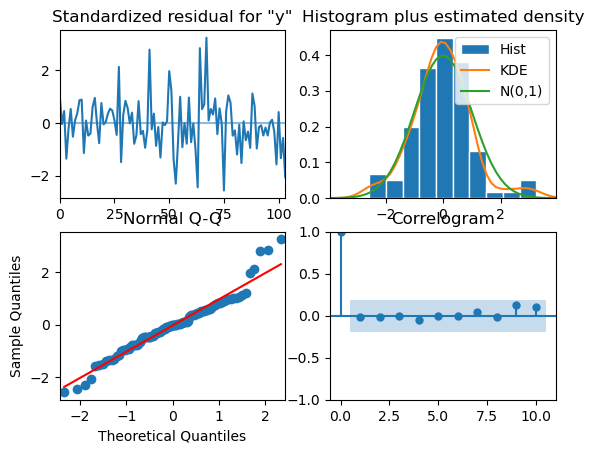

In [116]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [117]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.363487  388.343209     566.224784    2088.502190
1  1315.111515  402.010606     527.185206    2103.037824
2  1621.586914  402.004205     833.673151    2409.500676
3  1598.857401  407.242857     800.676068    2397.038733
4  1392.684681  407.973396     593.071519    2192.297844

In [118]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6031030511106


In [119]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.982793
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

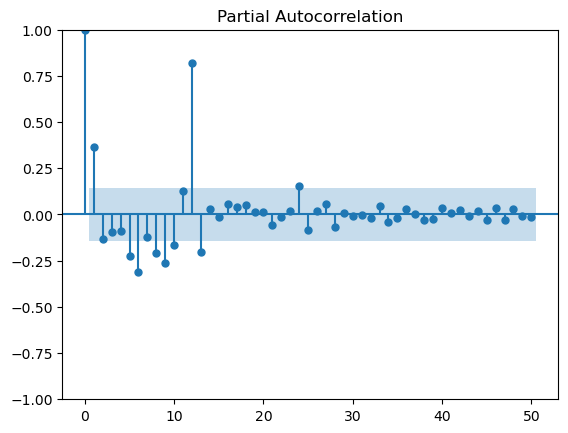

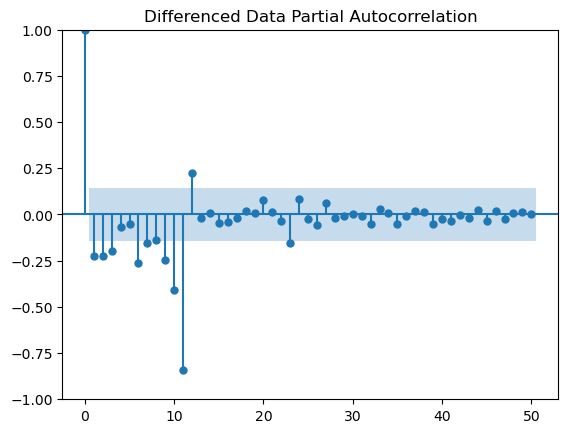

In [121]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

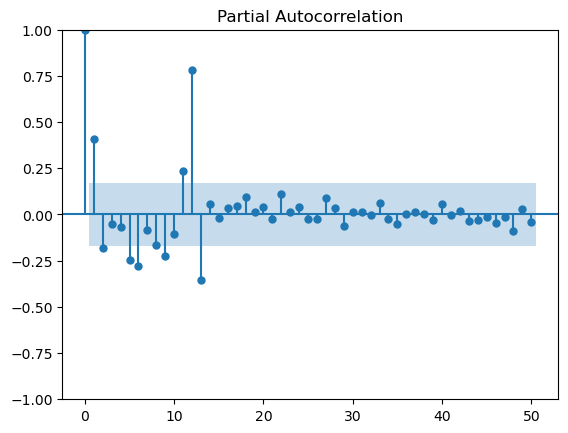

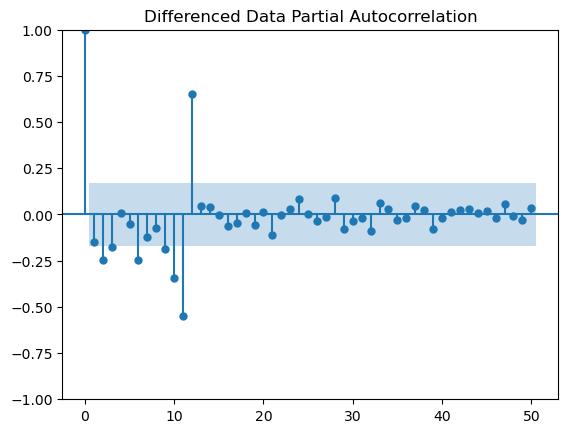

In [122]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [123]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Fri, 19 Jan 2024   AIC                           2235.755
Time:                        15:29:53   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


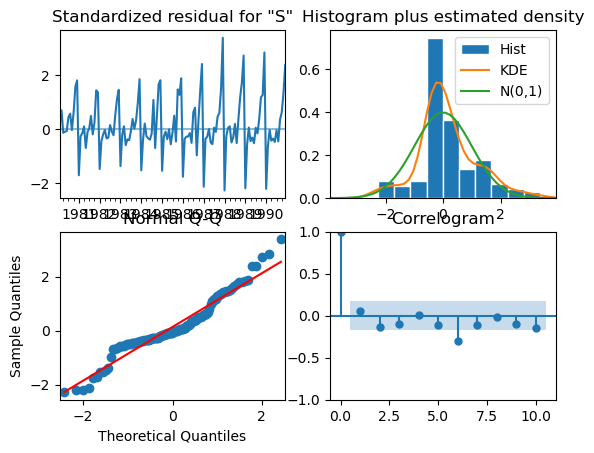

In [124]:
results_manual_ARIMA.plot_diagnostics();

In [125]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367341873026


In [126]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.982793
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103
ARIMA(3,1,3)                                        1319.936734

In [127]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [128]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74064D+00    |proj g|=  1.92640D-01

At iterate    5    f=  6.71379D+00    |proj g|=  1.27110D-02


 This problem is unconstrained.



At iterate   10    f=  6.71358D+00    |proj g|=  8.05391D-03

At iterate   15    f=  6.70800D+00    |proj g|=  1.02021D-01

At iterate   20    f=  6.68260D+00    |proj g|=  1.71118D-02

At iterate   25    f=  6.68248D+00    |proj g|=  1.07974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   6.071D-06   6.682D+00
  F =   6.6824823757535254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:               

In [129]:
SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347

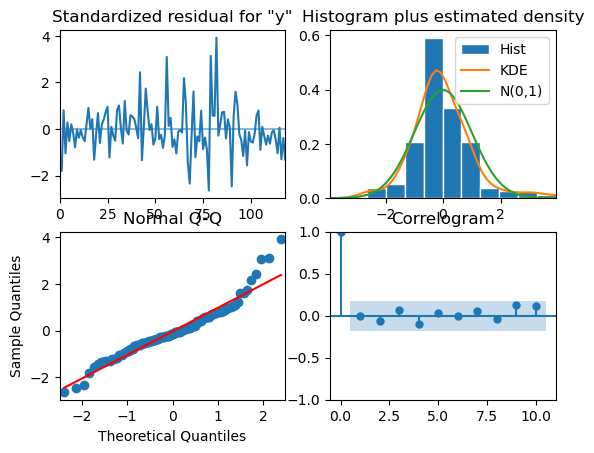

In [130]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [131]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900068  388.532072     782.391200    2305.408935
1  1311.208244  400.994083     525.274283    2097.142206
2  1810.538051  403.246215    1020.189994    2600.886109
3  1650.451751  404.472620     857.699983    2443.203519
4  1561.609700  405.532759     766.780098    2356.439303

In [132]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61245325103164


In [133]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.982793
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103
ARIMA(3,1,3)                                        1319.936734
(2,1,2)(2,1,2,12),Manual_SARIMA                      359.612453

In [134]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
(2,1,2)(2,1,2,12),Manual_SARIMA                      359.612453
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average Model                                1275.081804
Linear Regression                                   1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.982793
ARIMA(3,1,3)                                        1319.936734
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Naive Model                                         3864.279352

In [135]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74064D+00    |proj g|=  1.92640D-01

At iterate    5    f=  6.71379D+00    |proj g|=  1.27110D-02


 This problem is unconstrained.



At iterate   10    f=  6.71358D+00    |proj g|=  8.05391D-03

At iterate   15    f=  6.70800D+00    |proj g|=  1.02021D-01

At iterate   20    f=  6.68260D+00    |proj g|=  1.71118D-02

At iterate   25    f=  6.68248D+00    |proj g|=  1.07974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   6.071D-06   6.682D+00
  F =   6.6824823757535254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:               

In [136]:
SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347
1  (3, 1, 3)  (3, 0, 3, 12)  1774.175347

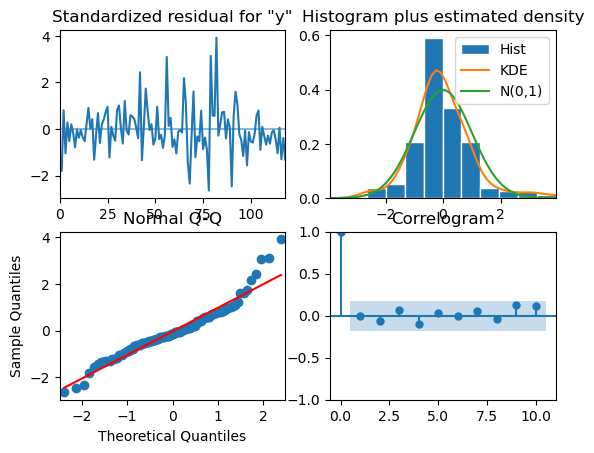

In [137]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [138]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900068  388.532072     782.391200    2305.408935
1  1311.208244  400.994083     525.274283    2097.142206
2  1810.538051  403.246215    1020.189994    2600.886109
3  1650.451751  404.472620     857.699983    2443.203519
4  1561.609700  405.532759     766.780098    2356.439303

In [139]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61245325103164


In [140]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.982793
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103
ARIMA(3,1,3)                                        1319.936734
(2,1,2)(2,1,2,12),Manual_SARIMA                      359.612453
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612453

In [141]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.434302
(2,1,2)(2,1,2,12),Manual_SARIMA                      359.612453
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612453
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.603103
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average Model                                1275.081804
Linear Regression                                   1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.982793
ARIMA(3,1,3)                                        1319.936734
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  2007.238526
Naive Model                                         3864.279352

In [142]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [143]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [144]:
TES_train = df.copy()

In [145]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [147]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

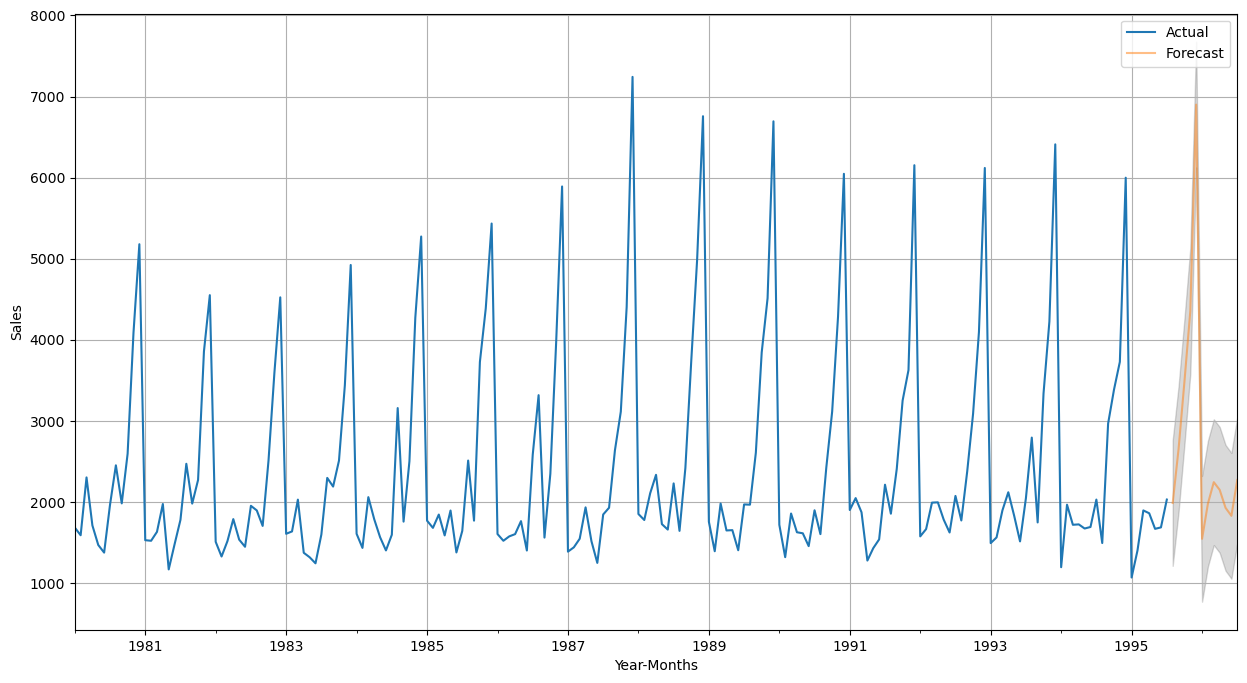

In [148]:
axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()